# Dissertation Code -  Coffee Price Prediction: Statistical & ML Models

## Specific title: A Comparative Analysis of Traditional Statistical and Machine Learning Models in Predicting Coffee Prices at Daily, Weekly and Monthly Intervals.

**Declaration**: I verify that I am the sole author of the programmes contained in this archive, except where explicitly stated to the contrary.

**Code by: Ar Rafiul Islam.**

**Note**: The total runtime for the code using my computer was around 1300 seconds. If it takes too long please stop the kernel and re-try with lower parameter settings in the SARIMA section.

----

## Preliminaries:

### Data retrieval, cleaning and manipulation:

In [1]:
# Importing some of the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose # Decomposition library
from pandas_datareader import data as pdr
import yfinance as yf
import datetime  # Import the datetime module
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.holtwinters import Holt, SimpleExpSmoothing # Double and triple Expo. Smoothing

# Checking the run time of the file the run time of the file
import time
project_start = time.time()

# Enabling Yahoo Finance override
yf.pdr_override()

# Defining the start and end dates
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2023, 2, 3)

# Fetching coffee prices data from Yahoo Finance
coffee_prices = pdr.get_data_yahoo("KC=F", start=start, end=end)
coffee_prices

# Checking the head of the dataframe to ensure data is loaded correctly
coffee_prices.head()

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  Volume
Date                                                                      
2000-01-03  124.00  124.000000  116.099998  116.500000  116.500000    6640
2000-01-04  116.50  120.500000  115.750000  116.250000  116.250000    5492
2000-01-05  115.00  121.000000  115.000000  118.599998  118.599998    6165
2000-01-06  119.00  121.400002  116.500000  116.849998  116.849998    5094
2000-01-07  117.75  117.750000  113.800003  114.150002  114.150002    6855

In [2]:
# Resampling into weekly and monthly prices
weekly_prices_data = coffee_prices.resample("W").last()
monthly_prices_data = coffee_prices.resample("M").last()

In [3]:
# Visualising weekly resampled data
weekly_prices_data

Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2000-01-09  117.750000  117.750000  113.800003  114.150002  114.150002    6855
2000-01-16  118.000000  120.250000  112.250000  112.550003  112.550003   10115
2000-01-23  112.000000  113.500000  110.800003  111.199997  111.199997    5625
2000-01-30  115.150002  115.400002  113.699997  114.699997  114.699997    3334
2000-02-06  112.500000  114.500000  112.500000  112.900002  112.900002    4107
...                ...         ...         ...         ...         ...     ...
2023-01-08  160.100006  162.550003  157.149994  158.300003  158.300003   16254
2023-01-15  150.550003  152.350006  147.000000  151.699997  151.699997   23810
2023-01-22  154.449997  155.399994  151.850006  154.800003  154.800003   12912
2023-01-29  167.100006  170.149994  165.949997  169.899994  169.899994   26795
2023-02-05  177.000000  181.350006  176.550003  177.899994  177.899994   20530

[1205 rows x 6 columns]

In [4]:
# Visualising monthly resampled data
monthly_prices_data

Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2000-01-31  114.000000  114.000000  110.500000  111.099998  111.099998    6465
2000-02-29  102.000000  103.000000   99.449997   99.900002   99.900002     287
2000-03-31  103.500000  104.599998  102.000000  103.699997  103.699997    5523
2000-04-30   94.500000   96.000000   94.000000   95.300003   95.300003     202
2000-05-31  101.250000  101.699997   92.599998   93.000000   93.000000   11773
...                ...         ...         ...         ...         ...     ...
2022-10-31  171.699997  178.550003  171.550003  177.699997  177.699997   26373
2022-11-30  167.500000  167.500000  167.500000  167.699997  167.699997       1
2022-12-31  169.100006  172.449997  165.149994  167.300003  167.300003   13417
2023-01-31  170.050003  182.800003  169.850006  181.750000  181.750000   46686
2023-02-28  177.000000  181.350006  176.550003  177.899994  177.899994   20530

[278 rows x 6 columns]

In [5]:
# Saving the daily data into a Excel file and saving the dataframe into a more descriptive name
coffee_prices.to_csv("coffee_yahoo_file.csv", index=True)
saved_coffe_data_daily = pd.read_csv("coffee_yahoo_file.csv")
saved_coffe_data_daily

Date        Open        High         Low       Close   Adj Close  \
0     2000-01-03  124.000000  124.000000  116.099998  116.500000  116.500000   
1     2000-01-04  116.500000  120.500000  115.750000  116.250000  116.250000   
2     2000-01-05  115.000000  121.000000  115.000000  118.599998  118.599998   
3     2000-01-06  119.000000  121.400002  116.500000  116.849998  116.849998   
4     2000-01-07  117.750000  117.750000  113.800003  114.150002  114.150002   
...          ...         ...         ...         ...         ...         ...   
5780  2023-01-27  167.100006  170.149994  165.949997  169.899994  169.899994   
5781  2023-01-30  168.000000  171.649994  167.050003  170.399994  170.399994   
5782  2023-01-31  170.050003  182.800003  169.850006  181.750000  181.750000   
5783  2023-02-01  180.300003  184.199997  175.550003  175.899994  175.899994   
5784  2023-02-02  177.000000  181.350006  176.550003  177.899994  177.899994   

      Volume  
0       6640  
1       5492  
2       6165  
3       5094  
4       6855  
...      ...  
5780   26795  
5781   25647  
5782   46686  
5783   31812  
5784   20530  

[5785 rows x 7 columns]

In [6]:
# Checking if data is in correct format
saved_coffe_data_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5785 entries, 0 to 5784
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5785 non-null   object 
 1   Open       5785 non-null   float64
 2   High       5785 non-null   float64
 3   Low        5785 non-null   float64
 4   Close      5785 non-null   float64
 5   Adj Close  5785 non-null   float64
 6   Volume     5785 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 316.5+ KB


In [7]:
# Converting "Date" into DateTime and keeping the rest the same
saved_coffe_data_daily["Date"] = pd.to_datetime(saved_coffe_data_daily["Date"])

In [8]:
# Re-checking the format - Ensuring is in date format
saved_coffe_data_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5785 entries, 0 to 5784
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5785 non-null   datetime64[ns]
 1   Open       5785 non-null   float64       
 2   High       5785 non-null   float64       
 3   Low        5785 non-null   float64       
 4   Close      5785 non-null   float64       
 5   Adj Close  5785 non-null   float64       
 6   Volume     5785 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 316.5 KB


In [9]:
# Renaming the data and visualising it in the "improved"/desired format
adj_daily_prices = saved_coffe_data_daily[["Date","Adj Close"]]
adj_daily_prices

Date   Adj Close
0    2000-01-03  116.500000
1    2000-01-04  116.250000
2    2000-01-05  118.599998
3    2000-01-06  116.849998
4    2000-01-07  114.150002
...         ...         ...
5780 2023-01-27  169.899994
5781 2023-01-30  170.399994
5782 2023-01-31  181.750000
5783 2023-02-01  175.899994
5784 2023-02-02  177.899994

[5785 rows x 2 columns]

In [10]:
# Checking for missing values
check_missing_values = adj_daily_prices.isnull().sum()
check_missing_values

Date         0
Adj Close    0
dtype: int64

In [11]:
# Getting Adjusted weekly prices
weekly_prices = coffee_prices.resample("W").last()
weekly_prices.reset_index(inplace=True)
adj_weekly_prices = weekly_prices[["Date", "Adj Close"]]

# Visualising the adjusted weekly data with the date
adj_weekly_prices

Date   Adj Close
0    2000-01-09  114.150002
1    2000-01-16  112.550003
2    2000-01-23  111.199997
3    2000-01-30  114.699997
4    2000-02-06  112.900002
...         ...         ...
1200 2023-01-08  158.300003
1201 2023-01-15  151.699997
1202 2023-01-22  154.800003
1203 2023-01-29  169.899994
1204 2023-02-05  177.899994

[1205 rows x 2 columns]

In [12]:
# Esnuring the data is in correct format
adj_weekly_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1205 non-null   datetime64[ns]
 1   Adj Close  1205 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.0 KB


In [13]:
# Getting Adjusted monthly prices
monthly_prices = coffee_prices.resample("M").last()
monthly_prices.reset_index(inplace=True) # resetting index here and saving it
adj_monthly_prices = monthly_prices[["Date", "Adj Close"]]

# Visualising the adjusted monthly data with the date
adj_monthly_prices

Date   Adj Close
0   2000-01-31  111.099998
1   2000-02-29   99.900002
2   2000-03-31  103.699997
3   2000-04-30   95.300003
4   2000-05-31   93.000000
..         ...         ...
273 2022-10-31  177.699997
274 2022-11-30  167.699997
275 2022-12-31  167.300003
276 2023-01-31  181.750000
277 2023-02-28  177.899994

[278 rows x 2 columns]

In [14]:
# Again, esnuring the data is in correct format
adj_monthly_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       278 non-null    datetime64[ns]
 1   Adj Close  278 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.5 KB


### Data visualisation and inspection:

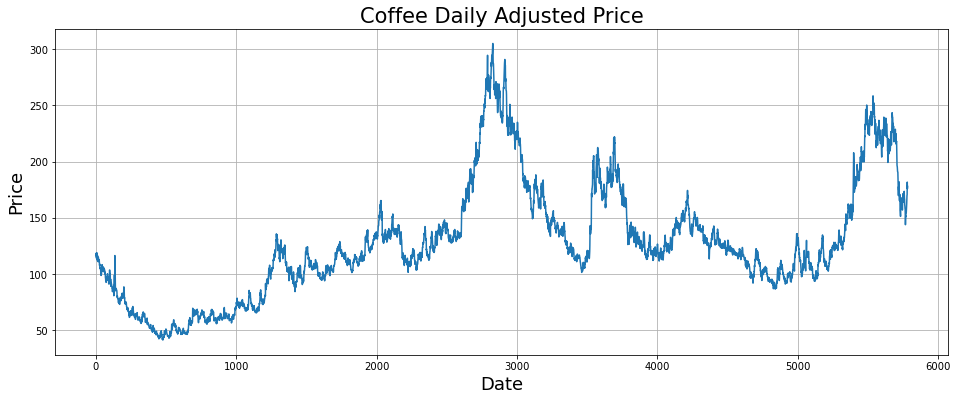

In [15]:
# Visualising daily adjusted close price
plt.xlabel(r"Date", fontsize=18)
plt.ylabel(r"Price", fontsize=18)
plt.title(r"Coffee Daily Adjusted Price", fontsize=21)
# Plotting
ax = adj_daily_prices["Adj Close"].plot(figsize=(16, 6), grid=True)

In [16]:
# Creating a "index fixer" function to allow it to show the dates properly on the x-axis
def index_fixer(dataset, dates_column, column_to_drop):
    new_dataset = dataset.set_index(pd.to_datetime(dates_column), inplace=True) # Making the dates as the index and overriting the DataFrame
    new_dataset = dataset.drop(str(column_to_drop), axis="columns") # Dropping the "older" date column, not necessary for computation
    return new_dataset

In [17]:
# Creating a fucntion to plot data more efficiently
def figure_plotter(data, x_title, y_title, main_title, xfont=18, yfont=18, titlefont=21, figsize=(16, 6)):
    plt.figure(figsize=figsize)
    plt.xlabel(x_title, fontsize=xfont)
    plt.ylabel(y_title, fontsize=yfont)  # Using f-string and raw string for LaTeX-like formatting
    plt.title(main_title, fontsize=titlefont)
    plt.grid()
    plot = plt.plot(data)
    return plot

In [18]:
# Creating daily prices dataframe with date as index 
daily_dates = adj_daily_prices["Date"]
adj_daily_prices_date_index = index_fixer(adj_daily_prices, daily_dates, "Date")
adj_daily_prices_date_index

Adj Close
Date                  
2000-01-03  116.500000
2000-01-04  116.250000
2000-01-05  118.599998
2000-01-06  116.849998
2000-01-07  114.150002
...                ...
2023-01-27  169.899994
2023-01-30  170.399994
2023-01-31  181.750000
2023-02-01  175.899994
2023-02-02  177.899994

[5785 rows x 1 columns]

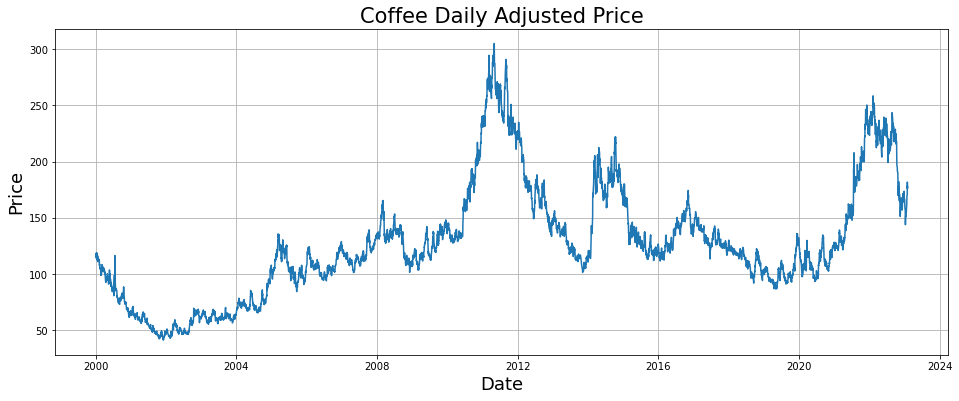

In [19]:
# Visualising the data with the proper format
daily_adjusted_price_graph = figure_plotter(adj_daily_prices_date_index, "Date", "Price", "Coffee Daily Adjusted Price",
                                            xfont=18, yfont=18, titlefont=21, figsize=(16, 6))
daily_adjusted_price_graph

In [20]:
# Creating weekly prices dataframe with date as index 
weekly_dates = adj_weekly_prices["Date"]
adj_weekly_prices_date_index = index_fixer(adj_weekly_prices, weekly_dates, "Date")
adj_weekly_prices_date_index

Adj Close
Date                  
2000-01-09  114.150002
2000-01-16  112.550003
2000-01-23  111.199997
2000-01-30  114.699997
2000-02-06  112.900002
...                ...
2023-01-08  158.300003
2023-01-15  151.699997
2023-01-22  154.800003
2023-01-29  169.899994
2023-02-05  177.899994

[1205 rows x 1 columns]

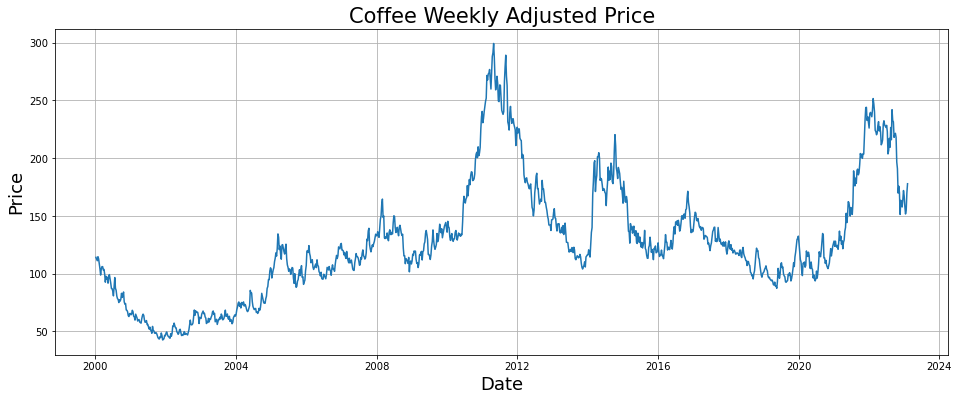

In [21]:
# Visualising the data with the proper format
weekly_adjusted_price_graph = figure_plotter(adj_weekly_prices_date_index, "Date", "Price", "Coffee Weekly Adjusted Price",
                                            xfont=18, yfont=18, titlefont=21, figsize=(16, 6))
weekly_adjusted_price_graph

In [22]:
# Creating monthly prices dataframe with date as index 
monthly_dates = adj_monthly_prices["Date"]
adj_monthly_prices_date_index = index_fixer(adj_monthly_prices, monthly_dates, "Date")
adj_monthly_prices_date_index

Adj Close
Date                  
2000-01-31  111.099998
2000-02-29   99.900002
2000-03-31  103.699997
2000-04-30   95.300003
2000-05-31   93.000000
...                ...
2022-10-31  177.699997
2022-11-30  167.699997
2022-12-31  167.300003
2023-01-31  181.750000
2023-02-28  177.899994

[278 rows x 1 columns]

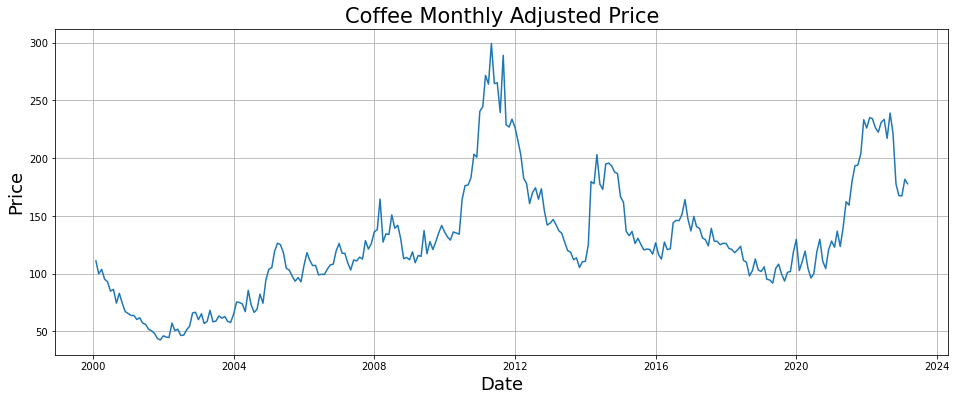

In [23]:
# Visualising the data with the proper format
monthly_adjusted_price_graph = figure_plotter(adj_monthly_prices_date_index, "Date", "Price", "Coffee Monthly Adjusted Price",
                                            xfont=18, yfont=18, titlefont=21, figsize=(16, 6))
monthly_adjusted_price_graph

**Observation:** As we can see the (seasonal) variability of the data seems to be roughly the same thorughout the Time Series for all daily, weekly and monthly adjusted prices. So, when performing the seasonal decomposition for the series, it is sensible to use an "additive" model than a "multiplicative" one in this case, as suggested from: https://online.stat.psu.edu/stat510/lesson/5/5.1

Next, is to decompose the three frequencies of data to understand the presence of trend, seasonal component and residuals.
To do so, I will first use the autocrrelation functions graphs to determine any significant seasonal lags,

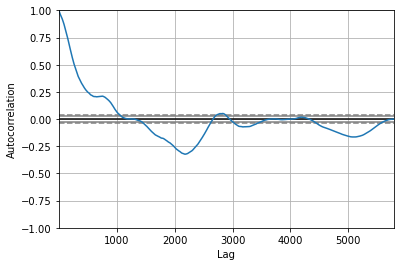

<Figure size 2160x720 with 0 Axes>

In [24]:
# Importing the autocorrelation function to decide the best "period" when decomposing the model
from pandas.plotting import autocorrelation_plot

# Plotting the daily autocorrelation function
autocorrelation_plot(adj_daily_prices_date_index["Adj Close"])

plt.figure(figsize=(30,10))
plt.show()

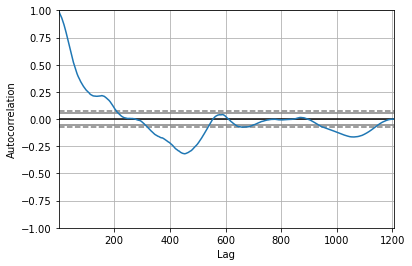

<Figure size 2160x720 with 0 Axes>

In [25]:
# Plotting the weekly autocorrelation function
autocorrelation_plot(adj_weekly_prices_date_index["Adj Close"])

plt.figure(figsize=(30,10))
plt.show()

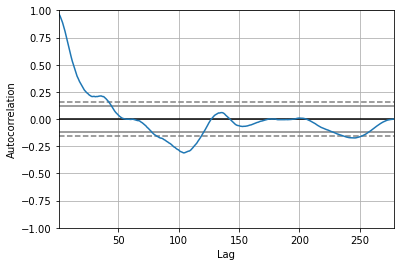

<Figure size 2160x720 with 0 Axes>

In [26]:
# Plotting the monthly autocorrelation function
autocorrelation_plot(adj_monthly_prices_date_index["Adj Close"])

plt.figure(figsize=(30,10))
plt.show()

**Observation:** all the plot show similar patterns.In all 3 the plots we can see the autocorrelation being really high at lag 0, close to 1, and then a gradual decay which may suggest long-term dependece in the data. There are some oscillation in the plots which may suggest presence of seasonality/cyclic patterns, in fact we can see line "reverting" at specific lags. Also, we can see the line crossing zero multiple times.

Overall, this can be thought as an indication of the presence of some form of seasonality. Although it does not seem to be really strong.

### Time Series Decomposition

#### Inspiration from:
1. https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
2. https://www.youtube.com/watch?v=IiZ_SNBlZhw&list=PLEuzmtv9IuT9Q9MPA2vBH0JGAY3wxzZVM

In [27]:
# Just resetting the index for daily prices for future use
adj_daily_prices = adj_daily_prices.reset_index(drop=True)
adj_daily_prices

Date   Adj Close
0    2000-01-03  116.500000
1    2000-01-04  116.250000
2    2000-01-05  118.599998
3    2000-01-06  116.849998
4    2000-01-07  114.150002
...         ...         ...
5780 2023-01-27  169.899994
5781 2023-01-30  170.399994
5782 2023-01-31  181.750000
5783 2023-02-01  175.899994
5784 2023-02-02  177.899994

[5785 rows x 2 columns]

In [28]:
# doing the same as above for the other two frequencies
adj_weekly_prices = adj_weekly_prices.reset_index(drop=True)
adj_monthly_prices = adj_monthly_prices.reset_index(drop=True)

In [29]:
# Checking again for consistency of the data format
adj_daily_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5785 entries, 0 to 5784
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5785 non-null   datetime64[ns]
 1   Adj Close  5785 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 90.5 KB


In [30]:
# Converting the date columns into numeric
adj_daily_prices["Date"] = pd.to_numeric(adj_daily_prices["Date"], errors="coerce")

In [31]:
adj_daily_prices_date_index.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2023-01-20', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-26', '2023-01-27', '2023-01-30', '2023-01-31',
               '2023-02-01', '2023-02-02'],
              dtype='datetime64[ns]', name='Date', length=5785, freq=None)

Using this to decompose the model: https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

<Figure size 720x720 with 0 Axes>

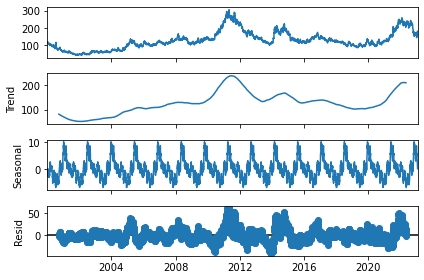

In [32]:
# Decomposing the daily data using statsmodels - To visualise trend, seasonal and residual
daily_decomposed = seasonal_decompose(adj_daily_prices_date_index, model="additive", period=365)
# Plotting the graphs
plt.figure(figsize=(10,10))
daily_decomposed.plot()
plt.show()

#### For the seasonal decomposition I partially got the code idea from the following source:
 - "Deep Learning models for timeseries forecasting using Keras library" by Zelios Vasileios (credit for the following  seasonal decomponse and my construnction of the seasonal decompose function goes to the student)

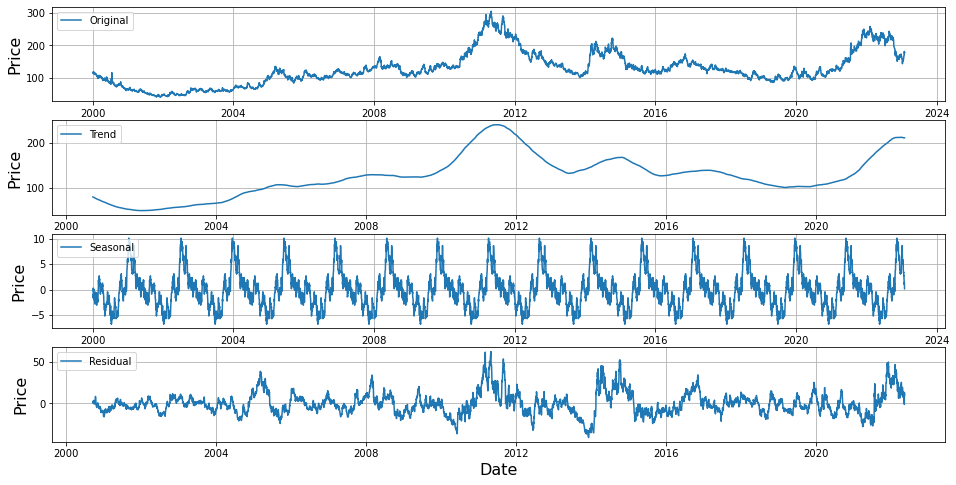

In [33]:
### Important Note: For the following piece of code I took the inspiration from the paper "Deep Learning models for timeseries forecasting using Keras library" by Zelios Vasileios from the university of west attica & limoges. 
### The credits for the subplots implmentation method goes to Zelios Vasileios in his work in pages 41 and 42.


# Dividing it into 3 seprate graphs for the daily decomposition
daily_decomposed = seasonal_decompose(adj_daily_prices_date_index, model="additive", period=365)


trend = daily_decomposed.trend
seasonal = daily_decomposed.seasonal
residual = daily_decomposed.resid

## Plotting the graphs:

# Giving the proper size
plt.figure(figsize=(16, 8))

# (Sub)Plot for the original data
plt.subplot(411)
plt.plot(adj_daily_prices_date_index, label="Original")
plt.legend(loc="upper left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.grid()

# (Sub)Plot for the trend
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="upper left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.grid()

# (Sub)Plot for the seasonality
plt.subplot(413)
plt.plot(seasonal, label="Seasonal")
plt.legend(loc="upper left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.grid()

# (Sub)Plot for the residual/error
plt.subplot(414)
plt.plot(residual, label="Residual")
plt.legend(loc="upper left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.grid()

In [34]:
# Creating two functions for the decomposition and the plotting of the graphs for making it more automated


### Important Note: For the following piece of code I took the inspiration from the paper "Deep Learning models for timeseries forecasting using Keras library" by Zelios Vasileios from the university of west attica & limoges. 
### The credits for the subplots implmentation method goes to Zelios Vasileios in his work in pages 41 and 42. Doing this as I did before, giving credits again here.

# Decomposition function
def decomposition_func(data, model, period):
    decomposed = seasonal_decompose(data, model=model, period=period)
    
    # Assigning the trend, seasonality and residual generated into three variables
    trend = decomposed.trend
    seasonal = decomposed.seasonal
    residual = decomposed.resid
    return data, trend, seasonal, residual

# Decomposition plots
def decomposition_plots(data, trend, seasonal, residual):
    # Re-sizing
    plt.figure(figsize=(16, 8))
    
    # (Sub)Plot for the original data
    plt.subplot(411)
    plt.plot(data, label="Original")
    plt.legend(loc="upper left")
    plt.xlabel("Date", fontsize=16)
    plt.ylabel("Price", fontsize=16)
    plt.grid(True)

    # (Sub)Plot for the trend
    plt.subplot(412)
    plt.plot(trend, label="Trend")
    plt.legend(loc="upper left")
    plt.xlabel("Date", fontsize=16)
    plt.ylabel("Price", fontsize=16)
    plt.grid(True)

    # (Sub)Plot for the seasonality
    plt.subplot(413)
    plt.plot(seasonal, label="Seasonal")
    plt.legend(loc="upper left")
    plt.xlabel("Date", fontsize=16)
    plt.ylabel("Price", fontsize=16)
    plt.grid(True)

    # (Sub)Plot for the residual/error
    plt.subplot(414)
    plt.plot(residual, label="Residual")
    plt.legend(loc="upper left")
    plt.xlabel("Date", fontsize=16)
    plt.ylabel("Price", fontsize=16)
    plt.grid(True)

    # Plotting all 3
    plt.show()

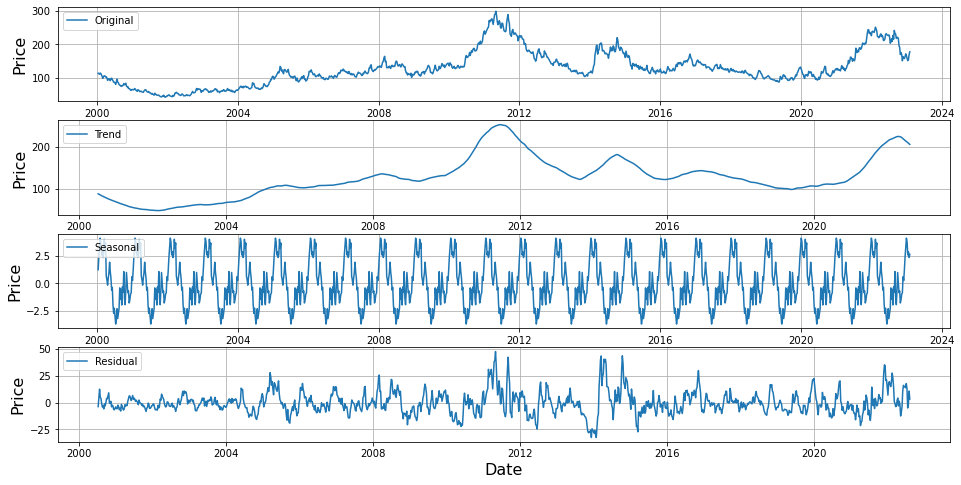

In [35]:
# Using the function to plot the weekly decomposition
weekly_decomposition = decomposition_func(adj_weekly_prices_date_index, "additive", 52)
weekly_plot = decomposition_plots(adj_weekly_prices_date_index, weekly_decomposition[1], weekly_decomposition[2],
                                 weekly_decomposition[3])

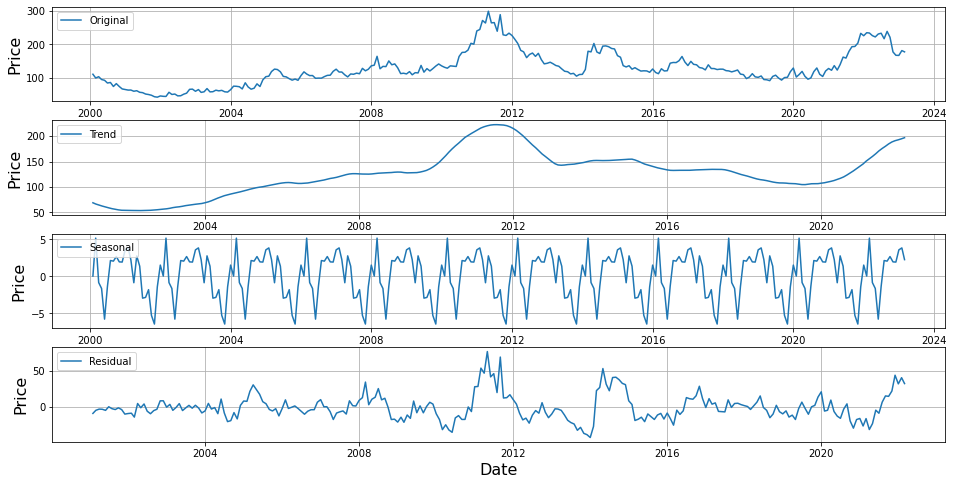

In [36]:
# Using the function to plot the monthly decomposition
monthly_decomposition = decomposition_func(adj_monthly_prices_date_index, "additive", 24)
monthly_plot = decomposition_plots(adj_monthly_prices_date_index, monthly_decomposition[1], monthly_decomposition[2],
                                 monthly_decomposition[3])

**Observation:** Based on the decomposition plots, we can see the following three points. Firstly, all 3 show an increasing trend from the year 2000 to the year 2023. Secondly, all 3 also show some cyclical/seasonal component. For example, the daily data show some cycle repeating almost every two years, which is similar to the monthly data and weekly. Also, they show "random" residual plots. The plots were created using a method of trial and error to decide the "best" period for the Holt-Winter Exponential Model.

**In summary:** This suggests that the data has both a trend and seasonal component. This means we would want to use a Holt-Winters Exponential Smoothing model and see how it performs.

------

## Method 1: Exponential Smoothing Models

### Daily Data:

In [37]:
# Adjusting the frequency of daily data
adj_daily_prices_date_index = adj_daily_prices_date_index.asfreq("D")
# Adjusting the nan values
adj_daily_prices_date_index = adj_daily_prices_date_index.fillna(method="ffill") # "Filling" the nan values that have been generated using the previous line

In [38]:
# Visualising the data to ensure consistency
adj_daily_prices_date_index

Adj Close
Date                  
2000-01-03  116.500000
2000-01-04  116.250000
2000-01-05  118.599998
2000-01-06  116.849998
2000-01-07  114.150002
...                ...
2023-01-29  169.899994
2023-01-30  170.399994
2023-01-31  181.750000
2023-02-01  175.899994
2023-02-02  177.899994

[8432 rows x 1 columns]

In [39]:
# Creating training and teting data sequentially - splitting data into train and test [Ensuring to keep temporal order!]
train = adj_daily_prices_date_index.iloc[:-int(len(adj_daily_prices_date_index) * 0.2)]
test = adj_daily_prices_date_index.iloc[-int(len(adj_daily_prices_date_index) * 0.2):] # Ensuring testing data is always after the train data

We will implement an additive component for both trend and seasonality when implementing the Holt-Winters model as suggested by the seasonal decomposition graphs, and for the seasonal periods I adjsted it by trial and arror to find the most suitable one.

#### Implementing the Holt-Winters model - 7 days data prediction

In [40]:
# Timining For exponential models
model1_start = time.time()

## Fitting the model on the training data
# Importing the library for Holt-Winters Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

# Implementing the additive Holt-Winters model
daily_hwexs_model = HWES(train, trend="add", seasonal="add", seasonal_periods=670).fit(optimized=True) # Optimizing so that it automatically minimises the error
# Generating a model forecast using the test data
test_forecast = daily_hwexs_model.forecast(steps=len(test.values.ravel()))
# Forecasting the next following 7 days
prediction = daily_hwexs_model.forecast(steps=7)
round(prediction, 2)

C:\Users\rafiu\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2018-06-23    113.90
2018-06-24    114.89
2018-06-25    114.26
2018-06-26    114.35
2018-06-27    113.21
2018-06-28    113.39
2018-06-29    112.77
Freq: D, dtype: float64

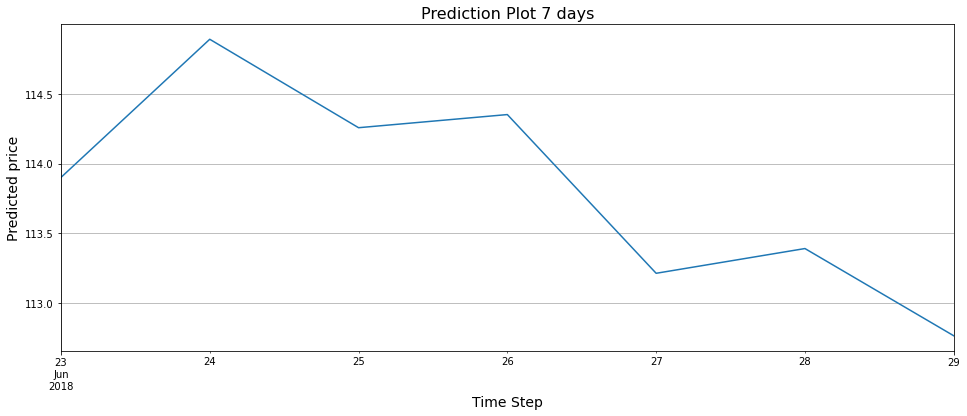

In [41]:
# Converting the prediction into a dataframe for future use
prediction_df = pd.DataFrame(prediction)

## Plotting the predicted data
ax = prediction_df.plot(figsize=(16, 6))
ax.set_title("Prediction Plot 7 days", fontsize=16)
ax.set_xlabel("Time Step", fontsize=14)
ax.set_ylabel("Predicted price", fontsize=14)
ax.legend().remove()
# Displaying the plot
plt.grid()
plt.show()

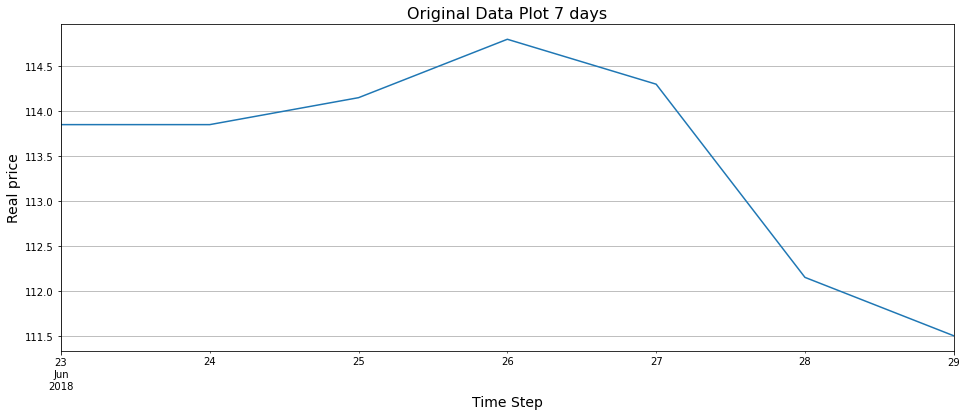

In [42]:
# Adjusting the data to visualise the next 7 steps
test_df = pd.DataFrame(test)
test_df_first_7 = pd.DataFrame(test_df.head(7))

## Plotting the original data
ax1 = test_df_first_7.plot(figsize=(16, 6))
ax1.set_title("Original Data Plot 7 days", fontsize=16)
ax1.set_xlabel("Time Step", fontsize=14)
ax1.set_ylabel("Real price", fontsize=14)
ax1.legend().remove()
# Display the plot
plt.grid()
plt.show()

In [43]:
# Getting the dates for the first 7 days of data
dates_for_testing_daily_array = np.array(pd.date_range(start="2018-06-23", end="2018-06-29"))
# Converting DF into array for test and predicted data
test_df_first_7_array = np.array(test_df_first_7)
prediction_df_array = np.array(prediction_df)
# Checking the lenght
len(dates_for_testing_daily_array)

7

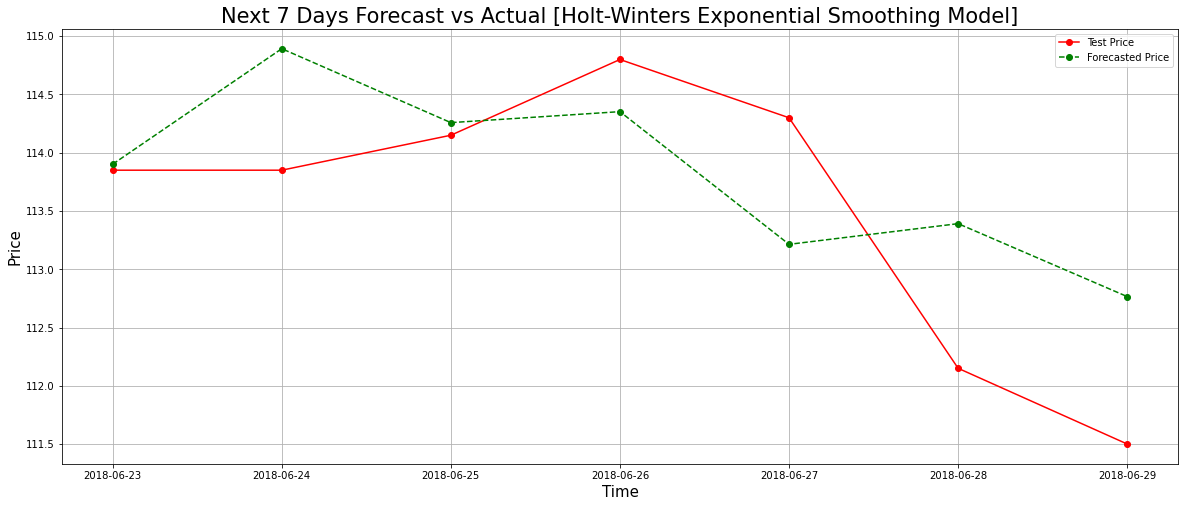

In [44]:
# Converting and renaming dataframes and fetching the relevant data from them
test_df_first_7_array = np.array(test_df_first_7)
prediction_df_array = np.array(prediction_df.iloc[:7, :][0]) 

# Plotting the first time series
plt.figure(figsize=(20, 8))
plt.plot(dates_for_testing_daily_array, test_df_first_7_array, label="Test Price", color="red", linestyle="-", marker="o")

# Plotting the second time series on the same graph
plt.plot(dates_for_testing_daily_array[:7], prediction_df_array, label="Forecasted Price", linestyle="dashed", color="green", marker="o")

# Adding legend, grid and showing plot
plt.xlabel("Time", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Next 7 Days Forecast vs Actual [Holt-Winters Exponential Smoothing Model]", fontsize=21)
plt.legend()
plt.grid()
plt.savefig("hw7D.png")
plt.show()

**Observation:** The predicted data seem to follow somehow the shape of the original data but there significant difference. Next, the Holt model will be implemented on its own to see if there an improvement by doing so.

#### Creating the following function using some tutorials and documentation for saving files quickly:
`https://www.youtube.com/watch?v=Uh2ebFW8OYM` and `https://docs.python.org/3/library/os.html`

In [45]:
# Creating a functions for following plots
import os #Will be needed to work with the path
def double_ts_plotter(date_range, test_data, predicted_data, title_test, title_predicted, main_title, save_path=None):
    plt.figure(figsize=(20, 8))
    plt.plot(date_range, test_data, label=title_test, color="red", linestyle="-", marker="o")
    plt.plot(date_range, predicted_data, label=title_predicted, linestyle="dashed", color="green", marker="o")
    plt.xlabel("Time", fontsize=15)
    plt.ylabel("Price", fontsize=15)
    plt.title(main_title, fontsize=21)
    plt.legend()
    plt.grid()

    # Checking if save_path is specified and then save files based on if it's there
    if save_path: # checking If the path is provided (Which is not, as I set all to be 'None')
        base, extra = os.path.splitext(save_path) # Splitting the save_path into two, where base refers to plot and extra to .png
        counter = 1
        while os.path.exists(save_path): # using loop so that as long as the documnt exist with name "save_path" and gives TRUE if exists and False o.w
            save_path = f"{base}_{counter}{extra}"  # Saving the file using the name that I gave, extra is the type of file essentially
            counter += 1
        plt.savefig(save_path) # saving it
    else:
        plt.show()

#### Implementing Holt exponential model - 7 days data prediction

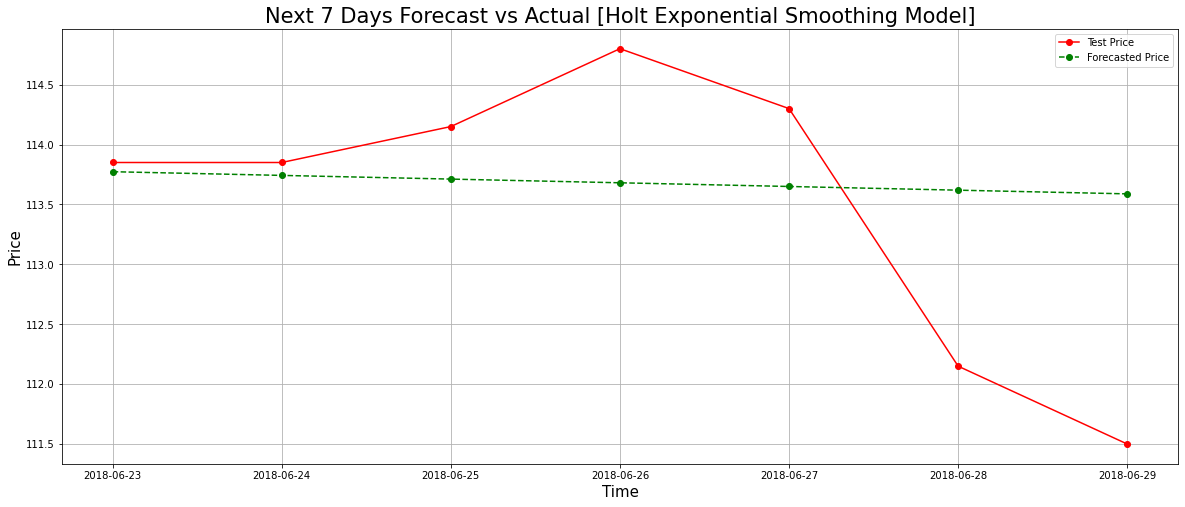

In [46]:
# Implementing the Holt model (Only trend)
daily_hexs_model = Holt(endog=train).fit(optimized=True)
test_forecast = daily_hexs_model.forecast(steps=len(test.values.ravel()))
prediction1 = daily_hexs_model.forecast(steps=7)

# Generating test and predicted data
test_df_first_7_array = np.array(test_df_first_7)
prediction_df1 = pd.DataFrame(prediction1)
prediction_df_array = np.array(prediction_df1.iloc[:7, :][0]) 

# Plotting
holt_actual_vs_predicted_7days = double_ts_plotter(dates_for_testing_daily_array, test_df_first_7_array, prediction_df_array,
                                             "Test Price",
                                             "Forecasted Price",
                                             "Next 7 Days Forecast vs Actual [Holt Exponential Smoothing Model]", "h7D.png")

Here, it shows that the Holt model on its own performing worse than the Holt-Winters by analysing it visually.

Next, I will extend the perdiod of prediction to 31 days to analyse the performance using both Holt-Winters and Holt method as done previously for 7 days data.

**31 days prediction**

#### Implementing the Holt-Winters model - 31 days data prediction

In [47]:
# Generating prediction data for 31 days
prediction2 = daily_hwexs_model.forecast(steps=31)
prediction2

2018-06-23    113.901354
2018-06-24    114.892753
2018-06-25    114.258226
2018-06-26    114.352469
2018-06-27    113.213710
2018-06-28    113.391216
2018-06-29    112.765371
2018-06-30    112.349162
2018-07-01    112.627055
2018-07-02    112.164153
2018-07-03    113.032260
2018-07-04    113.424807
2018-07-05    113.987247
2018-07-06    114.073441
2018-07-07    114.228110
2018-07-08    115.012518
2018-07-09    115.654391
2018-07-10    116.797492
2018-07-11    114.460613
2018-07-12    113.803476
2018-07-13    114.551176
2018-07-14    114.905693
2018-07-15    114.820677
2018-07-16    113.750002
2018-07-17    113.917729
2018-07-18    114.501757
2018-07-19    114.689552
2018-07-20    115.847337
2018-07-21    117.224447
2018-07-22    116.718687
2018-07-23    116.528330
Freq: D, dtype: float64

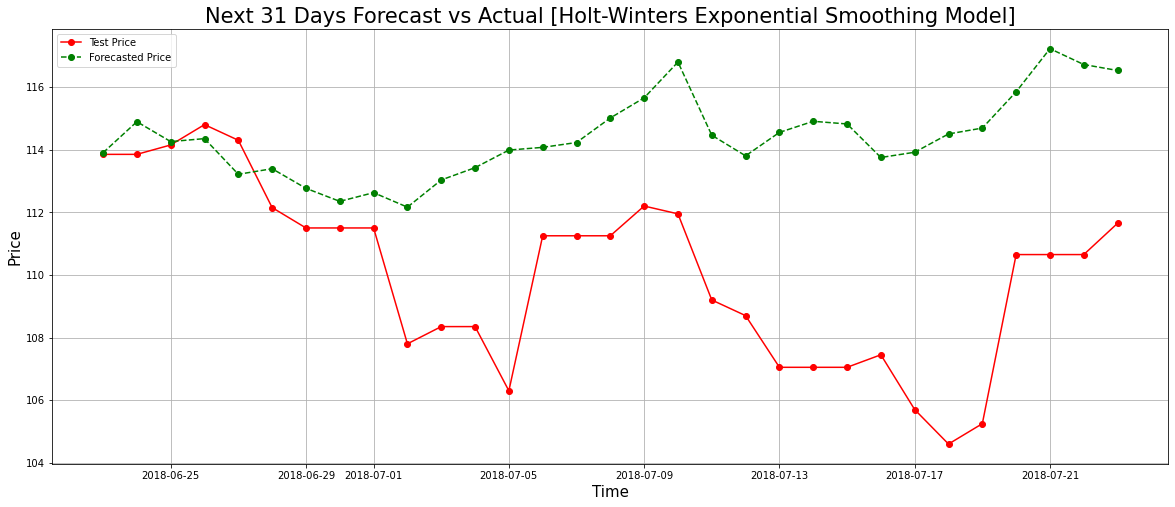

In [48]:
# Holt-Winters Exponential smoothing - 31 days
test_df = pd.DataFrame(test)
test_df_first_31 = pd.DataFrame(test_df.head(31))
dates_for_testing_daily31_array = np.array(pd.date_range(start="2018-06-23", end="2018-07-23"))
test_df_first_31_array = np.array(test_df_first_31)

# Generating predicted data
prediction_df2 = pd.DataFrame(prediction2)
prediction_df2_array = np.array(prediction_df2)

# Reformatting data
test_df_first_31_array = np.array(test_df_first_31)
prediction_df2_array = np.array(prediction_df2.iloc[:31, :][0]) 

# Plotting the first time series
holt_winters_actual_vs_predicted_31days = double_ts_plotter(dates_for_testing_daily31_array, test_df_first_31_array,
                                                            prediction_df2_array,
                                                            "Test Price",
                                                            "Forecasted Price",
                                                            "Next 31 Days Forecast vs Actual [Holt-Winters Exponential Smoothing Model]", "hw31D.png")

#### Implementing the Holt model - 31 days data prediction

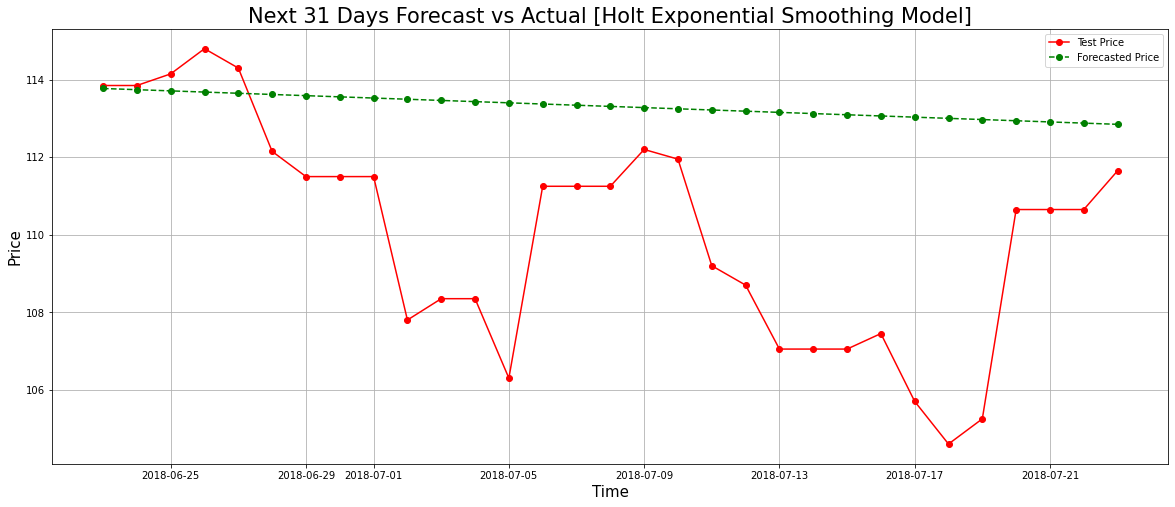

In [49]:
# Holt Exponential smoothing - 31 days
daily_hexs_model_31 = Holt(endog=train).fit(optimized=True)
test_forecast_31 = daily_hexs_model_31.forecast(steps=len(test.values.ravel()))

# Generating predicted data and re-formatting
prediction3 = daily_hexs_model_31.forecast(steps=31)
test_df_first_31_array = np.array(pd.DataFrame(test_df.head(31)))
prediction_df3 = pd.DataFrame(prediction3)
prediction_df31_array = np.array(prediction_df3.iloc[:31, :][0]) 

# Plotting the data
holt_actual_vs_predicted_31days = double_ts_plotter(dates_for_testing_daily31_array,
                                                    test_df_first_31_array, prediction_df31_array,
                                                    "Test Price",
                                                    "Forecasted Price",
                                                    "Next 31 Days Forecast vs Actual [Holt Exponential Smoothing Model]", "h31D.png")

### Performance Metrics

Using **MAE**, **MSE**, **RMSE** and **MAPE** as metrics to compare the models.

**7 days prediction metrics**

In [50]:
# Holt-Winters Exponential smoothing - 7 days
# Importing the libraries necessary for the error calculation below
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Getting the data in the necessary format to calculate the errors
y_actual_values = np.array(test_df_first_7).flatten()
y_predictions_hw = np.array(prediction).flatten()

mae_hw7 = mean_absolute_error(y_actual_values, y_predictions_hw)

# Calculate MSE
mse_hw7 = mean_squared_error(y_actual_values, y_predictions_hw)

# Calculate RMSE
rmse_hw7 = np.sqrt(mse_hw7)

# ## Calculating MAPE
# Note to remember for future: When calculating the MAPE at the beginning it led to "nan" values, possibly because of dividing by 0.
# To solve this issue I had to  transform the actual values and the predictions into arrays and then use .flatten().
# After I created a variable (just below) which will gicve me TRUE if not equal to zero and FASLE otherwise.
# Then, it will select the value only when it's TRUE (not equal to 0) and then proceed with the calculation.
non_zero_actuals = y_actual_values != 0
# Calculating MAPE
mape_hw7 = np.mean(np.abs((y_actual_values[non_zero_actuals] - y_predictions_hw[non_zero_actuals]) /
                           y_actual_values[non_zero_actuals])) * 100


print(f"MAE: {mae_hw7}")
print(f"MSE: {mse_hw7}")
print(f"RMSE: {rmse_hw7}")
print(f"MAPE: {mape_hw7}")

MAE: 0.7489638743136291
MSE: 0.8033976563174055
RMSE: 0.8963245262277527
MAPE: 0.6625216588939384


In [51]:
# For Holt Exponential smoothing - 7 days
y_actual_values = np.array(test_df_first_7).flatten()
y_predictions_holt = np.array(prediction1).flatten()

mae_holt7 = mean_absolute_error(y_actual_values, y_predictions_holt)

# Calculating MSE
mse_holt7 = mean_squared_error(y_actual_values, y_predictions_holt)

# Calculating RMSE
rmse_holt7 = np.sqrt(mse_holt7)

# ## Calculating MAPE
# Note to remember for future: When calculating the MAPE at the beginning it led to "nan" values, possibly because of dividing by 0.
# To solve this issue I had to  transform the actual values and the predictions into arrays and then use .flatten().
# After I created a variable (just below) which will gicve me TRUE if not equal to zero and FASLE otherwise.
# Then, it will select the value only when it's TRUE (not equal to 0) and then proceed with the calculation.
non_zero_actuals = y_actual_values != 0
# Calculating MAPE
mape_holt7 = np.mean(np.abs((y_actual_values[non_zero_actuals] - y_predictions_holt[non_zero_actuals]) /
                             y_actual_values[non_zero_actuals])) * 100

print(f"MAE: {mae_holt7}")
print(f"MSE: {mse_holt7}")
print(f"RMSE: {rmse_holt7}")
print(f"MAPE: {mape_holt7}")

MAE: 0.849977295498318
MSE: 1.2005839547660369
RMSE: 1.0957116202569164
MAPE: 0.7532649947667441


**31 days prediction metrics**

In [52]:
# Metrics Holt-Winters for 31 days:
y_actual_values31 = np.array(test_df_first_31).flatten()
y_predictions_hw31 = np.array(prediction2).flatten()

mae_hw31 = mean_absolute_error(y_actual_values31, y_predictions_hw31)

# Calculate MSE
mse_hw31 = mean_squared_error(y_actual_values31, y_predictions_hw31)

# Calculate RMSE
rmse_hw31 = np.sqrt(mse_hw31)

# ## Calculating MAPE
# Note to remember for future: When calculating the MAPE at the beginning it led to "nan" values, possibly because of dividing by 0.
# To solve this issue I had to  transform the actual values and the predictions into arrays and then use .flatten().
# After I created a variable (just below) which will gicve me TRUE if not equal to zero and FASLE otherwise.
# Then, it will select the value only when it's TRUE (not equal to 0) and then proceed with the calculation.
non_zero_actuals = y_actual_values31 != 0
# Calculating MAPE
mape_hw31 = np.mean(np.abs((y_actual_values31[non_zero_actuals] - y_predictions_hw31[non_zero_actuals]) /
                            y_actual_values31[non_zero_actuals])) * 100


print(f"MAE: {mae_hw31}")
print(f"MSE: {mse_hw31}")
print(f"RMSE: {rmse_hw31}")
print(f"MAPE: {mape_hw31}")

MAE: 4.418156680352743
MSE: 27.65085887556493
RMSE: 5.258408397563366
MAPE: 4.076878364307761


In [53]:
# For Holt Exponential smoothing for 31 days:
y_actual_values31 = np.array(test_df_first_31).flatten()
y_predictions_holt31 = np.array(prediction3).flatten()

mae_holt31 = mean_absolute_error(y_actual_values31, y_predictions_holt31)

# Calculate MSE
mse_holt31 = mean_squared_error(y_actual_values31, y_predictions_holt31)

# Calculate RMSE
rmse_holt31 = np.sqrt(mse_holt31)

# ## Calculating MAPE
# Note to remember for future: When calculating the MAPE at the beginning it led to "nan" values, possibly because of dividing by 0.
# To solve this issue I had to  transform the actual values and the predictions into arrays and then use .flatten().
# After I created a variable (just below) which will gicve me TRUE if not equal to zero and FASLE otherwise.
# Then, it will select the value only when it's TRUE (not equal to 0) and then proceed with the calculation.
non_zero_actuals = y_actual_values31 != 0
# Calculating MAPE
mape_holt31 = np.mean(np.abs((y_actual_values31[non_zero_actuals] - y_predictions_holt31[non_zero_actuals]) /
                              y_actual_values31[non_zero_actuals])) * 100


print(f"MAE: {mae_holt31}")
print(f"MSE: {mse_holt31}")
print(f"RMSE: {rmse_holt31}")
print(f"MAPE: {mape_holt31}")

MAE: 3.402304742994949
MSE: 17.644188875227304
RMSE: 4.200498646021363
MAPE: 3.149941908861048


**Observations:**
1. In general the Holt-Winters models for both 7 days and 31 days have lower error metrics than the corresponding Holt model alone.
2. The lowest error metrics are given by the Holt-Winters model for 7 day prediction. Suggeesting for coffee data the Exponential Smoothing models are better when predicting for short periods of time.

### Weekly Data:

In [54]:
# Visualising weekly data
adj_weekly_prices_date_index

Adj Close
Date                  
2000-01-09  114.150002
2000-01-16  112.550003
2000-01-23  111.199997
2000-01-30  114.699997
2000-02-06  112.900002
...                ...
2023-01-08  158.300003
2023-01-15  151.699997
2023-01-22  154.800003
2023-01-29  169.899994
2023-02-05  177.899994

[1205 rows x 1 columns]

In [55]:
# Collecting the right frequency of data again
adj_weekly_prices_date_index = adj_weekly_prices_date_index.asfreq("W")
adj_weekly_prices_date_index = adj_weekly_prices_date_index.fillna(method="ffill") # "Filling" the NaN values that have been generated using the previous line

In [56]:
# Checking for any Nan values
nan_checking = adj_weekly_prices_date_index.isna().sum()
nan_checking

Adj Close    0
dtype: int64

In [57]:
# Creating new test-train split variables while keeping temporal order
train1 = adj_weekly_prices_date_index.iloc[:-int(len(adj_weekly_prices_date_index) * 0.2)]
test1 = adj_weekly_prices_date_index.iloc[-int(len(adj_weekly_prices_date_index) * 0.2):]

#### Implementing the Holt-Winters model - 7 weeks data prediction

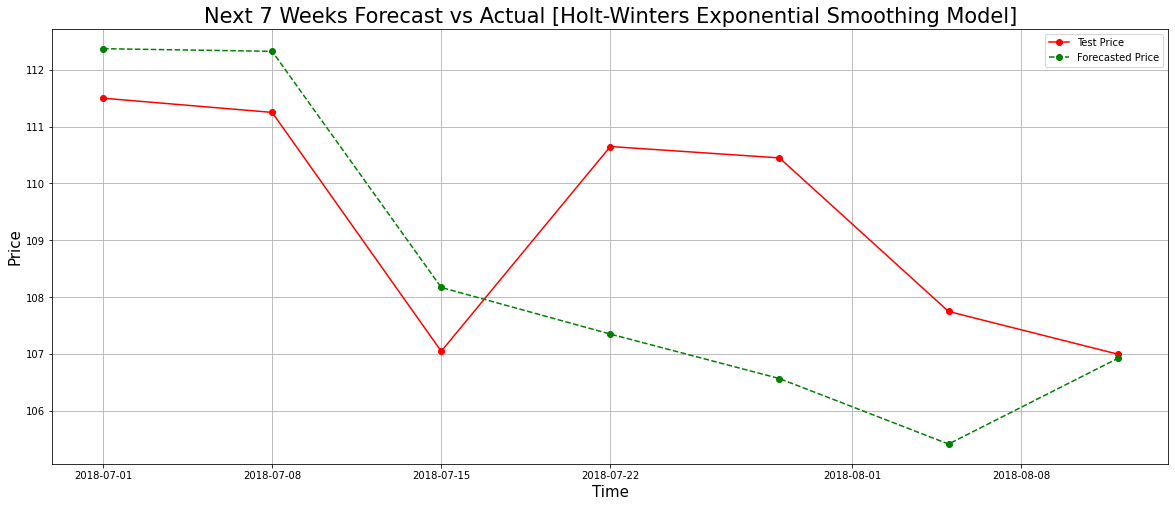

In [58]:
# Implementing Holt-Winters for weekly data
weekly_hwexs_model = HWES(train1, trend="add", seasonal="add", seasonal_periods=85).fit(optimized=True)
test_forecast_weekly = weekly_hwexs_model.forecast(steps=len(test1.values.ravel()))

# Predicting the following 7 weeks
prediction_7weeks = weekly_hwexs_model.forecast(steps=7)
prediction_df_7weeks = pd.DataFrame(prediction_7weeks)

# Testing from the real data for the 7 weeks
test_df_7weeks = pd.DataFrame(test1)
test_df_first_7weeks = pd.DataFrame(test_df_7weeks.head(7))

# Getting the dates - First 7 weekly price data
dates_for_testing_weekly_array = np.array(pd.date_range(start="2018-07-01", end="2018-08-12", freq="W"))
test_df_first_7weeks_array = np.array(test_df_first_7weeks)
prediction_df_7week_array = np.array(prediction_df_7weeks)

# Re-Formatting the data into arrays for the plots
test_df_first_7weeks_array = np.array(test_df_first_7weeks)
prediction_df_7weeks_array = np.array(prediction_df_7weeks.iloc[:7, :][0])

# Plotting
holt_winters_actual_vs_predicted_7weeks = double_ts_plotter(dates_for_testing_weekly_array, test_df_first_7weeks_array,
                                                            prediction_df_7weeks_array,
                                                            "Test Price",
                                                            "Forecasted Price",
                                                            "Next 7 Weeks Forecast vs Actual [Holt-Winters Exponential Smoothing Model]","hw7W.png")

#### Implementing the Holt model - 7 weeks data prediction

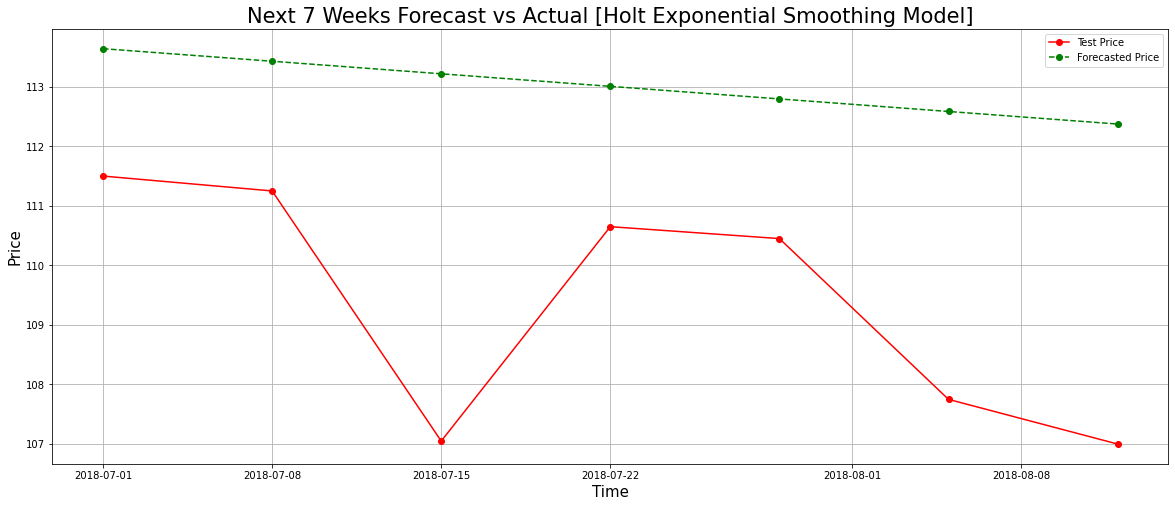

In [59]:
# Implementing weekly Holt - 7 weeks
weekly_hexs_model = Holt(endog=train1).fit(optimized=True)
test_forecast_weekly_holt = weekly_hexs_model.forecast(steps=len(test1.values.ravel()))

# Performing predictions
prediction_7weeks_holt = weekly_hexs_model.forecast(steps=7)

# Correct the variable name
test_df_first_7weeks_holt_array = np.array(test_df_first_7weeks)
prediction_df_7weeks_holt = pd.DataFrame(prediction_7weeks_holt)

# Ensuring the right array variable is used
prediction_df_7weeks_holt_array = np.array(prediction_df_7weeks_holt.iloc[:7, :][0]) 


# Plotting the time series
holt_actual_vs_predicted_7weeks = double_ts_plotter(dates_for_testing_weekly_array,
                                                            test_df_first_7weeks_holt_array, prediction_df_7weeks_holt_array,
                                                            "Test Price",
                                                            "Forecasted Price",
                                                            "Next 7 Weeks Forecast vs Actual [Holt Exponential Smoothing Model]","h7W.png")

Next, I will extend the perdiod of prediction to 31 weeks to analyse the performance using both Holt-Winters and Holt method as done previously for 7 weeks data.

**Effects of increasing the prediction date to 31 weeks:** 

#### Implementing the Holt-Winters model - 31 weeks data prediction

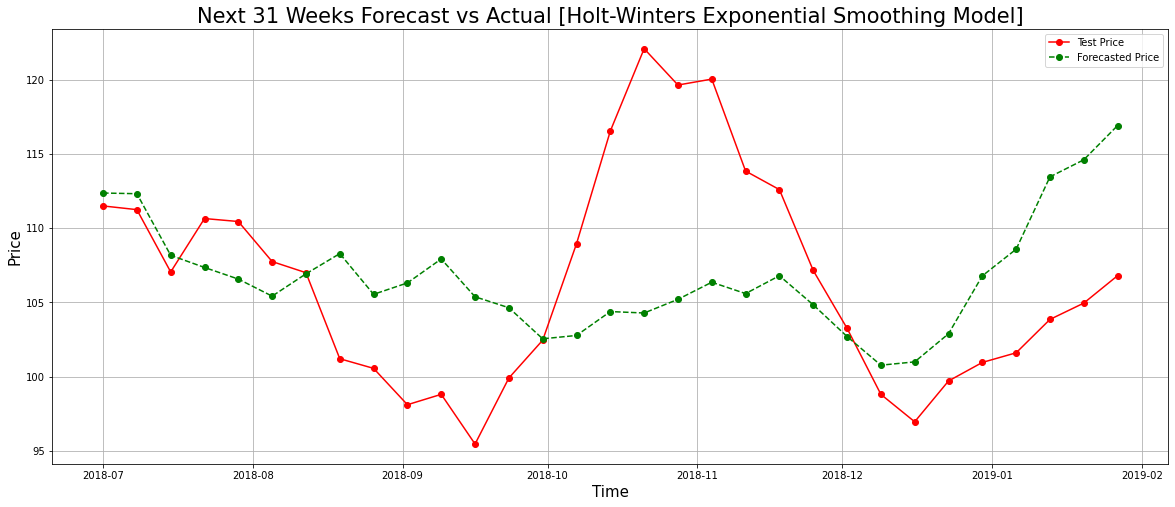

In [60]:
# Performing the predictions
prediction_31weeks = weekly_hwexs_model.forecast(steps=31)
prediction_df_31weeks = pd.DataFrame(prediction_31weeks)
prediction_df_31weeks

# Holt-Winters Exponential smoothing - 31 weeks
test_df_weekly = pd.DataFrame(test1)
test_df_first_31weeks = pd.DataFrame(test_df_weekly.head(31))

# Getting the dates
dates_for_testing_weeks31_array = np.array(pd.date_range(start="2018-07-01", end="2019-01-27", freq="W"))
test_df_31weeks_array = np.array(test_df_first_31weeks)

# Predicting the first 31 weeks
prediction_df_31weeks_array = np.array(prediction_df_31weeks.iloc[:31, :][0]) 

# Ploting the time series
holt_winters_actual_vs_predicted_31weeks = double_ts_plotter(dates_for_testing_weeks31_array, test_df_31weeks_array,
                                                             prediction_df_31weeks_array,
                                                             "Test Price",
                                                             "Forecasted Price",
                                                             "Next 31 Weeks Forecast vs Actual [Holt-Winters Exponential Smoothing Model]","hw31W.png")

#### Implementing the Holt model - 31 weeks data prediction

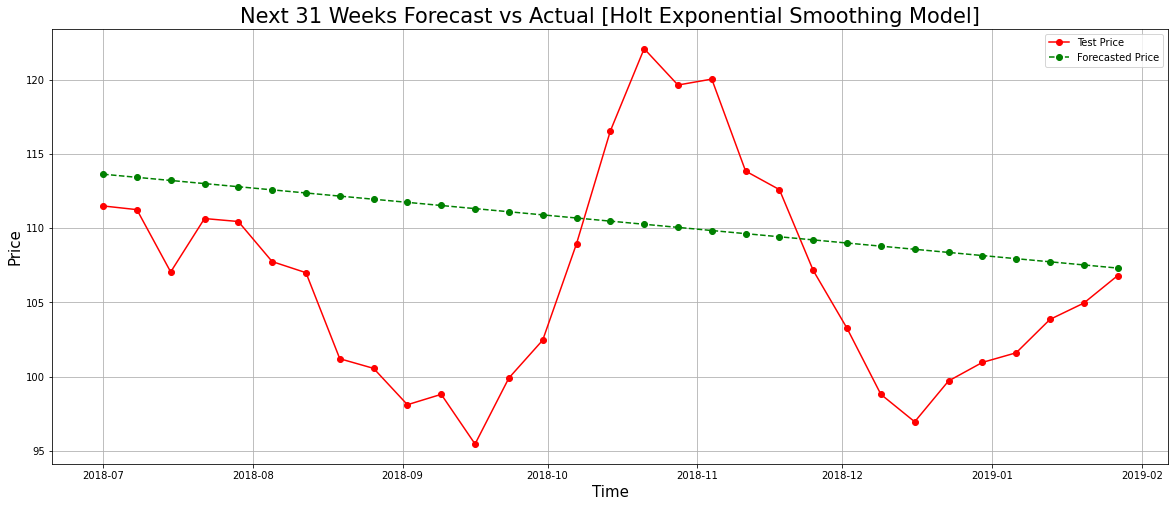

In [61]:
# Holt Exponential Smoothing - 31 weeks
weekly_hexs_model_31 = Holt(endog=train1).fit(optimized=True)
test_forecast_31 = weekly_hexs_model_31.forecast(steps=len(test1.values.ravel()))

# Predicting the following 31 weeks
prediction_31weeks_holt = weekly_hexs_model_31.forecast(steps=31)

# Converting test data and prediction to arrays
test_df_first_31weeks_holt_array = np.array(pd.DataFrame(test1).head(31))
prediction_df_31weeks_holt = pd.DataFrame(prediction_31weeks_holt)

prediction_df_31weeks_holt_array = np.array(prediction_df_31weeks_holt.iloc[:31, :][0]) 

# Ensuring the date range is correct for 31 weeks
dates_for_testing_weekly_array_31 = np.array(pd.date_range(start="2018-07-01", periods=31, freq="W"))

# Ploting the first and second time series
holt_actual_vs_predicted_31weeks = double_ts_plotter(dates_for_testing_weekly_array_31,
                                                            test_df_first_31weeks_holt_array, prediction_df_31weeks_holt_array,
                                                            "Test Price",
                                                            "Forecasted Price",
                                                            "Next 31 Weeks Forecast vs Actual [Holt Exponential Smoothing Model]","h31W.png")

**7 weeks prediction metrics**

In [62]:
# Metrics Holt-Winters for 7 weeks:
y_actual_values7_weeks = np.array(test_df_first_7weeks).flatten()
y_predictions_hw7_weeks = np.array(prediction_7weeks).flatten()

mae_hw7_weeks = mean_absolute_error(y_actual_values7_weeks, y_predictions_hw7_weeks)

# Calculate MSE
mse_hw7_weeks = mean_squared_error(y_actual_values7_weeks, y_predictions_hw7_weeks)

# Calculate RMSE
rmse_hw7_weeks = np.sqrt(mse_hw7_weeks)

# ## Calculating MAPE
# Note to remember for future: When calculating the MAPE at the beginning it led to "nan" values, possibly because of dividing by 0.
# To solve this issue I had to  transform the actual values and the predictions into arrays and then use .flatten().
# After I created a variable (just below) which will gicve me TRUE if not equal to zero and FASLE otherwise.
# Then, it will select the value only when it's TRUE (not equal to 0) and then proceed with the calculation.
non_zero_actuals = y_actual_values7_weeks != 0
# Calculating MAPE
mape_hw7_weeks = np.mean(np.abs((y_actual_values7_weeks[non_zero_actuals] - y_predictions_hw7_weeks[non_zero_actuals]) /
                                 y_actual_values7_weeks[non_zero_actuals])) * 100

print(f"MAE: {mae_hw7_weeks}")
print(f"MSE: {mse_hw7_weeks}")
print(f"RMSE: {rmse_hw7_weeks}")
print(f"MAPE: {mape_hw7_weeks}")

MAE: 1.8075026899096318
MSE: 4.934467955847112
RMSE: 2.2213662363165403
MAPE: 1.6461446515654694


In [63]:
# For Holt Exponential smoothing - 7 weeks
y_actual_values7_weeks = np.array(test_df_first_7weeks).flatten()
y_predictions_holt7_weeks = np.array(prediction_7weeks_holt).flatten()

mae_holt7_weeks = mean_absolute_error(y_actual_values7_weeks, y_predictions_holt7_weeks)

# Calculate MSE
mse_holt7_weeks = mean_squared_error(y_actual_values7_weeks, y_predictions_holt7_weeks)

# Calculate RMSE
rmse_holt7_weeks = np.sqrt(mse_holt7_weeks)

# ## Calculating MAPE
# Note to remember for future: When calculating the MAPE at the beginning it led to "nan" values, possibly because of dividing by 0.
# To solve this issue I had to  transform the actual values and the predictions into arrays and then use .flatten().
# After I created a variable (just below) which will gicve me TRUE if not equal to zero and FASLE otherwise.
# Then, it will select the value only when it's TRUE (not equal to 0) and then proceed with the calculation.
non_zero_actuals = y_actual_values7_weeks != 0
# Calculating MAPE
mape_holt7_weeks = np.mean(np.abs((y_actual_values7_weeks[non_zero_actuals] - y_predictions_holt7_weeks[non_zero_actuals]) /
                                   y_actual_values7_weeks[non_zero_actuals])) * 100

print(f"MAE: {mae_holt7_weeks}")
print(f"MSE: {mse_holt7_weeks}")
print(f"RMSE: {rmse_holt7_weeks}")
print(f"MAPE: {mape_holt7_weeks}")

MAE: 3.627874205442617
MSE: 15.808922400374259
RMSE: 3.9760435611766454
MAPE: 3.3428630913237187


**31 weeks prediction metrics**

In [64]:
# Metrics Holt-Winters for 31 weeks:
y_actual_values31_weeks = np.array(test_df_first_31weeks).flatten()
y_predictions_hw31_weeks = np.array(prediction_31weeks).flatten()

mae_hw31_weeks = mean_absolute_error(y_actual_values31_weeks, y_predictions_hw31_weeks)

# Calculating MSE
mse_hw31_weeks = mean_squared_error(y_actual_values31_weeks, y_predictions_hw31_weeks)

# Calculating RMSE
rmse_hw31_weeks = np.sqrt(mse_hw31_weeks)

# ## Calculating MAPE
# Note to remember for future: When calculating the MAPE at the beginning it led to "nan" values, possibly because of dividing by 0.
# To solve this issue I had to  transform the actual values and the predictions into arrays and then use .flatten().
# After I created a variable (just below) which will gicve me TRUE if not equal to zero and FASLE otherwise.
# Then, it will select the value only when it's TRUE (not equal to 0) and then proceed with the calculation.
non_zero_actuals = y_actual_values31_weeks != 0
# Calculating MAPE
mape_hw31_weeks = np.mean(np.abs((y_actual_values31_weeks[non_zero_actuals] - y_predictions_hw31_weeks[non_zero_actuals]) /
                                  y_actual_values31_weeks[non_zero_actuals])) * 100

print(f"MAE: {mae_hw31_weeks}")
print(f"MSE: {mse_hw31_weeks}")
print(f"RMSE: {rmse_hw31_weeks}")
print(f"MAPE: {mape_hw31_weeks}")

MAE: 6.111634048494585
MSE: 57.74587741164704
RMSE: 7.599070825544859
MAPE: 5.66317166024144


In [65]:
# For Holt Exponential smoothing for 31 weeks:
y_actual_values31_weeks = np.array(test_df_first_31weeks).flatten()
y_predictions_holt31_weeks = np.array(prediction_31weeks_holt).flatten()

# Calculating MAE
mae_holt31_weeks = mean_absolute_error(y_actual_values31_weeks, y_predictions_holt31_weeks)

# Calculating MSE
mse_holt31_weeks = mean_squared_error(y_actual_values31_weeks, y_predictions_holt31_weeks)

# Calculating RMSE
rmse_holt31_weeks = np.sqrt(mse_holt31_weeks)

# ## Calculating MAPE
# Note to remember for future: When calculating the MAPE at the beginning it led to "nan" values, possibly because of dividing by 0.
# To solve this issue I had to  transform the actual values and the predictions into arrays and then use .flatten().
# After I created a variable (just below) which will gicve me TRUE if not equal to zero and FASLE otherwise.
# Then, it will select the value only when it's TRUE (not equal to 0) and then proceed with the calculation.
non_zero_actuals = y_actual_values31_weeks != 0
# Calculating MAPE
mape_holt31_weeks = np.mean(np.abs((y_actual_values31_weeks[non_zero_actuals] - y_predictions_holt31_weeks[non_zero_actuals]) /
                                    y_actual_values31_weeks[non_zero_actuals])) * 100

print(f"MAE: {mae_holt31_weeks}")
print(f"MSE: {mse_holt31_weeks}")
print(f"RMSE: {rmse_holt31_weeks}")
print(f"MAPE: {mape_holt31_weeks}")

MAE: 6.939246154932788
MSE: 65.2746641566588
RMSE: 8.079273739430965
MAPE: 6.656320152712183


**Observations:**
1. Again, the Holt-Winters models peform better than the Holt alone for both frequencies.
2. The Holt-Winters models for 7 weeks is considerably better than the others based on the metrics.

### Monthly Data:

In [66]:
# Visualising monthly data
adj_monthly_prices_date_index

Adj Close
Date                  
2000-01-31  111.099998
2000-02-29   99.900002
2000-03-31  103.699997
2000-04-30   95.300003
2000-05-31   93.000000
...                ...
2022-10-31  177.699997
2022-11-30  167.699997
2022-12-31  167.300003
2023-01-31  181.750000
2023-02-28  177.899994

[278 rows x 1 columns]

In [67]:
# Collecting the right frequency of data again
adj_monthly_prices_date_index = adj_monthly_prices_date_index.asfreq("M")
adj_monthly_prices_date_index = adj_monthly_prices_date_index.fillna(method="ffill") # "Filling" the NaN values that have been generated using the previous line

In [68]:
# Cheking for any possible null value 
nan_checking = adj_monthly_prices_date_index.isnull().sum()
nan_checking

Adj Close    0
dtype: int64

In [69]:
# Creating new test-train split variables 
train2 = adj_monthly_prices_date_index.iloc[:-int(len(adj_monthly_prices_date_index) * 0.2)]
test2 = adj_monthly_prices_date_index.iloc[-int(len(adj_monthly_prices_date_index) * 0.2):]

#### Implementing the Holt-Winters model - 7 months data prediction

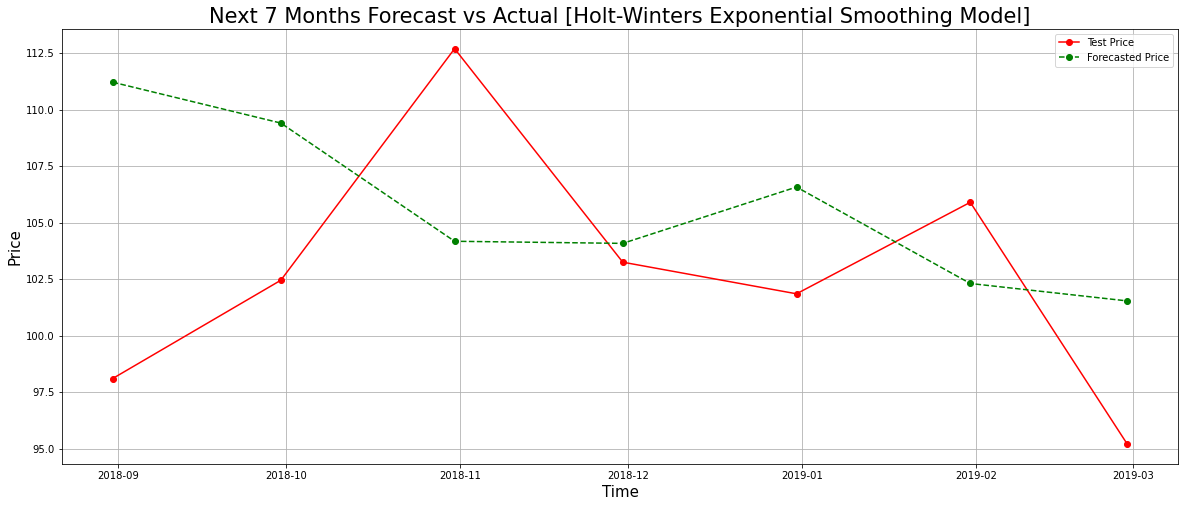

In [70]:
# Implementing Holt-Winters for monthly data
monthly_hwexs_model = HWES(train2, trend="add", seasonal="add", seasonal_periods=22).fit(optimized=True)
## test_forecast_monthly = monthly_hwexs_model.forecast(steps=len(test2.values.ravel()))

# Predicting the following 7 months
prediction_7months = monthly_hwexs_model.forecast(steps=7)
prediction_df_7months = pd.DataFrame(prediction_7months)

# Testing from the real data for the 7 months
test_df_7months = pd.DataFrame(test2)
test_df_first_7months = pd.DataFrame(test_df_7months.head(7))

# Getting the dates - First 7 weekly price data
dates_for_testing_months_array = np.array(pd.date_range(start="2018-08-31", end="2019-02-28", freq="M"))
test_df_first_7months_array = np.array(test_df_first_7months)
prediction_df_7months_array = np.array(prediction_df_7months)

# Re-Formatting the data into arrays for the plots
test_df_first_7months_array = np.array(test_df_first_7months)
prediction_df_7months_array = np.array(prediction_df_7months.iloc[:7, :][0]) 

# Plotting the graphs
holt_winters_actual_vs_predicted_7months = double_ts_plotter(dates_for_testing_months_array, test_df_first_7months_array, 
                                                             prediction_df_7months_array,
                                                             "Test Price",
                                                             "Forecasted Price",
                                                             "Next 7 Months Forecast vs Actual [Holt-Winters Exponential Smoothing Model]", "hw7M.png")

#### Implementing the Holt model - 7 months data prediction

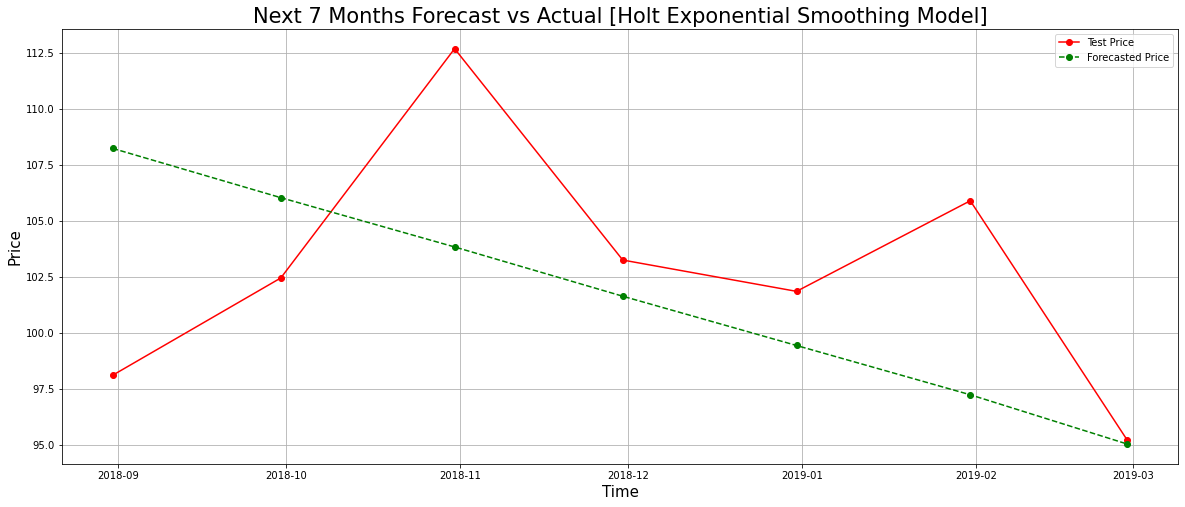

In [71]:
# Implementing weekly Holt - 7 months
monthly_hexs_model = Holt(endog=train2).fit(optimized=True)
## test_forecast_monthly_holt = monthly_hexs_model.forecast(steps=len(test2.values.ravel()))

# Performing predictions
prediction_7months_holt = monthly_hexs_model.forecast(steps=7)

# Correct the variable name
test_df_first_7months_holt_array = np.array(test_df_first_7months)
prediction_df_7months_holt = pd.DataFrame(prediction_7months_holt)

# Ensuring the right array variable is used
prediction_df_7months_holt_array = np.array(prediction_df_7months_holt.iloc[:7, :][0]) 

# Ploting the first time series
holt_actual_vs_predicted_7months = double_ts_plotter(dates_for_testing_months_array,test_df_first_7months_holt_array,
                                                     prediction_df_7months_holt_array,
                                                     "Test Price",
                                                     "Forecasted Price",
                                                     "Next 7 Months Forecast vs Actual [Holt Exponential Smoothing Model]","h7M.png")

Next, I will extend the perdiod of prediction to 31 months as done previously to analyse the performance using both Holt-Winters and Holt method as done previously for 7 months data.

**Effects of increasing the prediction date to 31 months:** 

#### Implementing the Holt-Winters model - 31 months data prediction

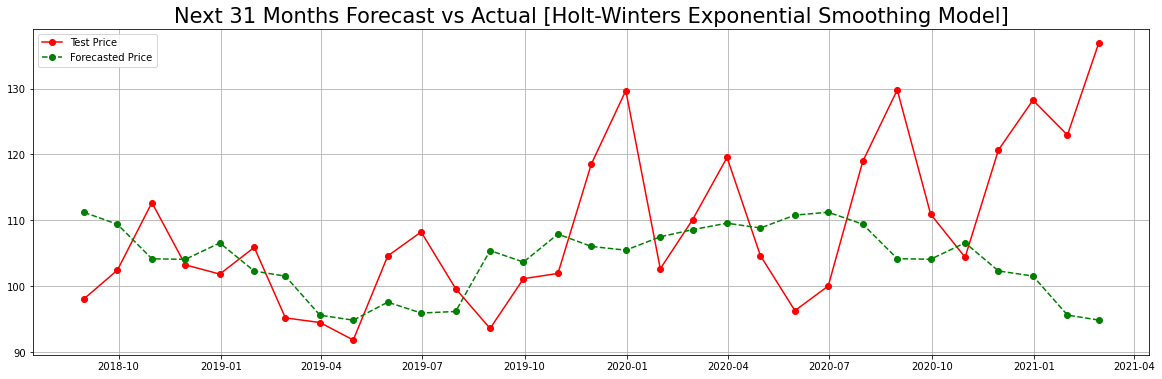

In [72]:
# Performing the predictions - Holt-Winters
prediction_31months = monthly_hwexs_model.forecast(steps=31)
prediction_df_31months = pd.DataFrame(prediction_31months)
prediction_df_31months

# Holt-Winters Exponential smoothing - 31 months
test_df_monthly = pd.DataFrame(test2)
test_df_first_31months = pd.DataFrame(test_df_monthly.head(31))

# Getting the dates
dates_for_testing_months31_array = np.array(pd.date_range(start="2018-08-31", end="2021-02-28", freq="M"))
test_df_31months_array = np.array(test_df_first_31months)

# Predicting the first 31 months
prediction_df_31months_array = np.array(prediction_df_31months.iloc[:31, :][0]) 

# Ploting the first time series
plt.figure(figsize=(20, 6))
plt.plot(dates_for_testing_months31_array, test_df_31months_array, label="Test Price",
                                                                   color="red", linestyle="-", marker="o")

# Ploting the second time series on the same graph
plt.plot(dates_for_testing_months31_array[:31], prediction_df_31months_array, label="Forecasted Price",
                                                                              linestyle="dashed", color="green", marker="o")

# Adding legend, grid and showing plot
plt.title("Next 31 Months Forecast vs Actual [Holt-Winters Exponential Smoothing Model]", fontsize=21)
plt.legend()
plt.grid()
plt.savefig("hw31M.png")
plt.show()

#### Implementing the Holt model - 31 months data prediction

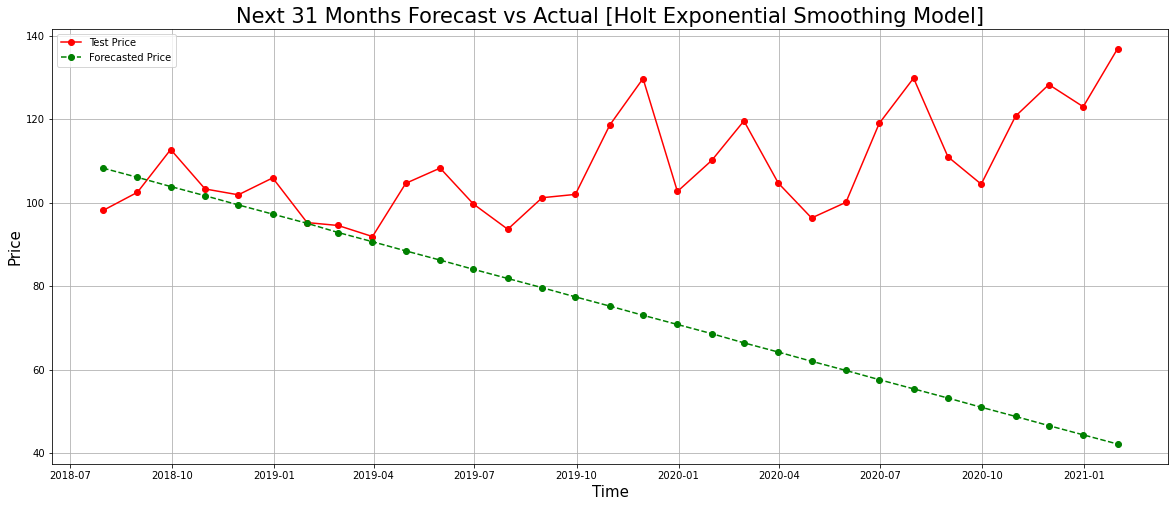

In [73]:
# Holt Exponential Smoothing - 31 months
months_hexs_model_31 = Holt(endog=train2).fit(optimized=True)
## test_forecast_31 = weekly_hexs_model_31.forecast(steps=len(test2.values.ravel()))

# Predicting the following 31 months
prediction_31months_holt = months_hexs_model_31.forecast(steps=31)

# Converting test data and prediction to arrays
test_df_first_31months_holt_array = np.array(pd.DataFrame(test2).head(31))
prediction_df_31months_holt = pd.DataFrame(prediction_31months_holt)

prediction_df_31months_holt_array = np.array(prediction_df_31months_holt.iloc[:31, :][0]) 

# Ensuring the date range is correct for 31 months
dates_for_testing_months_array_31 = np.array(pd.date_range(start="2018-07-01", periods=31, freq="M"))

# Ploting the first and second time series
holt_actual_vs_predicted_31months = double_ts_plotter(dates_for_testing_months_array_31,
                                                            test_df_first_31months_holt_array, prediction_df_31months_holt_array,
                                                            "Test Price",
                                                            "Forecasted Price",
                                                            "Next 31 Months Forecast vs Actual [Holt Exponential Smoothing Model]", "h31M.png")

**Performance Metrics:**

**7 months prediction metrics**

In [74]:
# Metrics Holt-Winters for 7 months:
y_actual_values7_months = np.array(test_df_first_7months).flatten()
y_predictions_hw7_months = np.array(prediction_7months).flatten()

mae_hw7_months = mean_absolute_error(y_actual_values7_months, y_predictions_hw7_months)

# Calculating MSE
mse_hw7_months = mean_squared_error(y_actual_values7_months, y_predictions_hw7_months)

# Calculating RMSE
rmse_hw7_months = np.sqrt(mse_hw7_months)

# ## Calculating MAPE
# Note to remember for future: When calculating the MAPE at the beginning it led to "nan" values, possibly because of dividing by 0.
# To solve this issue I had to  transform the actual values and the predictions into arrays and then use .flatten().
# After I created a variable (just below) which will gicve me TRUE if not equal to zero and FASLE otherwise.
# Then, it will select the value only when it's TRUE (not equal to 0) and then proceed with the calculation.
non_zero_actuals = y_actual_values7_months != 0
# Calculating MAPE
mape_hw7_months = np.mean(np.abs((y_actual_values7_months[non_zero_actuals] - y_predictions_hw7_months[non_zero_actuals]) /
                                  y_actual_values7_months[non_zero_actuals])) * 100

print(f"MAE: {mae_hw7_months}")
print(f"MSE: {mse_hw7_months}")
print(f"RMSE: {rmse_hw7_months}")
print(f"MAPE: {mape_hw7_months}")

MAE: 6.297991665298885
MSE: 52.743940337797106
RMSE: 7.262502346835911
MAPE: 6.1743045023822125


In [75]:
# For Holt Exponential smoothing - 7 months
y_actual_values7_months = np.array(test_df_first_7months).flatten()
y_predictions_holt7_months = np.array(prediction_7months_holt).flatten()

mae_holt7_months = mean_absolute_error(y_actual_values7_months, y_predictions_holt7_months)

# Calculate MSE
mse_holt7_months = mean_squared_error(y_actual_values7_months, y_predictions_holt7_months)

# Calculate RMSE
rmse_holt7_months = np.sqrt(mse_holt7_months)

# ## Calculating MAPE
# Note to remember for future: When calculating the MAPE at the beginning it led to "nan" values, possibly because of dividing by 0.
# To solve this issue I had to  transform the actual values and the predictions into arrays and then use .flatten().
# After I created a variable (just below) which will gicve me TRUE if not equal to zero and FASLE otherwise.
# Then, it will select the value only when it's TRUE (not equal to 0) and then proceed with the calculation.
non_zero_actuals = y_actual_values7_months != 0
# Calculating MAPE
mape_holt7_months = np.mean(np.abs((y_actual_values7_months[non_zero_actuals] - y_predictions_holt7_months[non_zero_actuals]) /
                                   y_actual_values7_months[non_zero_actuals])) * 100


print(f"MAE: {mae_holt7_months}")
print(f"MSE: {mse_holt7_months}")
print(f"RMSE: {rmse_holt7_months}")
print(f"MAPE: {mape_holt7_months}")

MAE: 5.0688202989885855
MSE: 39.71959565112322
RMSE: 6.302348423494469
MAPE: 4.860604606178884


**31 months prediction metrics**

In [76]:
# Metrics Holt-Winters for 31 months:
y_actual_values31_months = np.array(test_df_first_31months).flatten()
y_predictions_hw31_months = np.array(prediction_31months).flatten()

mae_hw31_months = mean_absolute_error(y_actual_values31_months, y_predictions_hw31_months)

# Calculating MSE
mse_hw31_months = mean_squared_error(y_actual_values31_months, y_predictions_hw31_months)

# Calculating RMSE
rmse_hw31_months = np.sqrt(mse_hw31_months)

# ## Calculating MAPE
# Note to remember for future: When calculating the MAPE at the beginning it led to "nan" values, possibly because of dividing by 0.
# To solve this issue I had to  transform the actual values and the predictions into arrays and then use .flatten().
# After I created a variable (just below) which will gicve me TRUE if not equal to zero and FASLE otherwise.
# Then, it will select the value only when it's TRUE (not equal to 0) and then proceed with the calculation.
non_zero_actuals = y_actual_values31_months != 0
# Calculating MAPE
mape_hw31_months = np.mean(np.abs((y_actual_values31_months[non_zero_actuals] - y_predictions_hw31_months[non_zero_actuals]) /
                                  y_actual_values31_months[non_zero_actuals])) * 100


print(f"MAE: {mae_hw31_months}")
print(f"MSE: {mse_hw31_months}")
print(f"RMSE: {rmse_hw31_months}")
print(f"MAPE: {mape_hw31_months}")

MAE: 10.736093917828358
MSE: 204.92621122682422
RMSE: 14.315244015622794
MAPE: 9.325240048208776


In [77]:
# For Holt Exponential smoothing for 31 months:
y_actual_values31_months = np.array(test_df_first_31months).flatten()
y_predictions_holt31_months = np.array(prediction_31months_holt).flatten()

# Calculating MAE
mae_holt31_months = mean_absolute_error(y_actual_values31_months, y_predictions_holt31_months)

# Calculating MSE
mse_holt31_months = mean_squared_error(y_actual_values31_months, y_predictions_holt31_months)

# Calculating RMSE
rmse_holt31_months = np.sqrt(mse_holt31_months)

# ## Calculating MAPE
# Note to remember for future: When calculating the MAPE at the beginning it led to "nan" values, possibly because of dividing by 0.
# To solve this issue I had to  transform the actual values and the predictions into arrays and then use .flatten().
# After I created a variable (just below) which will gicve me TRUE if not equal to zero and FASLE otherwise.
# Then, it will select the value only when it's TRUE (not equal to 0) and then proceed with the calculation.
non_zero_actuals = y_actual_values31_months != 0
# Calculating MAPE
mape_holt31_months = np.mean(np.abs((y_actual_values31_months[non_zero_actuals] - y_predictions_holt31_months[non_zero_actuals]) / 
                                    y_actual_values31_months[non_zero_actuals])) * 100

print(f"MAE: {mae_holt31_months}")
print(f"MSE: {mse_holt31_months}")
print(f"RMSE: {rmse_holt31_months}")
print(f"MAPE: {mape_holt31_months}")

MAE: 34.37911423525496
MSE: 1937.8233559109428
RMSE: 44.02071507723316
MAPE: 29.785228750246045


**Observations:**
1. Although the graph for the 7 months prediction seems to caputure the movement better, the metrics have lower error for the Holt model than the Holt-Winters.
2. Whereas for the 31 weeks prediction, the Holt-Winters in significantly better than the Holt in terms of statical metrics and visually by the graphs.

**Metrics Table:**

In [78]:
# Creating a table for the frequency 7
table_frequency_7 = {
    "Model": ["Holt-Winters 7 Days", "Holt 7 Days", "Holt-Winters 7 Weeks", "Holt 7 Weeks", "Holt-Winters 7 Months", "Holt 7 Months"],
    "MAE": [mae_hw7, mae_holt7, mae_hw7_weeks, mae_holt7_weeks, mae_hw7_months, mae_holt7_months],
    "MSE": [mse_hw7, mse_holt7, mse_hw7_weeks, mse_holt7_weeks, mse_hw7_months, mse_holt7_months],
    "RMSE": [rmse_hw7, rmse_holt7, rmse_hw7_weeks, rmse_holt7_weeks, rmse_hw7_months, rmse_holt7_months],
    "MAPE": [mape_hw7, mape_holt7, mape_hw7_weeks, mape_holt7_weeks, mape_hw7_months, mape_holt7_months]
}

# Creating the DataFrame
table_frequency_7_df = pd.DataFrame(table_frequency_7)

# Displaying the DataFrame
table_frequency_7_df

Model       MAE        MSE      RMSE      MAPE
0    Holt-Winters 7 Days  0.748964   0.803398  0.896325  0.662522
1            Holt 7 Days  0.849977   1.200584  1.095712  0.753265
2   Holt-Winters 7 Weeks  1.807503   4.934468  2.221366  1.646145
3           Holt 7 Weeks  3.627874  15.808922  3.976044  3.342863
4  Holt-Winters 7 Months  6.297992  52.743940  7.262502  6.174305
5          Holt 7 Months  5.068820  39.719596  6.302348  4.860605

In [79]:
# Creating a table for the frequency 31
table_frequency_31 = {
    "Model": ["Holt-Winters 31 Days", "Holt 31 Days", "Holt-Winters 31 Weeks", "Holt 31 Weeks", "Holt-Winters 31 Months", "Holt 31 Months"],
    "MAE": [mae_hw31, mae_holt31, mae_hw31_weeks, mae_holt31_weeks, mae_hw31_months, mae_holt31_months],
    "MSE": [mse_hw31, mse_holt31, mse_hw31_weeks, mse_holt31_weeks, mse_hw31_months, mse_holt31_months],
    "RMSE": [rmse_hw31, rmse_holt31, rmse_hw31_weeks, rmse_holt31_weeks, rmse_hw31_months, rmse_holt31_months],
    "MAPE": [mape_hw31, mape_holt31, mape_hw31_weeks, mape_holt31_weeks, mape_hw31_months, mape_holt31_months]
}

# Creating the DataFrame
table_frequency_31_df = pd.DataFrame(table_frequency_31)

# Displaying the DataFrame
table_frequency_31_df

Model        MAE          MSE       RMSE       MAPE
0    Holt-Winters 31 Days   4.418157    27.650859   5.258408   4.076878
1            Holt 31 Days   3.402305    17.644189   4.200499   3.149942
2   Holt-Winters 31 Weeks   6.111634    57.745877   7.599071   5.663172
3           Holt 31 Weeks   6.939246    65.274664   8.079274   6.656320
4  Holt-Winters 31 Months  10.736094   204.926211  14.315244   9.325240
5          Holt 31 Months  34.379114  1937.823356  44.020715  29.785229

In [80]:
# Time end model 1:
time.sleep(2)  # Placeholder for model
model1_end = time.time()
model1_execution_time = model1_end - model1_start
print("Exponential Smoothing Models execution time: {} seconds".format(model1_execution_time))

Exponential Smoothing Models execution time: 35.5925087928772 seconds


----

## Method 2: SARIMA models

**Visualising the 3 data frequencies again:**

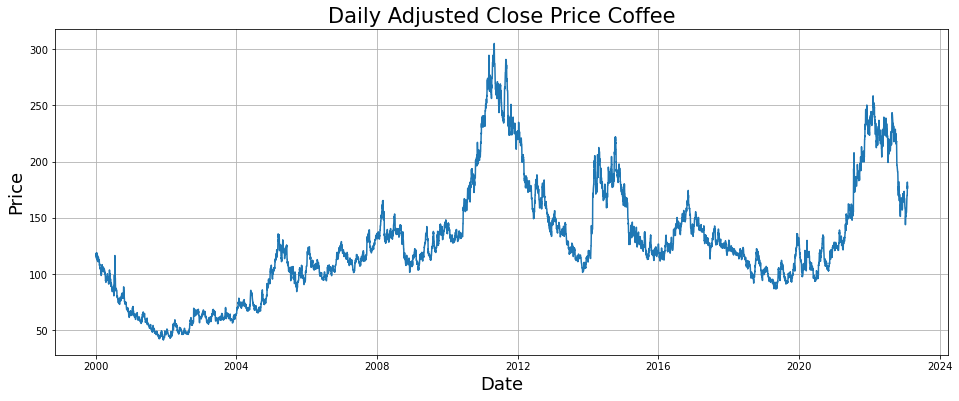

In [81]:
# Daily data visualisation
figure_plotter(adj_daily_prices_date_index, "Date", "Price", "Daily Adjusted Close Price Coffee")

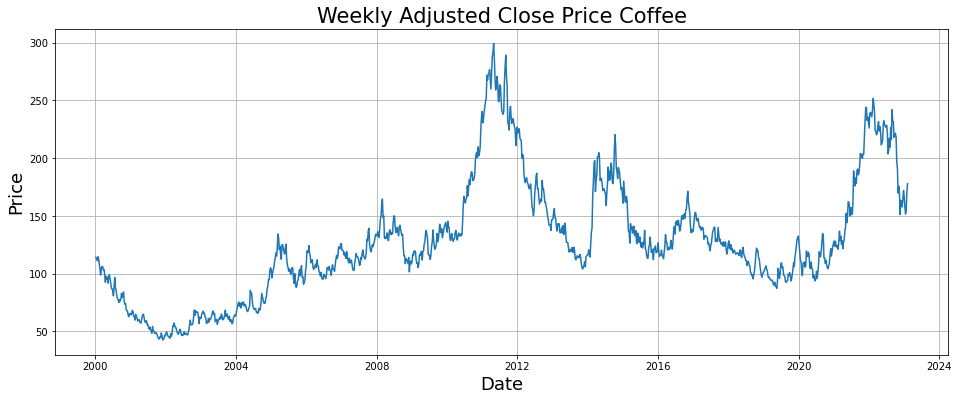

In [82]:
# Weekly data visualisation
figure_plotter(adj_weekly_prices_date_index, "Date", "Price", "Weekly Adjusted Close Price Coffee")

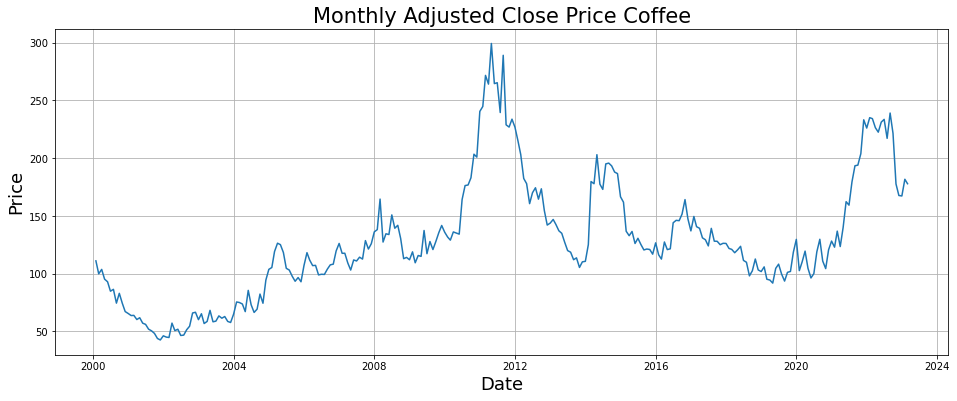

In [83]:
# Monthly data visualisation
figure_plotter(adj_monthly_prices_date_index, "Date", "Price", "Monthly Adjusted Close Price Coffee")

As we move from daily to weekly and then weekly to monthly the plot has the same shape but becomes smoother.

## Daily Data:

### Stationarity

Initial ideas from this: `https://hex.tech/blog/stationarity-in-time-series/`.

**Checking for Heteroskedasticity/Non-costant variance and possible transformation:**

Using the video tutorial `SARIMA Identification Models in R: Part 1` by Mario Castro and the website `https://www.statisticshowto.com/probability-and-statistics/normal-distributions/box-cox-transformation/` I am trying to find if it is necessary for our data to perform a transformation to stabilise the variablity of the data and if so, what is the ideal value of lambda.

In [84]:
# timing for SARIMA
model2_start = time.time()

# Importing the relevant libraries for testing the need for a transformation
from scipy.stats import boxcox, boxcox_normmax, boxcox_normplot

# Finding the ideal lambda for Personr and MLE
ideal_lambda = boxcox_normmax(adj_daily_prices_date_index["Adj Close"], method="all")
ideal_lambda

array([0.28735682, 0.26018318])

Since the lambda values are closer to 0 than 1, I opted for a transformation.

In [85]:
# Performing Box-Cox transformation using the selected lambda value (minimising MLE)
daily_transformed_data = boxcox(adj_daily_prices_date_index["Adj Close"], lmbda=ideal_lambda[0])
daily_transformed_data

array([10.17688115, 10.16845325, 10.24717155, ..., 12.03865378,
       11.89344183, 11.94346889])

In [86]:
# Reformatting the data for future use
daily_transformed_data_df = pd.DataFrame(daily_transformed_data, columns=["Transformed Prices"]) # Turning into dataframe ad giving column name
daily_transformed_data_df.index = adj_daily_prices_date_index.index # Making so that the index is the same as adj_daily_prices_date_index index
daily_transformed_data_df

Transformed Prices
Date                          
2000-01-03           10.176881
2000-01-04           10.168453
2000-01-05           10.247172
2000-01-06           10.188659
2000-01-07           10.097144
...                        ...
2023-01-29           11.740886
2023-01-30           11.753744
2023-01-31           12.038654
2023-02-01           11.893442
2023-02-02           11.943469

[8432 rows x 1 columns]

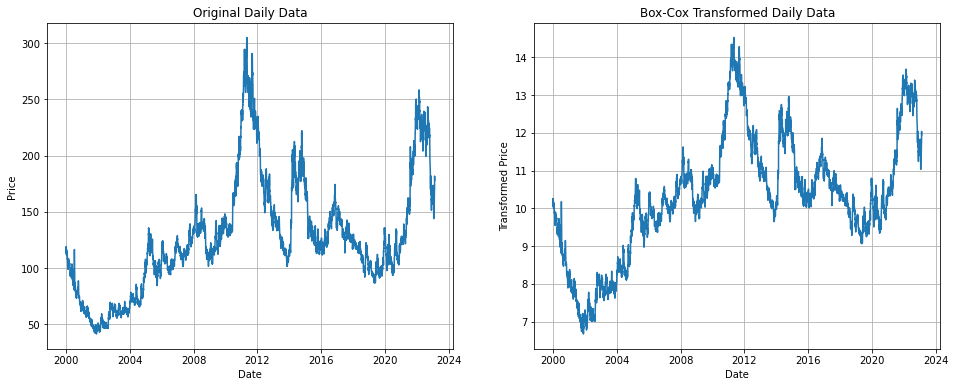

In [87]:
# Plotting the original and transformed data
plt.figure(figsize=(16, 6)) # Re-sizing
plt.subplot(1, 2, 1)

# Original data plot
plt.plot(adj_daily_prices_date_index)
plt.title("Original Daily Data")
plt.ylabel("Price")
plt.xlabel("Date")
plt.grid()

# Transformed data data plot
plt.subplot(1, 2, 2)
plt.plot(daily_transformed_data_df)
plt.title("Box-Cox Transformed Daily Data")
plt.ylabel("Transformed Price")
plt.xlabel("Date")
plt.grid()
plt.show()

The variability has little effect on the original daily data.

It is clear from the graphs above that stationarity is not present in either the orginal daily data or the transformed one.

**Using `TimeSeriesSplit` to train and test the data**

Using the ideas from `https://medium.com/@Stan_DS/timeseries-split-with-sklearn-tips-8162c83612b9`, `https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit` and `https://www.kaggle.com/code/tomwarrens/timeseriessplit-how-to-use-it` to train and test the data while keeping temporal order.

#### Note: The TimeSeriesSplit was NOT APPLIED in future model but it was done manually as done before. Just kept this part for reference

In [88]:
# Importing the library
from sklearn.model_selection import TimeSeriesSplit
n_splits = 10 # Want to make 10 splits since there is abundant data for this
tss = TimeSeriesSplit(n_splits)

# Iterateing over the splits - Just applied what I have seen on tutorials as a practice
for train_index, test_index in tss.split(daily_transformed_data_df): # Using the transformed data
    train_dates = daily_transformed_data_df.index[train_index]
    test_dates = daily_transformed_data_df.index[test_index]
        # Print or use train and test dates
    #print("Train dates:", train_dates)
    #print("Test dates:", test_dates)

**ACF and PACF plots, and Augmented Dickey-Fuller test:**

Further testing (the lack of) stationarity in the data.

Inspiration from: `https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf`, `https://www.youtube.com/watch?v=-aCF0_wfVwY` and `https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html`.

Non-tranformed data:

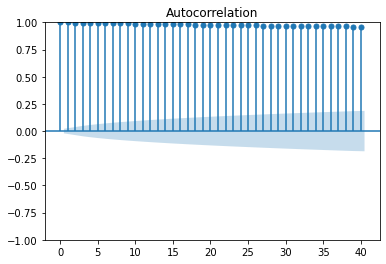

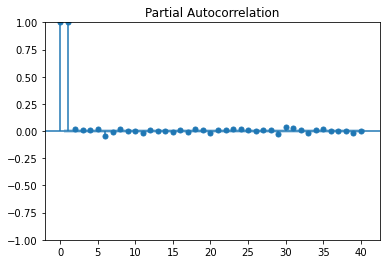

In [89]:
# Importing the libraries needed
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller as adf

# Quickly visualise ACF and PACF for non-trnasformed data
acf_adj_daily_prices_date_index = plot_acf(adj_daily_prices_date_index)
pacf_adj_daily_prices_date_index = plot_pacf(adj_daily_prices_date_index)

**Observations:**
1. ACF is high for all lags and almost no sign of decay
2. PACF has significant lags at 0 and 1 only
3. This may suggest non-stationary time series

Tranformed data:

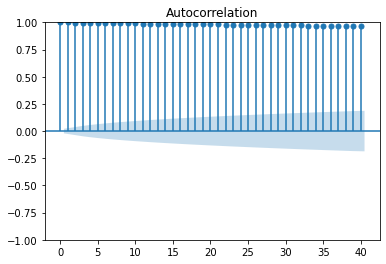

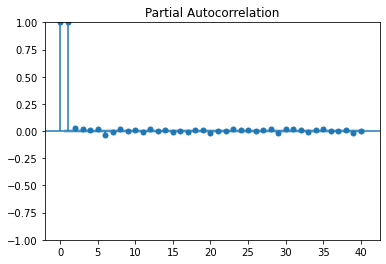

In [90]:
# Quickly visualise ACF and PACF for transformed data
acf_transformed_prices = plot_acf(daily_transformed_data_df)
pacf_transformed_prices = plot_pacf(daily_transformed_data_df)

**Observations:**
1. High lags at 0 for both ACF and PACF which is to be expected
2. ACF is high for all lags and almost no sign of decay 
3. PACF has significant lags at 0 and 1 only
4. Data could be White Noise (data is random and independent of each other - no predictive ability with TS models)
5. Can use Ljung-Box Test to see if data is just White noise

In [91]:
# ADF test
print(f"The p-value for the non-transformed daily data is: {adf(adj_daily_prices_date_index)[1]}")
print(f"The p-value for the transformed daily data is: {adf(daily_transformed_data_df)[1]}")

The p-value for the non-transformed daily data is: 0.4486884809563339
The p-value for the transformed daily data is: 0.36025951753224034


**Observations:** The p-value for the ADF for both transformed data is below 0.05 and for the non-trasnformed is way above 0.05. This means we fail to reject the null hypothesis that the data is non-stationary for the non-transformed data but it is stationary for the transformed one. 

However, what the ACF, PACF and the transformed data shows is in conflict with what the ADF is telling us. Want to use Ljung Box Test to assess if the transformed data is just White Noise before proceeding.

**Ljung-Box Test:**

Inspiration from: `https://www.statisticshowto.com/ljung-box-test/`, `https://www.youtube.com/watch?v=caXvSH_EltM`, `https://www.statology.org/ljung-box-test-python/` and `https://www.youtube.com/watch?v=NzOF932JBwE`.

In [92]:
# Performing the test to get the p-values and test statistics
from statsmodels.tsa.stattools import q_stat, acf
# We will use "acf" of the data to look at the correlation between the data and the its lagged value at different points of lag.
# Done to identifies dependencies
daily_transformed_lb_stat, daily_transformed_lb_p_value = q_stat(acf(daily_transformed_data_df["Transformed Prices"], nlags=365),
                                               nobs=len(daily_transformed_data_df))

In [93]:
# Iterating over the p-values to see if a/any p-value is less than 0.05 and if it is, it gets appended to the list
temp_lst = [] # List containing p-values that are less or equal than 0.05
for iteration in daily_transformed_lb_p_value:
    if iteration <= 0.05:
        temp_lst.append(iteration)

# If the list has any value less than 0.05, then the data is not white noise
if len(temp_lst) > 0:
    print("The data is not likely to be white noise.")
else:
    print("The data is likely to be white noise.")

The data is not likely to be white noise.


In [94]:
# Function to do do Ljung-Box test
def white_noise_checker(data, specific_column, lags):
    lb_stat, lb_p_value = q_stat(acf(data[specific_column], nlags=lags), nobs=len(data))
    
    temp_lst = []
    for iteration in lb_p_value:
        if iteration <= 0.05:
            temp_lst.append(iteration)

    if len(temp_lst) > 0:
        print("The data is not likely to be white noise.")
    else:
        print("The data is likely to be white noise.")

# Testing with non-transformed data
white_noise_checker(adj_daily_prices_date_index, "Adj Close", 365)

The data is not likely to be white noise.


**Applying differencing**:

First, will difference the non-transformed data.

<AxesSubplot:xlabel='Date'>

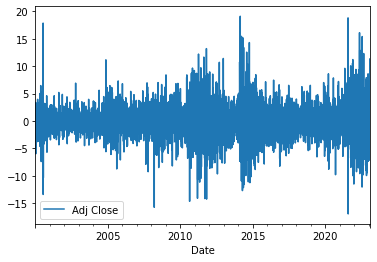

In [95]:
# Applying first difference
adj_daily_prices_date_index_diff1 = adj_daily_prices_date_index.diff().dropna() # Dropping potential na values
adj_daily_prices_date_index_diff1.plot()

**Observation:** The data seems stationary as the values are relatively centered around zero, constant variance but the oscillation are somewhat "violent" in certain points. Also, it can be observed the lack trend and seasonality.

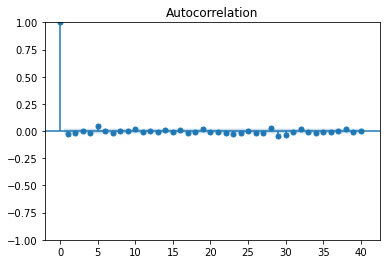

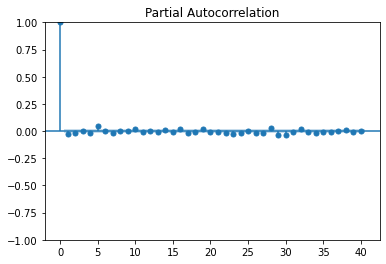

In [96]:
# Plotting the ACF and PACF
adj_daily_prices_date_index_diff1_acf = plot_acf(adj_daily_prices_date_index_diff1)
adj_daily_prices_date_index_diff1_pacf = plot_pacf(adj_daily_prices_date_index_diff1)

In [97]:
# ADF test
print(f"The p-value is: {adf(adj_daily_prices_date_index_diff1)[1]}")

The p-value is: 2.6052755130093306e-30


**Observations:** Both the ACF and PACF show that there is only one significant lag at 0. But the p-value below 0.05 of the ADF tests suggests stationarity.

Applying second differencing.

<AxesSubplot:xlabel='Date'>

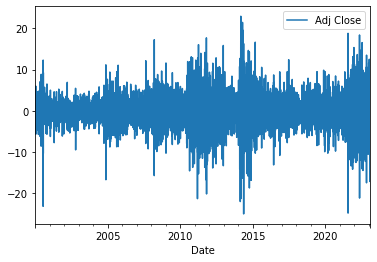

In [98]:
# Applying second difference
adj_daily_prices_date_index_diff2 = adj_daily_prices_date_index_diff1.diff().dropna()
adj_daily_prices_date_index_diff2.plot()

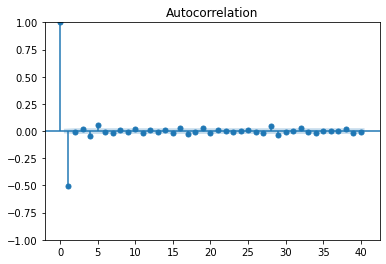

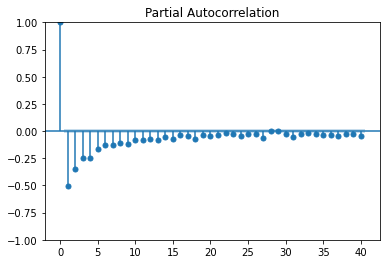

In [99]:
# Plotting the ACF and PACF
adj_daily_prices_date_index_diff2_acf = plot_acf(adj_daily_prices_date_index_diff2)
adj_daily_prices_date_index_diff2_pacf = plot_pacf(adj_daily_prices_date_index_diff2)

In [100]:
# ADF test
print(f"The p-value is: {adf(adj_daily_prices_date_index_diff2)[1]}")

The p-value is: 0.0


**Observations:** The second differencing for the non-transformed data has ACF with signifincat lags at 0 and 1, while the PACF has significant lag at 0 and 1 arguably and then a gradual decay.

Now, differencing transformed data.

<AxesSubplot:xlabel='Date'>

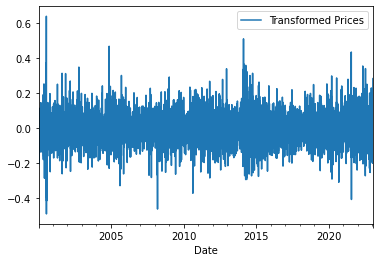

In [101]:
# Applying differencing
daily_transformed_data_df_diff1 = daily_transformed_data_df.diff().dropna()
daily_transformed_data_df_diff1.plot()

**Observations:** The graph shows stationarity but compared to non-transformed data, the oscilattion are less "violent", so less variance. The other aspects are the same.

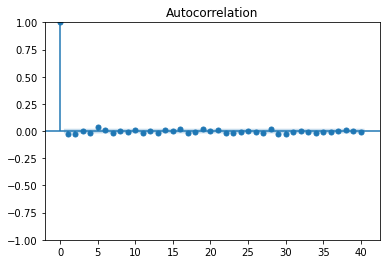

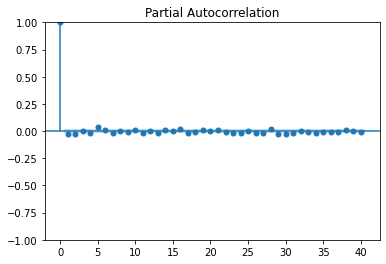

In [102]:
# plotting acf and pacf
daily_transformed_data_df_diff1_acf = plot_acf(daily_transformed_data_df_diff1)
daily_transformed_data_df_diff1_pacf = plot_pacf(daily_transformed_data_df_diff1)

In [103]:
# ADF test
adf(daily_transformed_data_df_diff1)[1]

0.0

**Observations:** Both the ACF and PACF show that there is only one significant lag at 0. But the p-value below 0.05 of the ADF tests suggests stationarity. Similar to non-transformed data.

Applying second differencing.

<AxesSubplot:xlabel='Date'>

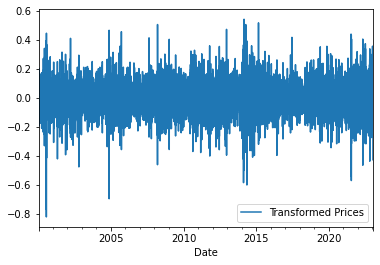

In [104]:
# Differencing a second time
daily_transformed_data_df_diff2 = daily_transformed_data_df_diff1.diff().dropna()
daily_transformed_data_df_diff2.plot()

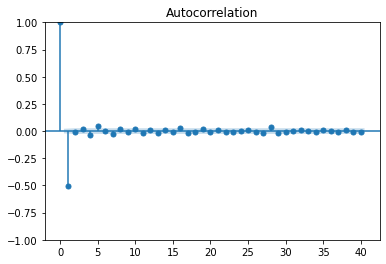

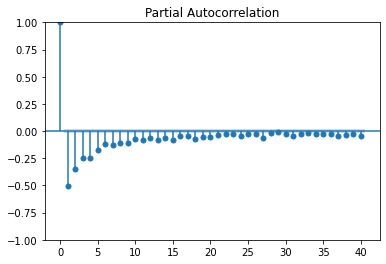

In [105]:
# Plotting acf and pacf
daily_transformed_data_df_diff2_acf = plot_acf(daily_transformed_data_df_diff2)
daily_transformed_data_df_diff2_pacf = plot_pacf(daily_transformed_data_df_diff2)

**Observations:** Similarly to transformed data, the second differencing for thetransformed data has ACF with signifincat lags at 0 and 1, while the PACF has significant lag at 0 and 1 arguably and then, a gradual decay. Because PACF only decays with no sudden spikes it may siggests a AR(0) here.

**Model Selection**:

Idea from: `https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf`, `https://www.youtube.com/watch?v=ZE_WGBe0_VU` and `https://www.youtube.com/watch?v=_qv_7lEuiZg`.

By analysing the graphs alone for second differencing data specifically for the non-transformed and tansformed data, it can be seen the following:
1. There is a significant lag at 0 and 1 for the ACF and then it "cuts off". This suggests MA(1) model
2. Whereas the PACF there is a significant lag at 0 and then a gradual decay. This may suggest a AR(0)
4. Cannot see any seasonal pattern on the plots, so possibly no SARIMA model needed

**7 days prediction metrics**

In [106]:
# Getting the right data
adj_daily_prices_df_test = saved_coffe_data_daily[["Date","Adj Close"]]

# Adjusting the data
adj_daily_prices_df_test["Date"] = pd.to_datetime(adj_daily_prices_df_test["Date"], infer_datetime_format=True)
adj_daily_prices_df_test = adj_daily_prices_df_test.set_index(["Date"])
adj_daily_prices_df_test

<ipython-input-106-c12fc4b40ad0>:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  adj_daily_prices_df_test["Date"] = pd.to_datetime(adj_daily_prices_df_test["Date"], infer_datetime_format=True)
<ipython-input-106-c12fc4b40ad0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_daily_prices_df_test["Date"] = pd.to_datetime(adj_daily_prices_df_test["Date"], infer_datetime_format=True)


Adj Close
Date                  
2000-01-03  116.500000
2000-01-04  116.250000
2000-01-05  118.599998
2000-01-06  116.849998
2000-01-07  114.150002
...                ...
2023-01-27  169.899994
2023-01-30  170.399994
2023-01-31  181.750000
2023-02-01  175.899994
2023-02-02  177.899994

[5785 rows x 1 columns]

In [107]:
# Oberserving if the data type is correct and presence of null values
adj_daily_prices_df_test["Adj Close diff"] = adj_daily_prices_df_test["Adj Close"].diff(periods=12)
adj_daily_prices_df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5785 entries, 2000-01-03 to 2023-02-02
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Adj Close       5785 non-null   float64
 1   Adj Close diff  5773 non-null   float64
dtypes: float64(2)
memory usage: 135.6 KB


In [108]:
# Looking at the data
adj_daily_prices_df_test

Adj Close  Adj Close diff
Date                                  
2000-01-03  116.500000             NaN
2000-01-04  116.250000             NaN
2000-01-05  118.599998             NaN
2000-01-06  116.849998             NaN
2000-01-07  114.150002             NaN
...                ...             ...
2023-01-27  169.899994       19.000000
2023-01-30  170.399994       26.500000
2023-01-31  181.750000       32.350006
2023-02-01  175.899994       24.199997
2023-02-02  177.899994       26.799988

[5785 rows x 2 columns]

In [109]:
# Creating differenced data (THIS WILL BE ONLY NECESSARY IF I WILL USE SARIMAX, ANY EXOGENOUS VARIABLES - UNLIKELY TO BE INCLUDED)
adj_daily_prices_df_test["Adj Close diff"].fillna(method="backfill", inplace=True)
adj_daily_prices_df_test

Adj Close  Adj Close diff
Date                                  
2000-01-03  116.500000       -4.500000
2000-01-04  116.250000       -4.500000
2000-01-05  118.599998       -4.500000
2000-01-06  116.849998       -4.500000
2000-01-07  114.150002       -4.500000
...                ...             ...
2023-01-27  169.899994       19.000000
2023-01-30  170.399994       26.500000
2023-01-31  181.750000       32.350006
2023-02-01  175.899994       24.199997
2023-02-02  177.899994       26.799988

[5785 rows x 2 columns]

In [110]:
# Further adjusting the data frame
adj_daily_prices_df_test_for_train_test = adj_daily_prices_df_test["Adj Close"]
adj_daily_prices_df_test_for_train_test = pd.DataFrame(adj_daily_prices_df_test_for_train_test)

# Adding the month index [AGAIN ONLY NEED TO BE USED IF i WILL USE ANY EXOGENOUS VARIABLES]
adj_daily_prices_df_test["Month index"] = adj_daily_prices_df_test.index.month
adj_daily_prices_df_test

Adj Close  Adj Close diff  Month index
Date                                               
2000-01-03  116.500000       -4.500000            1
2000-01-04  116.250000       -4.500000            1
2000-01-05  118.599998       -4.500000            1
2000-01-06  116.849998       -4.500000            1
2000-01-07  114.150002       -4.500000            1
...                ...             ...          ...
2023-01-27  169.899994       19.000000            1
2023-01-30  170.399994       26.500000            1
2023-01-31  181.750000       32.350006            1
2023-02-01  175.899994       24.199997            2
2023-02-02  177.899994       26.799988            2

[5785 rows x 3 columns]

In [111]:
# Creating testing and train data and then fitting the model using auto arima
import pmdarima as pm 
train_daily_arima = adj_daily_prices_df_test_for_train_test.iloc[:-int(len(adj_daily_prices_df_test_for_train_test) * 0.2)]
test_daily_arima = adj_daily_prices_df_test_for_train_test.iloc[-int(len(adj_daily_prices_df_test_for_train_test) * 0.2):]

# Fitting the first model
SARIMAX_model1 = pm.auto_arima(train_daily_arima["Adj Close"],
                        start_p=1, start_q=1,test="adf", max_p=2, max_q=2, m=12,start_P=0, seasonal=True, d=None, D=1,
                        trace=False, error_action="ignore", suppress_warnings=True, stepwise=True)
SARIMAX_model1

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [112]:
# Fitting the model suggested by auto_arima using  statsmodels.tsa.arima.model library
from statsmodels.tsa.arima.model import ARIMA
model_daily_arima = ARIMA(train_daily_arima["Adj Close"], order=(1,0,0),
                seasonal_order=(2,1,0,12)).fit()
# Creating forecasts
forecast_daily_arima = model_daily_arima.forecast(len(test_daily_arima))

# Creating the data frame and visualising
forecast_daily_arima_df = pd.DataFrame(forecast_daily_arima)
forecast_daily_arima_df

C:\Users\rafiu\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rafiu\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rafiu\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rafiu\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an

predicted_mean
4628      111.665770
4629      111.916713
4630      111.644717
4631      112.160988
4632      111.701858
...              ...
5780      110.697805
5781      110.758921
5782      110.633950
5783      111.382325
5784      111.029045

[1157 rows x 1 columns]

In [113]:
# More data manipulation
test_daily_arima.index
# Getting the index
date_daily_arima = test_daily_arima.index
date_daily_arima_df = pd.DataFrame(date_daily_arima)

# Converting the "Date" column to datetime format
date_daily_arima_df["Date"] = pd.to_datetime(date_daily_arima_df["Date"])

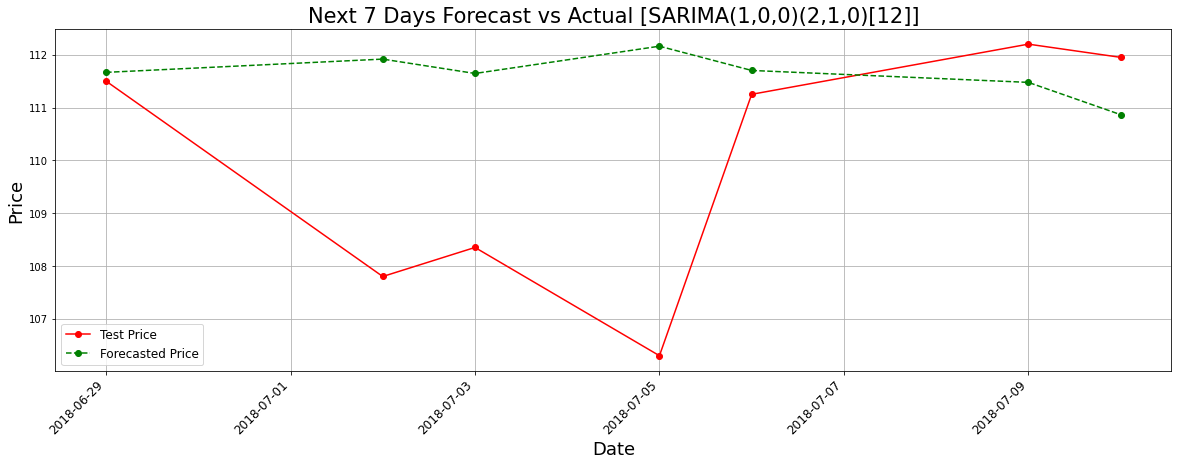

In [114]:
# Setting the 'Date' column as the index of forecast_daily_arima_df
forecast_daily_arima_df.index = date_daily_arima_df['Date']

dates_for_testing_daily_daily_arima_array = np.array(pd.date_range(start="2018-06-29", periods=7))
prediction_df_array_daily_arima = np.array(forecast_daily_arima_df.iloc[:7, :]["predicted_mean"])
test_df_first_7_array_daily_arima = np.array(test_daily_arima["Adj Close"][:7])

# Plotting predicted and test data for the next 7 days
plt.figure(figsize=(20, 7))
ax = test_daily_arima["Adj Close"][:7].plot(label="Test Price", color="red", linestyle="-", marker="o")
forecast_daily_arima_df.iloc[:7, :]["predicted_mean"].plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")

# Customizing the plot
plt.xticks(rotation=45, fontsize=12)  # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 7 Days Forecast vs Actual [SARIMA(1,0,0)(2,1,0)[12]]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig("sarima7D.png")
plt.show()

In [115]:
# Converting the arrays to pandas Series because of how the rest of the code works from previous use in the other models
y_pred_first_7_days_daily_arima = pd.Series(prediction_df_array_daily_arima)
y_test_first_7_days_daily_arima = pd.Series(test_df_first_7_array_daily_arima)

# Calculating Mean Absolute Error (MAE)
mae_daily_arima_first_7_days = mean_absolute_error(y_test_first_7_days_daily_arima, y_pred_first_7_days_daily_arima)

# Calculating Mean Squared Error (MSE)
mse_daily_arima_first_7_days = mean_squared_error(y_test_first_7_days_daily_arima, y_pred_first_7_days_daily_arima)

# Calculating Root Mean Squared Error (RMSE)
rmse_daily_arima_first_7_days = np.sqrt(mse_daily_arima_first_7_days)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_7_days_daily_arima = y_test_first_7_days_daily_arima != 0
mape_daily_arima_first_7_days = np.mean(np.abs((y_test_first_7_days_daily_arima[non_zero_actuals_first_7_days_daily_arima] -
                                        y_pred_first_7_days_daily_arima[non_zero_actuals_first_7_days_daily_arima]) / 
                                        y_test_first_7_days_daily_arima[non_zero_actuals_first_7_days_daily_arima])) * 100

# Printing the error terms
print(f"Mean Absolute Error (MAE) for first 7 days: {mae_daily_arima_first_7_days}")
print(f"Mean Squared Error (MSE) for first 7 days: {mse_daily_arima_first_7_days}")
print(f"Root Mean Squared Error (RMSE) for first 7 days: {rmse_daily_arima_first_7_days}")
print(f"Mean Absolute percentage Error (MAPE) for first 7 days: {mape_daily_arima_first_7_days}")

Mean Absolute Error (MAE) for first 7 days: 2.242680490405324
Mean Squared Error (MSE) for first 7 days: 9.155155274085079
Root Mean Squared Error (RMSE) for first 7 days: 3.0257487129775136
Mean Absolute percentage Error (MAPE) for first 7 days: 2.077475052386838


**31 days prediction metrics**

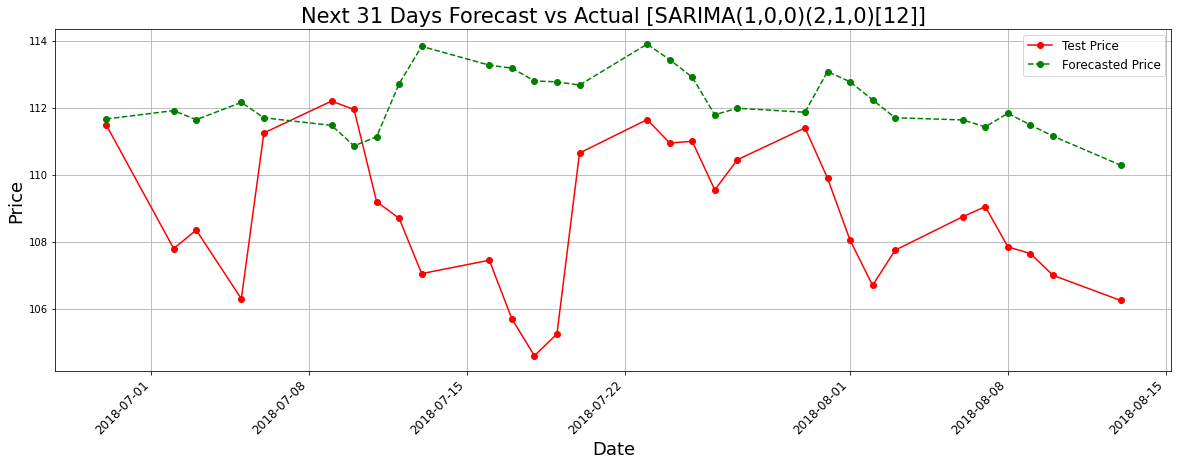

In [116]:
# Setting the 'Date' column as the index of forecast_daily_arima_df
forecast_daily_arima_df.index = date_daily_arima_df["Date"]

dates_for_testing_daily_daily_arima_array = np.array(pd.date_range(start="2018-06-29", periods=31))
prediction_df_array_daily_arima = np.array(forecast_daily_arima_df.iloc[:31, :]["predicted_mean"])
test_df_first_31_array_daily_arima = np.array(test_daily_arima["Adj Close"][:31])

# Plotting predicted and test data for the next 7 days
plt.figure(figsize=(20, 7))
ax = test_daily_arima["Adj Close"][:31].plot(label="Test Price", color="red", linestyle="-", marker="o")
forecast_daily_arima_df.iloc[:31, :]["predicted_mean"].plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")

# Customizing the plot
plt.xticks(rotation=45, fontsize=12)  # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 31 Days Forecast vs Actual [SARIMA(1,0,0)(2,1,0)[12]]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig("sarima31D.png")
plt.show()

In [117]:
# Converting the arrays to pandas Series because of how the rest of the code works from previous use in the other models
y_pred_first_31_days_daily_arima = pd.Series(prediction_df_array_daily_arima)
y_test_first_31_days_daily_arima = pd.Series(test_df_first_31_array_daily_arima)

# Calculating Mean Absolute Error (MAE)
mae_daily_arima_first_31_days = mean_absolute_error(y_test_first_31_days_daily_arima, y_pred_first_31_days_daily_arima)

# Calculating Mean Squared Error (MSE)
mse_daily_arima_first_31_days = mean_squared_error(y_test_first_31_days_daily_arima, y_pred_first_31_days_daily_arima)

# Calculating Root Mean Squared Error (RMSE)
rmse_daily_arima_first_31_days = np.sqrt(mse_daily_arima_first_31_days)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_31_days_daily_arima = y_test_first_31_days_daily_arima != 0
mape_daily_arima_first_31_days = np.mean(np.abs((y_test_first_31_days_daily_arima[non_zero_actuals_first_31_days_daily_arima] -
                                        y_pred_first_31_days_daily_arima[non_zero_actuals_first_31_days_daily_arima]) / 
                                        y_test_first_31_days_daily_arima[non_zero_actuals_first_31_days_daily_arima])) * 100

# Printing the error terms
print(f"Mean Absolute Error (MAE) for first 31 days: {mae_daily_arima_first_31_days}")
print(f"Mean Squared Error (MSE) for first 31 days: {mse_daily_arima_first_31_days}")
print(f"Root Mean Squared Error (RMSE) for first 31 days: {rmse_daily_arima_first_31_days}")
print(f"Mean Absolute percentage Error (MAPE) for first 31 days: {mape_daily_arima_first_31_days}")

Mean Absolute Error (MAE) for first 31 days: 3.518952252491792
Mean Squared Error (MSE) for first 31 days: 17.01489606410309
Root Mean Squared Error (RMSE) for first 31 days: 4.1249116431874135
Mean Absolute percentage Error (MAPE) for first 31 days: 3.2719010062095357


## Weekly Data:

### Stationarity

**Checking for Heteroskedasticity/Non-costant variance and possible transformation:**

In [118]:
# Finding the ideal lambda for Personr and MLE
ideal_lambda_weekly = boxcox_normmax(adj_weekly_prices_date_index["Adj Close"], method="all")
ideal_lambda_weekly

array([0.29266714, 0.26452554])

In [119]:
# Performing Box-Cox transformation using the selected lambda value (minimising MLE)
weekly_transformed_data = boxcox(adj_weekly_prices_date_index["Adj Close"], lmbda=ideal_lambda_weekly[0])
weekly_transformed_data

array([10.25356186, 10.19720276, 10.14920701, ..., 11.52829089,
       11.94099648, 12.14920512])

In [120]:
# Log transformation for future testing
lg_transfo_weekly= np.log(adj_weekly_prices_date_index["Adj Close"])

In [121]:
# Reformatting the data for future use
weekly_transformed_data_df = pd.DataFrame(weekly_transformed_data, columns=["Transformed Prices"]) # Turning into dataframe ad giving column name
weekly_transformed_data_df.index = adj_weekly_prices_date_index.index # Making so that the index is the same as adj_daily_prices_date_index index
weekly_transformed_data_df

Transformed Prices
Date                          
2000-01-09           10.253562
2000-01-16           10.197203
2000-01-23           10.149207
2000-01-30           10.272806
2000-02-06           10.209579
...                        ...
2023-01-08           11.626404
2023-01-15           11.440071
2023-01-22           11.528291
2023-01-29           11.940996
2023-02-05           12.149205

[1205 rows x 1 columns]

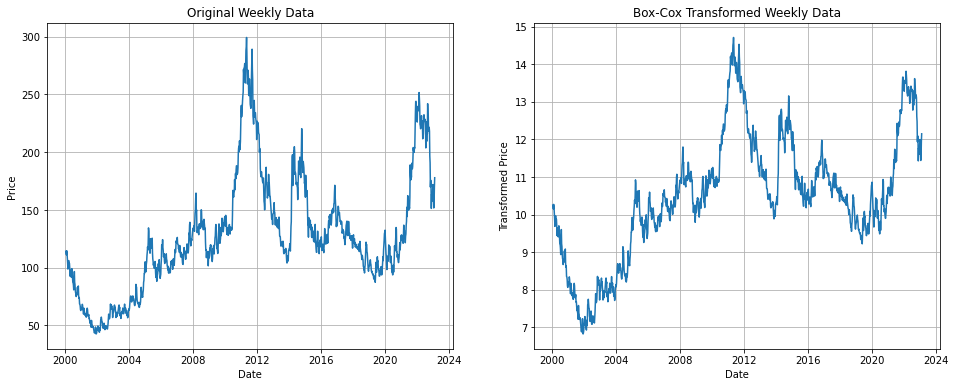

In [122]:
# Plotting the original and transformed data
plt.figure(figsize=(16, 6)) # Re-sizing
plt.subplot(1, 2, 1)

# Original data plot
plt.plot(adj_weekly_prices_date_index)
plt.title("Original Weekly Data")
plt.ylabel("Price")
plt.xlabel("Date")
plt.grid()

# Transformed data  plot
plt.subplot(1, 2, 2)
plt.plot(weekly_transformed_data_df)
plt.title("Box-Cox Transformed Weekly Data")
plt.ylabel("Transformed Price")
plt.xlabel("Date")
plt.grid()
plt.show()

**ACF and PACF plots, and Augmented Dickey-Fuller test:**

Non-tranformed data:

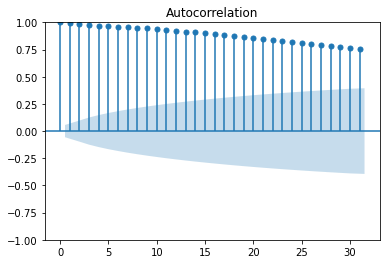

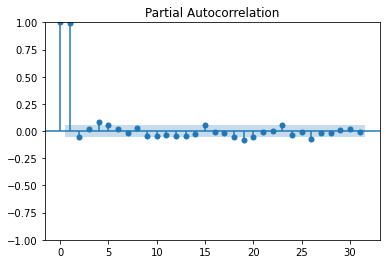

In [123]:
# Quickly visualise ACF and PACF for non-trnasformed data
acf_adj_weekly_prices_date_index = plot_acf(adj_weekly_prices_date_index)
pacf_adj_weekly_prices_date_index = plot_pacf(adj_weekly_prices_date_index)

Tranformed data:

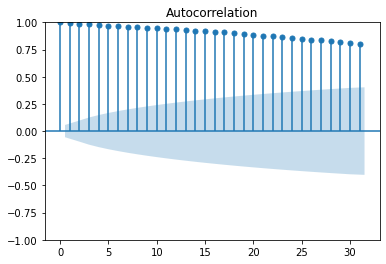

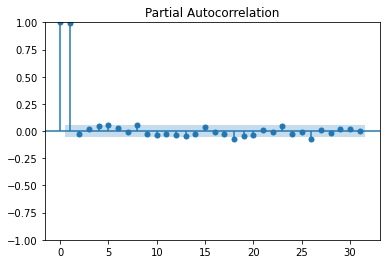

In [124]:
# Quickly visualise ACF and PACF for transformed data - weekly
acf_transformed_weekly_prices = plot_acf(weekly_transformed_data_df)
pacf_transformed_weekly_prices = plot_pacf(weekly_transformed_data_df)

In [125]:
# ADF test - Weekly data
print(f"The p-value for the non-transformed weekly data is: {adf(adj_weekly_prices_date_index)[1]}")
print(f"The p-value for the transformed weekly data is: {adf(weekly_transformed_data_df)[1]}")

The p-value for the non-transformed weekly data is: 0.15668760791593217
The p-value for the transformed weekly data is: 0.5666328950331793


**Ljung-Box Test:**

In [126]:
# Performing the test to get the p-values and test statistics
from statsmodels.tsa.stattools import q_stat, acf
weekly_transformed_lb_stat, weekly_transformed_lb_p_value = q_stat(acf(weekly_transformed_data_df["Transformed Prices"], nlags=52),
                                               nobs=len(weekly_transformed_data_df))

In [127]:
white_noise_checker(adj_weekly_prices_date_index, "Adj Close", 52)

The data is not likely to be white noise.


**Applying differencing**:

First, will difference the non-transformed data.


<AxesSubplot:xlabel='Date'>

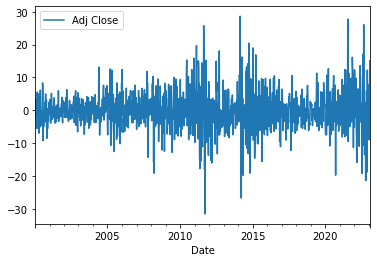

In [128]:
# Applying first difference
adj_weekly_prices_date_index_diff1 = adj_weekly_prices_date_index.diff().dropna() # Dropping potential na values
adj_weekly_prices_date_index_diff1.plot()

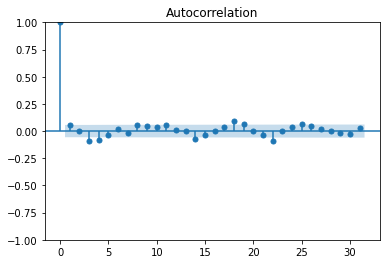

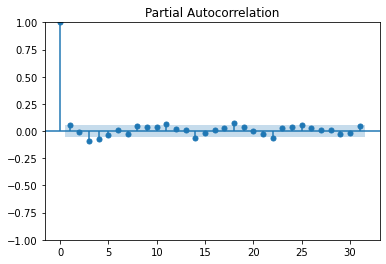

In [129]:
# Plotting the ACF and PACF
adj_weekly_prices_date_index_diff1_acf = plot_acf(adj_weekly_prices_date_index_diff1)
adj_weekly_prices_date_index_diff1_pacf = plot_pacf(adj_weekly_prices_date_index_diff1)

In [130]:
# ADF test
print(f"The p-value is: {adf(adj_weekly_prices_date_index_diff1)[1]}")

The p-value is: 0.0


Applying second differencing.

<AxesSubplot:xlabel='Date'>

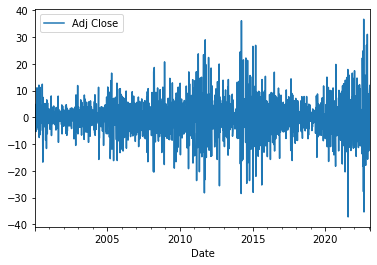

In [131]:
# Applying second difference
adj_weekly_prices_date_index_diff2 = adj_weekly_prices_date_index_diff1.diff().dropna()
adj_weekly_prices_date_index_diff2.plot()

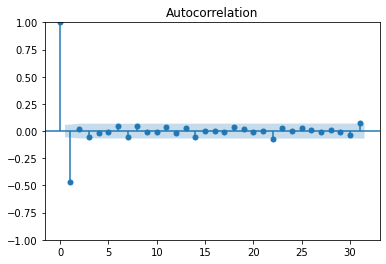

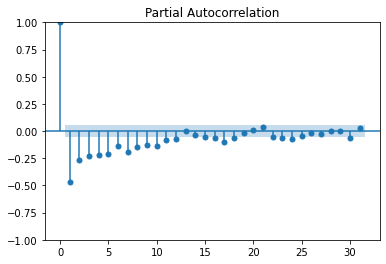

In [132]:
# Plotting the ACF and PACF
adj_weekly_prices_date_index_diff2_acf = plot_acf(adj_weekly_prices_date_index_diff2)
adj_weekly_prices_date_index_diff2_pacf = plot_pacf(adj_weekly_prices_date_index_diff2)

In [133]:
# ADF test
print(f"The p-value is: {adf(adj_weekly_prices_date_index_diff2)[1]}")

The p-value is: 3.896787355420297e-23


Now, differencing transformed data.

<AxesSubplot:xlabel='Date'>

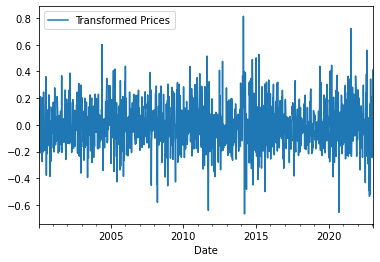

In [134]:
# Applying differencing
weekly_transformed_data_df_diff1 = weekly_transformed_data_df.diff().dropna()
weekly_transformed_data_df_diff1.plot()

Applying second differencing.

<AxesSubplot:xlabel='Date'>

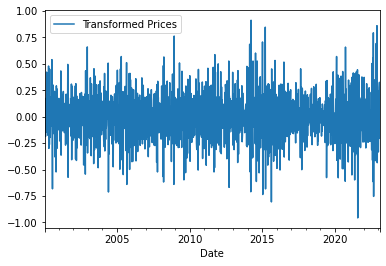

In [135]:
# Differencing a second time 
weekly_transformed_data_df_diff2 = weekly_transformed_data_df_diff1.diff().dropna()
weekly_transformed_data_df_diff2.plot()

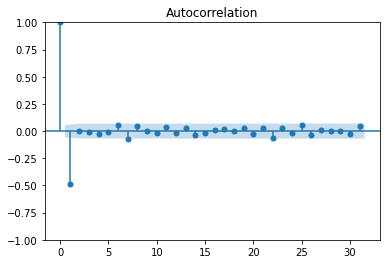

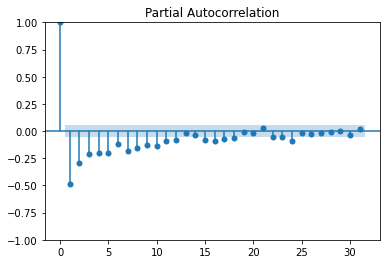

In [136]:
# Plotting acf and pacf
weekly_transformed_data_df_diff2_acf = plot_acf(weekly_transformed_data_df_diff2)
weekly_transformed_data_df_diff2_pacf = plot_pacf(weekly_transformed_data_df_diff2)

**Model Selection**:

**7 weeks prediction metrics**

In [137]:
# Getting the right data
adj_weekly_prices_df_test = saved_coffe_data_daily[["Date","Adj Close"]]
adj_weekly_prices_df_test = adj_daily_prices_df_test.resample("W").last()
adj_weekly_prices_df_test

Adj Close  Adj Close diff  Month index
Date                                               
2000-01-09  114.150002       -4.500000            1
2000-01-16  112.550003       -4.500000            1
2000-01-23  111.199997       -5.050003            1
2000-01-30  114.699997       -3.100006            1
2000-02-06  112.900002       -3.799995            2
...                ...             ...          ...
2023-01-08  158.300003       -5.750000            1
2023-01-15  151.699997      -15.250000            1
2023-01-22  154.800003      -11.500000            1
2023-01-29  169.899994       19.000000            1
2023-02-05  177.899994       26.799988            2

[1205 rows x 3 columns]

In [138]:
# Oberserving if the data type is correct and presence of null vlaues
adj_weekly_prices_df_test["Adj Close diff"] = adj_weekly_prices_df_test["Adj Close"].diff(periods=12)
adj_weekly_prices_df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1205 entries, 2000-01-09 to 2023-02-05
Freq: W-SUN
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Adj Close       1205 non-null   float64
 1   Adj Close diff  1193 non-null   float64
 2   Month index     1205 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 32.9 KB


In [139]:
# Looking at the data
adj_weekly_prices_df_test

Adj Close  Adj Close diff  Month index
Date                                               
2000-01-09  114.150002             NaN            1
2000-01-16  112.550003             NaN            1
2000-01-23  111.199997             NaN            1
2000-01-30  114.699997             NaN            1
2000-02-06  112.900002             NaN            2
...                ...             ...          ...
2023-01-08  158.300003      -38.399994            1
2023-01-15  151.699997      -39.199997            1
2023-01-22  154.800003      -15.000000            1
2023-01-29  169.899994       -5.850006            1
2023-02-05  177.899994        7.799988            2

[1205 rows x 3 columns]

In [140]:
# Creating differenced data (THIS WILL BE ONLY NECESSARY IF I WILL USE SARIMAX, ANY EXOGENOUS VARIABLES - UNLIKELY)
adj_weekly_prices_df_test["Adj Close diff"].fillna(method="backfill", inplace=True)
adj_weekly_prices_df_test

Adj Close  Adj Close diff  Month index
Date                                               
2000-01-09  114.150002      -10.450005            1
2000-01-16  112.550003      -10.450005            1
2000-01-23  111.199997      -10.450005            1
2000-01-30  114.699997      -10.450005            1
2000-02-06  112.900002      -10.450005            2
...                ...             ...          ...
2023-01-08  158.300003      -38.399994            1
2023-01-15  151.699997      -39.199997            1
2023-01-22  154.800003      -15.000000            1
2023-01-29  169.899994       -5.850006            1
2023-02-05  177.899994        7.799988            2

[1205 rows x 3 columns]

In [141]:
# Further adjusting the data frame
adj_weekly_prices_df_test_for_train_test = adj_weekly_prices_df_test["Adj Close"]
adj_weekly_prices_df_test_for_train_test = pd.DataFrame(adj_weekly_prices_df_test_for_train_test)

# Adding the month index [AGAIN ONLY NEED TO BE USED IF i WILL USE ANY EXOGENOUS VARIABLES]
adj_weekly_prices_df_test["Month index"] = adj_weekly_prices_df_test.index.month
adj_weekly_prices_df_test

Adj Close  Adj Close diff  Month index
Date                                               
2000-01-09  114.150002      -10.450005            1
2000-01-16  112.550003      -10.450005            1
2000-01-23  111.199997      -10.450005            1
2000-01-30  114.699997      -10.450005            1
2000-02-06  112.900002      -10.450005            2
...                ...             ...          ...
2023-01-08  158.300003      -38.399994            1
2023-01-15  151.699997      -39.199997            1
2023-01-22  154.800003      -15.000000            1
2023-01-29  169.899994       -5.850006            1
2023-02-05  177.899994        7.799988            2

[1205 rows x 3 columns]

###### For the next part, I had to learn some new content which is more relate to CS (in my opnion). To do this I watched some videos and read infor from web pages. The sources are the following:
For general knowledge:
- https://medium.com/@jhoansfuentes1999/memory-management-in-python-a58b8bb9384b
- https://www.youtube.com/watch?v=pVGujarYk9w
- https://www.youtube.com/watch?v=pyqa47b4Fys

More on how to apply here:
- https://docs.python.org/3/library/gc.html
- https://stackoverflow.com/questions/1035489/python-garbage-collection
- https://medium.com/@josephosoo/garbage-collection-as-a-memory-management-technique-in-python-5f3ee57c7e07
- https://dev.to/karishmashukla/how-python-uses-garbage-collection-for-efficient-memory-management-270h


In [142]:
### 
# Read for the future: When running the weekly data as done previosuly for daily data I ran into memory issues
# This led to the jupyter Notebook to crash.
# To solve this I had to explore better ways to manage my memory to behave it like this
# The goal was to split the data into smaller pieces/chunks and then fit SARIMA model to make it more manageable.
# The model would choose the ideal/"best" model and give the information
# Then, I would use the best model given by pdarima to implement it myself with another library and get the forecasts
# Some resources to look in the future: 
# https://docs.python.org/3/library/gc.html
# https://www.3ritechnologies.com/garbage-collection-in-python/ ; https://devguide.python.org/internals/garbage-collector/
# https://stackify.com/python-garbage-collection/ ; 

###



# Dividing the data for test and train as usual
train_weekly_arima = adj_weekly_prices_df_test_for_train_test.iloc[:-int(len(adj_weekly_prices_df_test_for_train_test) * 0.2)]
test_weekly_arima = adj_weekly_prices_df_test_for_train_test.iloc[-int(len(adj_weekly_prices_df_test_for_train_test) * 0.2):]

# Defining the "chunk" size for dividing the dataset and importing Garbage Collector
import gc
data_chunk_size = 150

# Calculating the number of chunks based on the dataset size
num_chunks = len(train_weekly_arima) // data_chunk_size

# List to store fitted SARIMA models for each chunk and then will choose the best one
SARIMAX_models = []

# Looping over each chunk of the dataset
for iteration in range(num_chunks):
    # Determining the start and end indices for the current chunk
    start_indx = iteration * data_chunk_size # Here is the starting index
    end_indx = (iteration + 1) * data_chunk_size # Here is the ending index
    
    # Extracting the current chunk of training data
    train_chunk = train_weekly_arima["Adj Close"].iloc[start_indx:end_indx]

    # Fiting SARIMA model to the current chunk of data
    # ALSO NEED TO KEEP IN MIND THAT I HAD TO MINIMISE THE "MAXIMUM PARAMETERS" BELOW SO THAT IT DOES NOT RUN FOREVER
    # DONE TO MAINTAIN SOME COMPUTATIONAL EFFICIENCY IN EXCHANGE FOR (QUITE A BIT OF) ACCURACY
    model_chunk = pm.auto_arima(train_chunk,
                                start_p=1, start_q=1, max_p=3, max_q=3, # Starting value of AR, MA, upper number of AR, upper number of MA
                                m=52, seasonal=True, d=None, D=1, # Number of periods, if the model incldes seasonal component, order of differencing (None means dones automatically), order of differencing
                                trace=False, error_action="ignore", # second one will ignore the errors
                                suppress_warnings=True, stepwise=True, # Supressing warnings, stepwise find the best model and by setting TRUE it skips some
                                approximation=True, n_jobs=-1)  # will give an approximation likelihood est methods, speeding the computation using all processors

    # Appending the fitted model to the list
    SARIMAX_models.append(model_chunk)

    # Cleaning up memory by deleting the current model and performing garbage collection technique
    del model_chunk
    gc.collect()

# Choosing the best model/first
best_model = SARIMAX_models[0]

# Finally printing summary of the best model
best_model.summary()

C:\Users\rafiu\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
C:\Users\rafiu\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
C:\Users\rafiu\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
C:\Users\rafiu\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model canno

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  150
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 52)   Log Likelihood                -275.378
Date:                              Thu, 18 Jul 2024   AIC                            556.756
Time:                                      16:42:35   BIC                            564.480
Sample:                                  01-09-2000   HQIC                           559.879
                                       - 11-17-2002                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7000      0.352      1.988      0.047       0.010       1.390
ma.S.L52      -0.5604      0.262     -2.136      0.033      -1.075      -0.046
sigma2        14.2970      3.212      4.450      0.000       8.001      20.593
===================================================================================
Ljung-Box (L1) (Q):                   1.31   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.25   Prob(JB):                         0.68
Heteroskedasticity (H):               0.67   Skew:                            -0.03
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [143]:
# Fitting the model suggested by auto_arima using  statsmodels.tsa.arima.model library
from statsmodels.tsa.arima.model import ARIMA
# Fitting the model and amking forecasts
model_weekly_arima = ARIMA(train_weekly_arima["Adj Close"], order=(0,1,0), seasonal_order=(0,1,1,52)).fit()
forecast_weekly_arima = model_weekly_arima.forecast(len(test_weekly_arima))

# Creating the data frame and visualising
forecast_weekly_arima_df = pd.DataFrame(forecast_weekly_arima)
forecast_weekly_arima_df

predicted_mean
2018-07-01      114.319448
2018-07-08      112.966674
2018-07-15      114.819464
2018-07-22      115.441684
2018-07-29      116.136142
...                    ...
2023-01-08      120.641722
2023-01-15      119.170668
2023-01-22      119.707521
2023-01-29      119.670679
2023-02-05      120.320666

[241 rows x 1 columns]

In [144]:
# Performing data manipulation that is necessary to plot the data
test_weekly_arima.index

date_weekly_arima = test_weekly_arima.index
date_weekly_arima_df = pd.DataFrame(date_weekly_arima)

# Converting the "Date" column to datetime format
date_weekly_arima_df["Date"] = pd.to_datetime(date_weekly_arima_df["Date"])

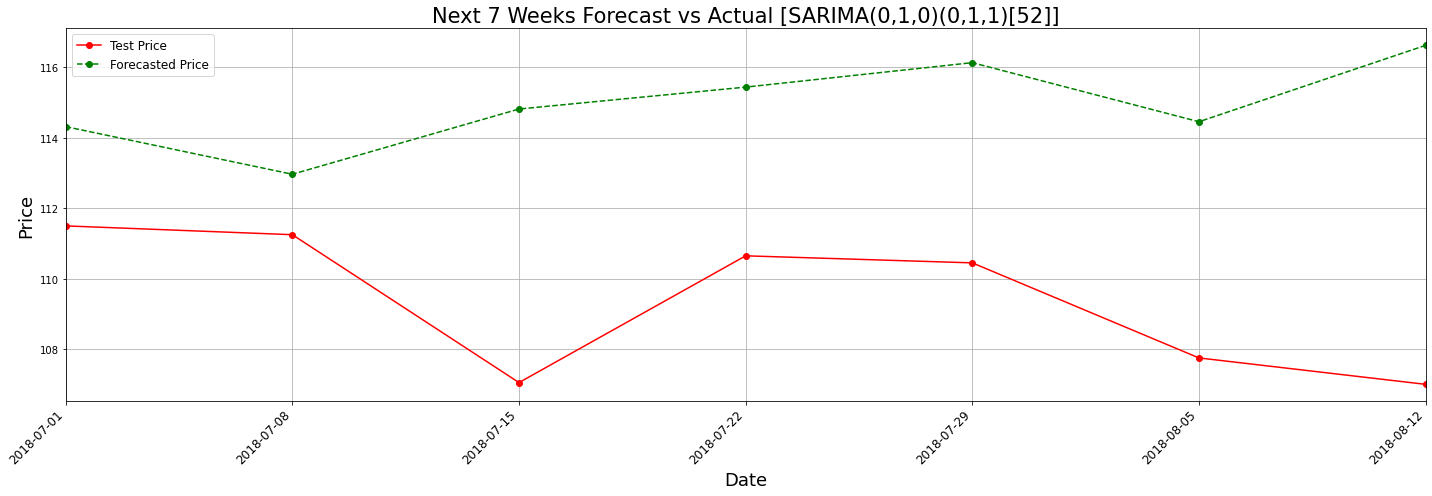

In [145]:
# Setting the 'Date' column as the index of forecast_weekly_arima_df
forecast_weekly_arima_df.index = date_weekly_arima_df["Date"]

dates_for_testing_weekly_weekly_arima_array = np.array(pd.date_range(start="2018-06-29", periods=7))
prediction_df_array_weekly_arima = np.array(forecast_weekly_arima_df.iloc[:7, :]["predicted_mean"])
test_df_first_7_array_weekly_arima = np.array(test_weekly_arima["Adj Close"][:7])

# Plotting predicted and test data for the next 7 weeks
plt.figure(figsize=(20, 7))
ax = test_weekly_arima["Adj Close"][:7].plot(label="Test Price", color="red", linestyle="-", marker="o")
forecast_weekly_arima_df.iloc[:7, :]["predicted_mean"].plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")

# Customizing the plot
plt.xticks(rotation=45, fontsize=12)  # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 7 Weeks Forecast vs Actual [SARIMA(0,1,0)(0,1,1)[52]]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)
# Adjusting the x-ticks to show all dates
ax.set_xticks(test_weekly_arima["Adj Close"][:7].index)
ax.set_xticklabels(test_weekly_arima["Adj Close"][:7].index.strftime("%Y-%m-%d"), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("sarima7W.png")
plt.show()

In [146]:
# Converting the arrays to pandas Series because of how the rest of the code works from previous use in the other models
y_pred_first_7_weeks_weekly_arima = pd.Series(prediction_df_array_weekly_arima)
y_test_first_7_weeks_weekly_arima = pd.Series(test_df_first_7_array_weekly_arima)

# Calculating Mean Absolute Error (MAE)
mae_weekly_arima_first_7_weeks = mean_absolute_error(y_test_first_7_weeks_weekly_arima, y_pred_first_7_weeks_weekly_arima)

# Calculating Mean Squared Error (MSE)
mse_weekly_arima_first_7_weeks = mean_squared_error(y_test_first_7_weeks_weekly_arima, y_pred_first_7_weeks_weekly_arima)

# Calculating Root Mean Squared Error (RMSE)
rmse_weekly_arima_first_7_weeks = np.sqrt(mse_weekly_arima_first_7_weeks)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_7_weeks_weekly_arima = y_test_first_7_weeks_weekly_arima != 0
mape_weekly_arima_first_7_weeks = np.mean(np.abs((y_test_first_7_weeks_weekly_arima[non_zero_actuals_first_7_weeks_weekly_arima] -
                                        y_pred_first_7_weeks_weekly_arima[non_zero_actuals_first_7_weeks_weekly_arima]) / 
                                        y_test_first_7_weeks_weekly_arima[non_zero_actuals_first_7_weeks_weekly_arima])) * 100

# Printing the error terms
print(f"Mean Absolute Error (MAE) for first 7 weeks: {mae_weekly_arima_first_7_weeks}")
print(f"Mean Squared Error (MSE) for first 7 weeks: {mse_weekly_arima_first_7_weeks}")
print(f"Root Mean Squared Error (RMSE) for first 7 weeks: {rmse_weekly_arima_first_7_weeks}")
print(f"Mean Absolute percentage Error (MAPE) for first 7 weeks: {mape_weekly_arima_first_7_weeks}")

Mean Absolute Error (MAE) for first 7 weeks: 5.588514038166276
Mean Squared Error (MSE) for first 7 weeks: 37.75004853128768
Root Mean Squared Error (RMSE) for first 7 weeks: 6.144106813141165
Mean Absolute percentage Error (MAPE) for first 7 weeks: 5.147427332140052


**31 weeks prediction metrics**

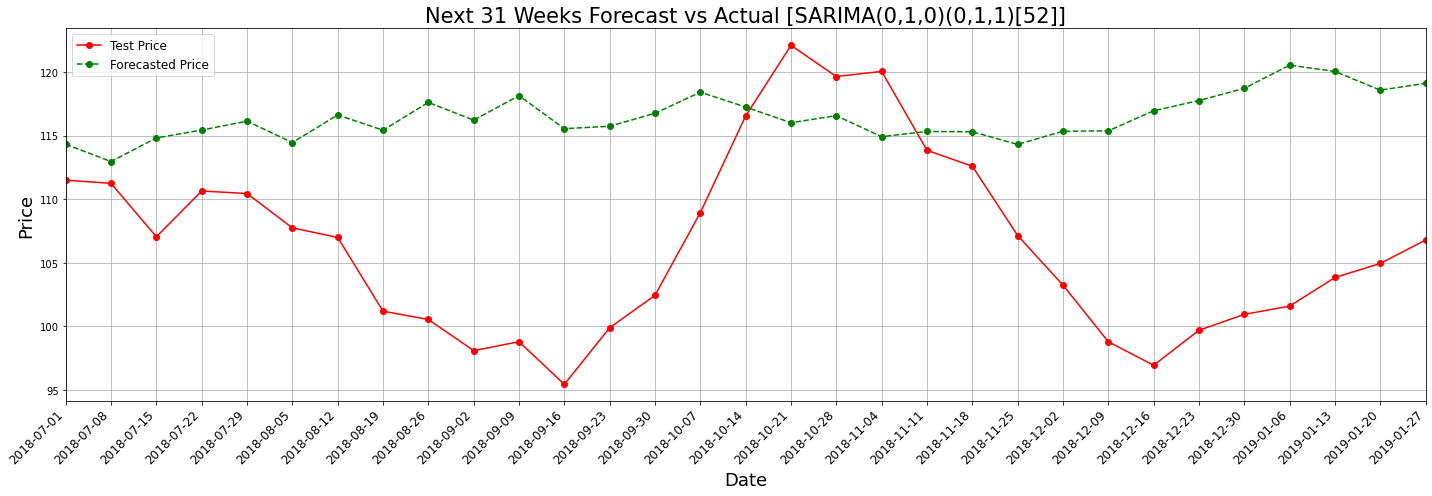

In [147]:
# Forecasting next 31 weeks and calculating errors
# Setting the 'Date' column as the index of forecast_weekly_arima_df
forecast_weekly_arima_df.index = date_weekly_arima_df['Date']

dates_for_testing_weekly_weekly_arima_array = np.array(pd.date_range(start="2018-06-29", periods=31))
prediction_df_array_weekly_arima = np.array(forecast_weekly_arima_df.iloc[:31, :]["predicted_mean"])
test_df_first_31_array_weekly_arima = np.array(test_weekly_arima["Adj Close"][:31])

# Plotting predicted and test data for the next 7 days
plt.figure(figsize=(20, 7))
ax = test_weekly_arima["Adj Close"][:31].plot(label="Test Price", color="red", linestyle="-", marker="o")
forecast_weekly_arima_df.iloc[:31, :]["predicted_mean"].plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")

# Customizing the plot
plt.xticks(rotation=45, fontsize=12)  # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 31 Weeks Forecast vs Actual [SARIMA(0,1,0)(0,1,1)[52]]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)
# Adjusting the x-ticks to show all dates
ax.set_xticks(test_weekly_arima["Adj Close"][:31].index)
ax.set_xticklabels(test_weekly_arima["Adj Close"][:31].index.strftime("%Y-%m-%d"), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("sarima31W.png")
plt.show()


In [148]:
# Converting the arrays to pandas Series because of how the rest of the code works from previous use in the other models
y_pred_first_31_weeks_weekly_arima = pd.Series(prediction_df_array_weekly_arima)
y_test_first_31_weeks_weekly_arima = pd.Series(test_df_first_31_array_weekly_arima)

# Calculating Mean Absolute Error (MAE)
mae_weekly_arima_first_31_weeks = mean_absolute_error(y_test_first_31_weeks_weekly_arima, y_pred_first_31_weeks_weekly_arima)

# Calculating Mean Squared Error (MSE)
mse_weekly_arima_first_31_weeks = mean_squared_error(y_test_first_31_weeks_weekly_arima, y_pred_first_31_weeks_weekly_arima)

# Calculating Root Mean Squared Error (RMSE)
rmse_weekly_arima_first_31_weeks = np.sqrt(mse_weekly_arima_first_31_weeks)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_31_weeks_weekly_arima = y_test_first_31_weeks_weekly_arima != 0
mape_weekly_arima_first_31_weeks = np.mean(np.abs((y_test_first_31_weeks_weekly_arima[non_zero_actuals_first_31_weeks_weekly_arima] -
                                        y_pred_first_31_weeks_weekly_arima[non_zero_actuals_first_31_weeks_weekly_arima]) / 
                                        y_test_first_31_weeks_weekly_arima[non_zero_actuals_first_31_weeks_weekly_arima])) * 100

# Printing the error terms
print(f"Mean Absolute Error (MAE) for first 31 weeks: {mae_weekly_arima_first_31_weeks}")
print(f"Mean Squared Error (MSE) for first 31 weeks: {mse_weekly_arima_first_31_weeks}")
print(f"Root Mean Squared Error (RMSE) for first 31 weeks: {rmse_weekly_arima_first_31_weeks}")
print(f"Mean Absolute percentage Error (MAPE) for first 31 weeks: {mape_weekly_arima_first_31_weeks}")

Mean Absolute Error (MAE) for first 31 weeks: 10.952579860086479
Mean Squared Error (MSE) for first 31 weeks: 160.18750776554484
Root Mean Squared Error (RMSE) for first 31 weeks: 12.656520365627546
Mean Absolute percentage Error (MAPE) for first 31 weeks: 10.680907610374573


## Monthly Data:

### Stationarity

**Checking for Heteroskedasticity/Non-costant variance and possible transformation:**

In [149]:
# Finding the ideal lambda for Personr and MLE
ideal_lambda_monthly = boxcox_normmax(adj_monthly_prices_date_index["Adj Close"], method="all")
ideal_lambda_monthly

array([0.30343073, 0.27549314])

In [150]:
# Performing Box-Cox transformation using the selected lambda value (minimising MLE)
monthly_transformed_data = boxcox(adj_monthly_prices_date_index["Adj Close"], lmbda=ideal_lambda_monthly[0])
monthly_transformed_data

array([10.46608209, 10.02944191, 10.1812439 ,  9.84020076,  9.74318583,
        9.38533063,  9.45741623,  8.89453664,  9.30079142,  8.88956946,
        8.51899299,  8.43020725,  8.33155582,  8.3398504 ,  8.13691297,
        8.22529575,  7.95229924,  7.88918806,  7.63137683,  7.53791963,
        7.39248524,  7.08715875,  6.99288603,  7.24929139,  7.17246851,
        7.14775155,  7.95528426,  7.55092052,  7.62818467,  7.27002152,
        7.29065869,  7.60256945,  7.79141737,  8.45187251,  8.48688477,
        8.13115685,  8.41661946,  7.93435034,  8.04107162,  8.57470543,
        8.02344456,  8.05571277,  8.31492599,  8.20263647,  8.28429513,
        8.04107162,  7.98800062,  8.3975352 ,  8.94395562,  8.92177401,
        8.85716833,  8.51632518,  9.41698381,  8.82456766,  8.47882616,
        8.62982399,  9.27077688,  8.88956946,  9.80453918, 10.18321539,
       10.24595264, 10.76130715, 11.0155231 , 10.97243085, 10.73260155,
       10.21858744, 10.15951522,  9.94176485,  9.76229731,  9.89

In [151]:
# Reformatting the data for future use
monthly_transformed_data_df = pd.DataFrame(monthly_transformed_data, columns=["Transformed Prices"]) # Turning into dataframe ad giving column name
monthly_transformed_data_df.index = adj_monthly_prices_date_index.index # Making so that the index is the same as adj_daily_prices_date_index index
monthly_transformed_data_df

Transformed Prices
Date                          
2000-01-31           10.466082
2000-02-29           10.029442
2000-03-31           10.181244
2000-04-30            9.840201
2000-05-31            9.743186
...                        ...
2022-10-31           12.573909
2022-11-30           12.297443
2022-12-31           12.286148
2023-01-31           12.682796
2023-02-28           12.579327

[278 rows x 1 columns]

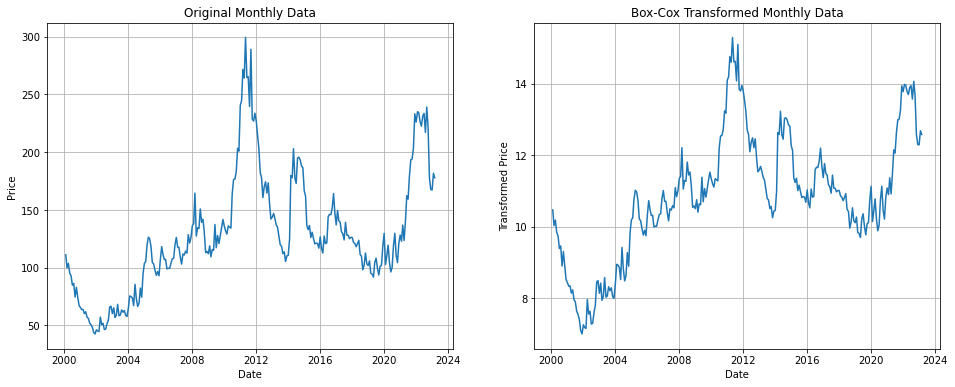

In [152]:
# Plotting the original and transformed data
plt.figure(figsize=(16, 6)) # Re-sizing
plt.subplot(1, 2, 1)

# Original data plot
plt.plot(adj_monthly_prices_date_index)
plt.title("Original Monthly Data")
plt.ylabel("Price")
plt.xlabel("Date")
plt.grid()

# Transformed data  plots
plt.subplot(1, 2, 2)
plt.plot(monthly_transformed_data_df)
plt.title("Box-Cox Transformed Monthly Data")
plt.ylabel("Transformed Price")
plt.xlabel("Date")
plt.grid()
plt.show()

**ACF and PACF plots, and Augmented Dickey-Fuller test:**

Non-tranformed data:

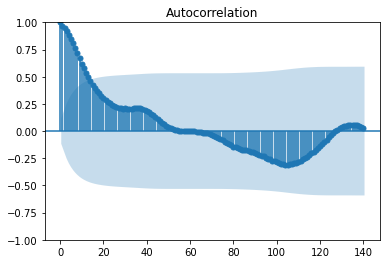

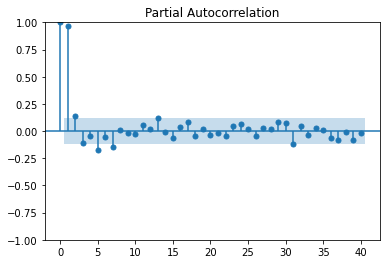

In [153]:
# Quickly visualise ACF and PACF for non-transformed data
acf_adj_monthly_prices_date_index = plot_acf(adj_monthly_prices_date_index, lags=140)
pacf_adj_weekly_prices_date_index = plot_pacf(adj_monthly_prices_date_index, lags=40)

Tranformed data:

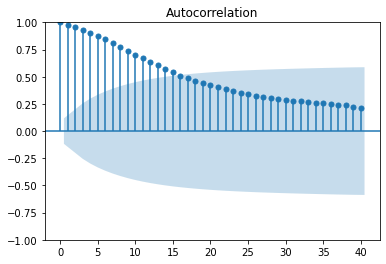

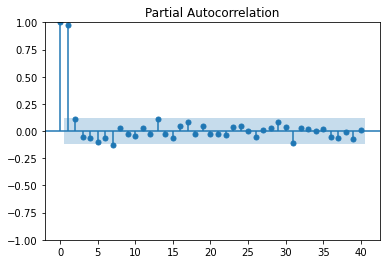

In [154]:
# Quickly visualise ACF and PACF for transformed data - weekly
acf_transformed_monthly_prices = plot_acf(monthly_transformed_data_df, lags=40)
pacf_transformed_monthly_prices = plot_pacf(monthly_transformed_data_df, lags=40)

In [155]:
# ADF test - monthly data
print(f"The p-value for the non-transformed monthly data is: {adf(adj_monthly_prices_date_index)[1]}")
print(f"The p-value for the transformed monthly data is: {adf(monthly_transformed_data_df)[1]}")

The p-value for the non-transformed monthly data is: 0.16162057891451637
The p-value for the transformed monthly data is: 0.5436224364472536


**Ljung-Box Test:**

In [156]:
# Performing the test to get the p-values and test statistics
from statsmodels.tsa.stattools import q_stat, acf
monthly_transformed_lb_stat, monthly_transformed_lb_p_value = q_stat(acf(monthly_transformed_data_df["Transformed Prices"], nlags=52),
                                               nobs=len(monthly_transformed_data_df))

white_noise_checker(adj_monthly_prices_date_index, "Adj Close", 12)
    

The data is not likely to be white noise.


**Applying differencing**:

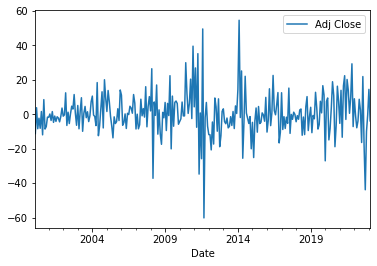

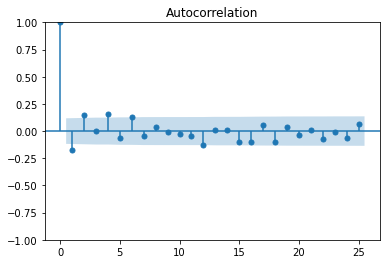

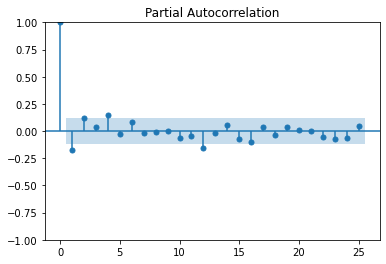

In [157]:
## First, will difference the non-transformed data.
# Applying first difference
adj_monthly_prices_date_index_diff1 = adj_monthly_prices_date_index.diff().dropna() # Dropping potential na values
adj_monthly_prices_date_index_diff1.plot()

# Plotting the ACF and PACF
adj_monthly_prices_date_index_diff1_acf = plot_acf(adj_monthly_prices_date_index_diff1)
adj_monthly_prices_date_index_diff1_pacf = plot_pacf(adj_monthly_prices_date_index_diff1)

In [158]:
# ADF test
print(f"The p-value is: {adf(adj_monthly_prices_date_index_diff1)[1]}")

The p-value is: 3.764023716832297e-09


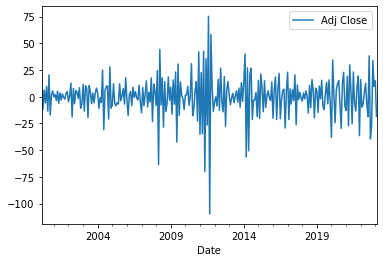

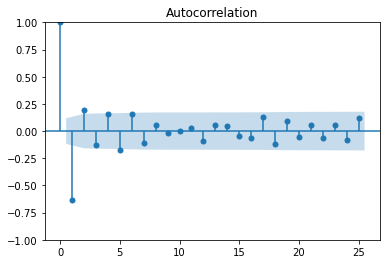

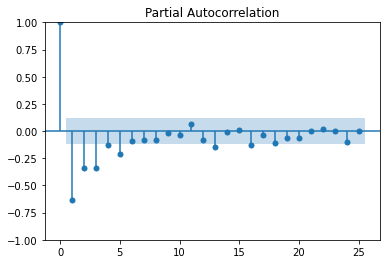

In [159]:
## Applying second differencing.

# Applying second difference
adj_monthly_prices_date_index_diff2 = adj_monthly_prices_date_index_diff1.diff().dropna()
adj_monthly_prices_date_index_diff2.plot()

# Plotting the ACF and PACF
adj_weekly_prices_date_index_diff2_acf = plot_acf(adj_monthly_prices_date_index_diff2)
adj_weekly_prices_date_index_diff2_pacf = plot_pacf(adj_monthly_prices_date_index_diff2)

In [160]:
# ADF test
print(f"The p-value is: {adf(adj_monthly_prices_date_index_diff2)[1]}")

The p-value is: 7.673805923327071e-24


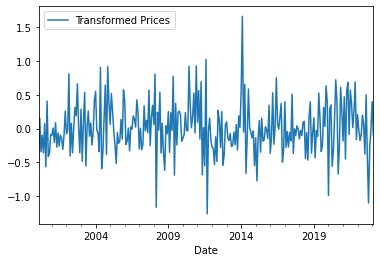

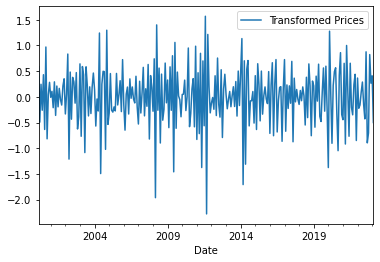

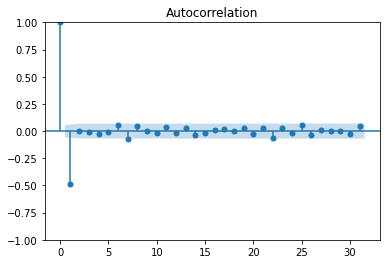

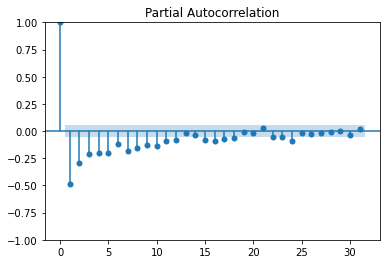

In [161]:
## Now, differencing transformed data.

# Applying first differencing
monthly_transformed_data_df_diff1 = monthly_transformed_data_df.diff().dropna()
monthly_transformed_data_df_diff1.plot()

## Applying second differencing to transformed data.

# Differencing a second time 
monthly_transformed_data_df_diff2 = monthly_transformed_data_df_diff1.diff().dropna()
monthly_transformed_data_df_diff2.plot()

# Plotting acf and pacf
monthly_transformed_data_df_diff2_acf = plot_acf(weekly_transformed_data_df_diff2)
monthly_transformed_data_df_diff2_pacf = plot_pacf(weekly_transformed_data_df_diff2)


**Model Selection**:

**7 months prediction metrics**

In [162]:
# Getting the right data
adj_monthly_prices_df_test = saved_coffe_data_daily[["Date","Adj Close"]]
adj_monthly_prices_df_test = adj_daily_prices_df_test.resample("M").last()
adj_monthly_prices_df_test

Adj Close  Adj Close diff  Month index
Date                                               
2000-01-31  111.099998       -7.849998            1
2000-02-29   99.900002       -8.849998            2
2000-03-31  103.699997        0.699997            3
2000-04-30   95.300003       -1.250000            4
2000-05-31   93.000000        1.199997            5
...                ...             ...          ...
2022-10-31  177.699997      -24.449997           10
2022-11-30  167.699997       -2.400009           11
2022-12-31  167.300003        0.150009           12
2023-01-31  181.750000       32.350006            1
2023-02-28  177.899994       26.799988            2

[278 rows x 3 columns]

In [163]:
# Oberserving if the data type is correct and presence of null vlaues
adj_monthly_prices_df_test["Adj Close diff"] = adj_monthly_prices_df_test["Adj Close"].diff(periods=12)
adj_monthly_prices_df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 278 entries, 2000-01-31 to 2023-02-28
Freq: M
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Adj Close       278 non-null    float64
 1   Adj Close diff  266 non-null    float64
 2   Month index     278 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 7.6 KB


In [164]:
# Looking at the data
adj_monthly_prices_df_test

Adj Close  Adj Close diff  Month index
Date                                               
2000-01-31  111.099998             NaN            1
2000-02-29   99.900002             NaN            2
2000-03-31  103.699997             NaN            3
2000-04-30   95.300003             NaN            4
2000-05-31   93.000000             NaN            5
...                ...             ...          ...
2022-10-31  177.699997      -26.250000           10
2022-11-30  167.699997      -65.550003           11
2022-12-31  167.300003      -58.800003           12
2023-01-31  181.750000      -53.350006            1
2023-02-28  177.899994      -56.350006            2

[278 rows x 3 columns]

In [165]:
# Creating differenced data (THIS WILL BE ONLY NECESSARY IF I WILL USE SARIMAX, ANY EXOGENOUS VARIABLES - UNLIKELY)
adj_monthly_prices_df_test["Adj Close diff"].fillna(method="backfill", inplace=True)
adj_monthly_prices_df_test

Adj Close  Adj Close diff  Month index
Date                                               
2000-01-31  111.099998      -47.349998            1
2000-02-29   99.900002      -47.349998            2
2000-03-31  103.699997      -47.349998            3
2000-04-30   95.300003      -47.349998            4
2000-05-31   93.000000      -47.349998            5
...                ...             ...          ...
2022-10-31  177.699997      -26.250000           10
2022-11-30  167.699997      -65.550003           11
2022-12-31  167.300003      -58.800003           12
2023-01-31  181.750000      -53.350006            1
2023-02-28  177.899994      -56.350006            2

[278 rows x 3 columns]

In [166]:
# Further adjusting the data frame
adj_monthly_prices_df_test_for_train_test = adj_monthly_prices_df_test["Adj Close"]
adj_monthly_prices_df_test_for_train_test = pd.DataFrame(adj_monthly_prices_df_test_for_train_test)

# Adding the month index [AGAIN ONLY NEED TO BE USED IF i WILL USE ANY EXOGENOUS VARIABLES]
adj_monthly_prices_df_test["Month index"] = adj_monthly_prices_df_test.index.month
adj_monthly_prices_df_test

Adj Close  Adj Close diff  Month index
Date                                               
2000-01-31  111.099998      -47.349998            1
2000-02-29   99.900002      -47.349998            2
2000-03-31  103.699997      -47.349998            3
2000-04-30   95.300003      -47.349998            4
2000-05-31   93.000000      -47.349998            5
...                ...             ...          ...
2022-10-31  177.699997      -26.250000           10
2022-11-30  167.699997      -65.550003           11
2022-12-31  167.300003      -58.800003           12
2023-01-31  181.750000      -53.350006            1
2023-02-28  177.899994      -56.350006            2

[278 rows x 3 columns]

In [167]:
### 
# Read for the future: When running the monthly data as done previosuly for daily data I ran into memory issues
# This led to the jupyter Notebook to crash.
# To solve this I had to explore better ways to manage my memory to behave it like this
# The goal was to split the data into smaller pieces/chunks and then fit SARIMA model to make it more manageable.
# The model would choose the ideal/"best" model and give the information
# Then, I would use the best model given by pdarima to implement it myself with another library and get the forecasts
# Some resources to look in the future: 
# https://docs.python.org/3/library/gc.html
# https://www.3ritechnologies.com/garbage-collection-in-python/ ; https://devguide.python.org/internals/garbage-collector/
# https://stackify.com/python-garbage-collection/ ; 
###

# Creating train test split, fitting the model
# Importing the library pdarima for the autoarima
import pmdarima as pm 
train_monthly_arima = adj_monthly_prices_df_test_for_train_test.iloc[:-int(len(adj_monthly_prices_df_test_for_train_test) * 0.2)]
test_monthly_arima = adj_monthly_prices_df_test_for_train_test.iloc[-int(len(adj_monthly_prices_df_test_for_train_test) * 0.2):]

# Defining the "chunk" size for dividing the dataset and importing Garbage Collector
import gc
data_chunk_size = 100

# Calculating the number of chunks based on the dataset size
num_chunks = len(train_monthly_arima) // data_chunk_size

# List to store fitted SARIMA models for each chunk and then will choose the best one
SARIMAX_models = []

# Looping over each chunk of the dataset
for iteration in range(num_chunks):
    # Determining the start and end indices for the current chunk
    start_indx = iteration * data_chunk_size
    end_indx = (iteration + 1) * data_chunk_size
    
    # Extracting the current chunk of training data
    train_chunk = train_monthly_arima["Adj Close"].iloc[start_indx:end_indx]

    # Fit SARIMA model to the current chunk of data
    # ALSO NEED TO KEEP IN MIND THAT I HAD TO MINIMISE THE "MAXIMUM PARAMETERS" BELOW SO THAT IT DOES NOT RUN FOREVER
    # DONE TO MAINTAIN SOME COMPUTATIONAL EFFICIENCY IN EXCHANGE FOR (QUITE A BIT) OF ACCURACY
    model_chunk = pm.auto_arima(train_chunk,
                                start_p=1, start_q=1, max_p=3, max_q=3, # Starting value of AR, MA, upper number of AR, upper number of MA
                                m=24, seasonal=True, d=None, D=1, # Number of periods, if the model incldes seasonal component, order of differencing (None means dones automatically), order of differencing
                                trace=False, error_action="ignore", # second one will ignore the errors
                                suppress_warnings=True, stepwise=True, # Supressing warnings, stepwise find the best model and by setting TRUE it skips some
                                approximation=True, n_jobs=-1)  # will give an approximation likelihood est methods, speeding the computation using all processors

    # Appending  the fitted model to the list
    SARIMAX_models.append(model_chunk)

    # Cleaning up memory by deleting the current model and performing garbage collection technique
    del model_chunk
    gc.collect()

# Choosing the best model
best_model = SARIMAX_models[0]
# Printing summary of the best model
best_model.summary()

C:\Users\rafiu\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
C:\Users\rafiu\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 24)   Log Likelihood                -278.156
Date:                            Thu, 18 Jul 2024   AIC                            564.311
Time:                                    16:44:32   BIC                            573.581
Sample:                                01-31-2000   HQIC                           568.013
                                     - 04-30-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0506      1.222      1.679      0.093      -0.344       4.445
ar.L1         -0.2966      0.098     -3.023      0.003      -0.489      -0.104
ar.S.L24      -0.4822      0.129     -3.746      0.000      -0.735      -0.230
sigma2        89.4545     15.647      5.717      0.000      58.788     120.121
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.42
Prob(Q):                              1.00   Prob(JB):                         0.81
Heteroskedasticity (H):               3.21   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [168]:
# Fitting the model suggested by auto_arima using  statsmodels.tsa.arima.model library
from statsmodels.tsa.arima.model import ARIMA
model_monthly_arima = ARIMA(train_monthly_arima["Adj Close"], order=(1,1,0), seasonal_order=(1,1,0,24)).fit()
forecast_monthly_arima = model_monthly_arima.forecast(len(test_monthly_arima))

# Creating the data frame and visualising
forecast_monthly_arima_df = pd.DataFrame(forecast_monthly_arima)
forecast_monthly_arima_df.head(10)

predicted_mean
2018-08-31      113.010560
2018-09-30      114.188001
2018-10-31      118.422044
2018-11-30      108.994890
2018-12-31       93.999729
2019-01-31       98.341633
2019-02-28       81.762321
2019-03-31       79.200419
2019-04-30       76.593577
2019-05-31       70.767920

In [169]:
# Creating the data frame and visualising by perorming the necessary data manipulation
forecast_monthly_arima_df = pd.DataFrame(forecast_monthly_arima)
forecast_monthly_arima_df

# Getting the index
test_monthly_arima.index

date_monthly_arima = test_monthly_arima.index
date_monthly_arima_df = pd.DataFrame(date_monthly_arima)
# Converting the "Date" column to datetime format
date_monthly_arima_df["Date"] = pd.to_datetime(date_monthly_arima_df["Date"])

# Setting the 'Date' column as the index of forecast_monthly_arima_df
forecast_monthly_arima_df.index = date_monthly_arima_df["Date"]

dates_for_testing_monthly_monthly_arima_array = np.array(pd.date_range(start="2018-06-29", periods=7))
prediction_df_array_monthly_arima = np.array(forecast_monthly_arima_df.iloc[:7, :]["predicted_mean"])
test_df_first_7_array_monthly_arima = np.array(test_monthly_arima["Adj Close"][:7])

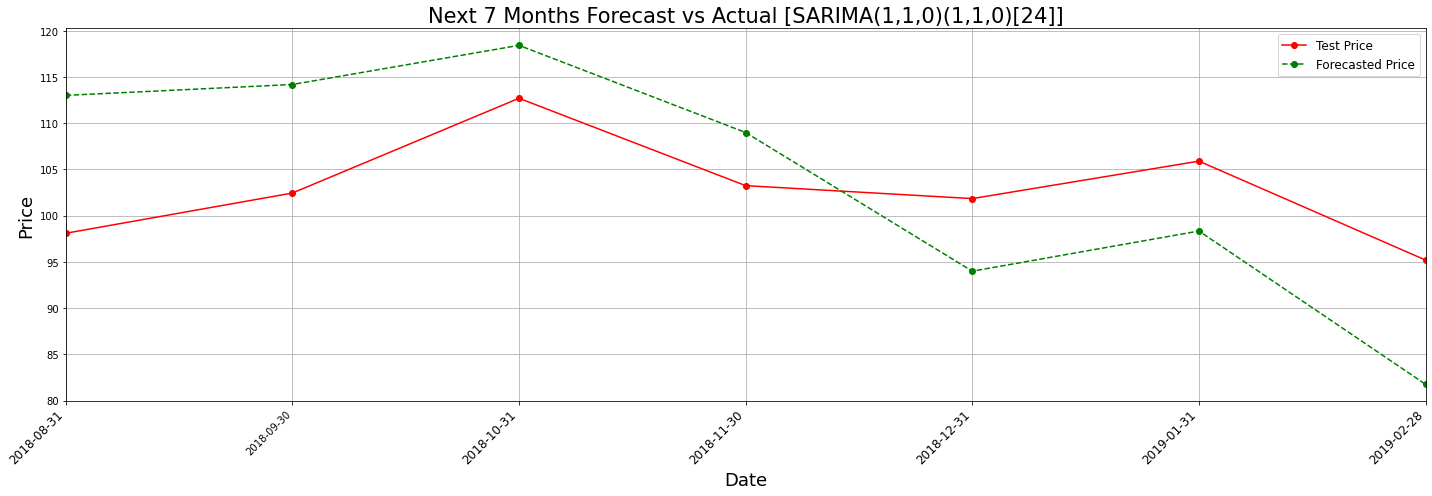

In [170]:
# Plotting predicted and test data for the next 7 months
plt.figure(figsize=(20, 7))
ax = test_monthly_arima["Adj Close"][:7].plot(label="Test Price", color="red", linestyle="-", marker="o")
forecast_monthly_arima_df.iloc[:7, :]["predicted_mean"].plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")

# Customizing the plot
plt.xticks(rotation=45, fontsize=12)  # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 7 Months Forecast vs Actual [SARIMA(1,1,0)(1,1,0)[24]]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)
# Adjusting the x-ticks to show all dates
ax.set_xticks(test_monthly_arima["Adj Close"][:7].index)
ax.set_xticklabels(test_monthly_arima["Adj Close"][:7].index.strftime("%Y-%m-%d"), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("sarima7M.png")
plt.show()

In [171]:
# Converting the arrays to pandas Series because of how the rest of the code works from previous use in the other models
y_pred_first_7_months_monthly_arima = pd.Series(prediction_df_array_monthly_arima)
y_test_first_7_months_monthly_arima = pd.Series(test_df_first_7_array_monthly_arima)

# Calculating Mean Absolute Error (MAE)
mae_monthly_arima_first_7_months = mean_absolute_error(y_test_first_7_months_monthly_arima, y_pred_first_7_months_monthly_arima)

# Calculating Mean Squared Error (MSE)
mse_monthly_arima_first_7_months = mean_squared_error(y_test_first_7_months_monthly_arima, y_pred_first_7_months_monthly_arima)

# Calculating Root Mean Squared Error (RMSE)
rmse_monthly_arima_first_7_months = np.sqrt(mse_monthly_arima_first_7_months)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_7_months_monthly_arima = y_test_first_7_months_monthly_arima != 0
mape_monthly_arima_first_7_months = np.mean(np.abs((y_test_first_7_months_monthly_arima[non_zero_actuals_first_7_months_monthly_arima] -
                                        y_pred_first_7_months_monthly_arima[non_zero_actuals_first_7_months_monthly_arima]) / 
                                        y_test_first_7_months_monthly_arima[non_zero_actuals_first_7_months_monthly_arima])) * 100

# Printing the error terms
print(f"Mean Absolute Error (MAE) for first 7 months: {mae_monthly_arima_first_7_months}")
print(f"Mean Squared Error (MSE) for first 7 months: {mse_monthly_arima_first_7_months}")
print(f"Root Mean Squared Error (RMSE) for first 31 months: {rmse_monthly_arima_first_7_months}")
print(f"Mean Absolute percentage Error (MAPE) for first 31 months: {mape_monthly_arima_first_7_months}")

Mean Absolute Error (MAE) for first 7 months: 9.56597377734138
Mean Squared Error (MSE) for first 7 months: 103.59685206577083
Root Mean Squared Error (RMSE) for first 31 months: 10.178253880984244
Mean Absolute percentage Error (MAPE) for first 31 months: 9.465442752095687


**31 months prediction metrics**

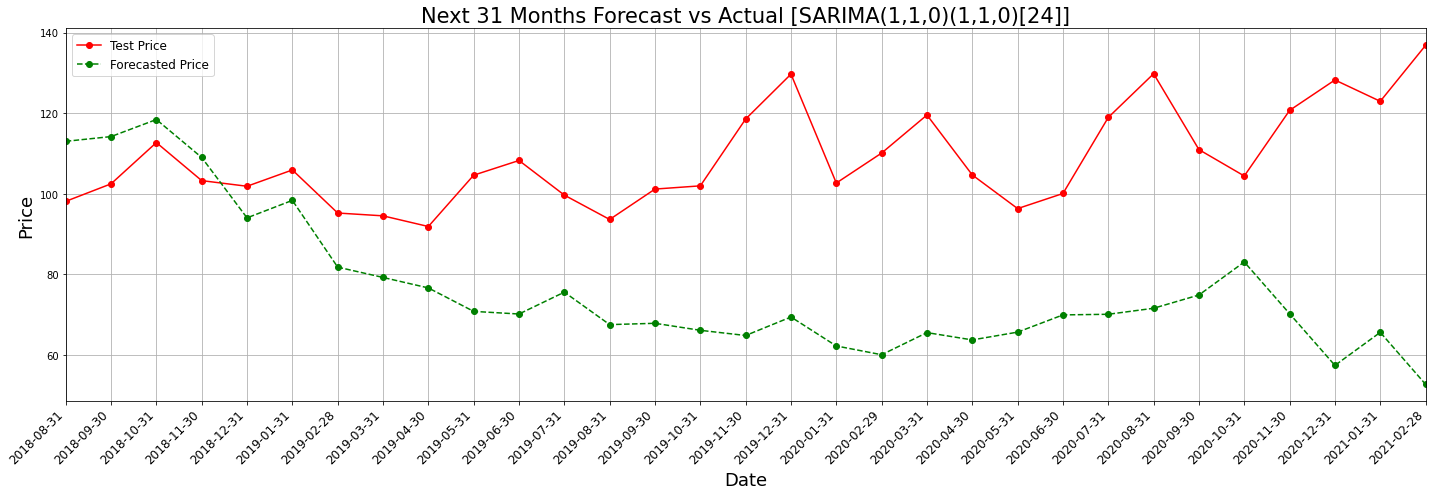

In [172]:
# Forecasting next 31 months and calculating errors
# Setting the 'Date' column as the index of forecast_monthly_arima_df
forecast_monthly_arima_df.index = date_monthly_arima_df["Date"]

dates_for_testing_monthly_monthly_arima_array = np.array(pd.date_range(start="2018-06-29", periods=31))
prediction_df_array_monthly_arima = np.array(forecast_monthly_arima_df.iloc[:31, :]["predicted_mean"])
test_df_first_31_array_monthly_arima = np.array(test_monthly_arima["Adj Close"][:31])

# Plotting predicted and test data for the next 7 days
plt.figure(figsize=(20, 7))
ax = test_monthly_arima["Adj Close"][:31].plot(label="Test Price", color="red", linestyle="-", marker="o")
forecast_monthly_arima_df.iloc[:31, :]["predicted_mean"].plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")

# Customizing the plot
plt.xticks(rotation=45, fontsize=12)  # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 31 Months Forecast vs Actual [SARIMA(1,1,0)(1,1,0)[24]]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)
# Adjusting the x-ticks to show all dates
ax.set_xticks(test_monthly_arima["Adj Close"][:31].index)
ax.set_xticklabels(test_monthly_arima["Adj Close"][:31].index.strftime("%Y-%m-%d"), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("sarima31M.png")
plt.show()


In [173]:
# Converting the arrays to pandas Series because of how the rest of the code works from previous use in the other models
y_pred_first_31_months_monthly_arima = pd.Series(prediction_df_array_monthly_arima)
y_test_first_31_months_monthly_arima = pd.Series(test_df_first_31_array_monthly_arima)

# Calculating Mean Absolute Error (MAE)
mae_monthly_arima_first_31_months = mean_absolute_error(y_test_first_31_months_monthly_arima, y_pred_first_31_months_monthly_arima)

# Calculating Mean Squared Error (MSE)
mse_monthly_arima_first_31_months = mean_squared_error(y_test_first_31_months_monthly_arima, y_pred_first_31_months_monthly_arima)

# Calculating Root Mean Squared Error (RMSE)
rmse_monthly_arima_first_31_months = np.sqrt(mse_monthly_arima_first_31_months)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_31_months_monthly_arima = y_test_first_31_months_monthly_arima != 0
mape_monthly_arima_first_31_months = np.mean(np.abs((y_test_first_31_months_monthly_arima[non_zero_actuals_first_31_months_monthly_arima] -
                                        y_pred_first_31_months_monthly_arima[non_zero_actuals_first_31_months_monthly_arima]) / 
                                        y_test_first_31_months_monthly_arima[non_zero_actuals_first_31_months_monthly_arima])) * 100

# Printing the error terms
print(f"Mean Absolute Error (MAE) for first 31 months: {mae_monthly_arima_first_31_months}")
print(f"Mean Squared Error (MSE) for first 31 months: {mse_monthly_arima_first_31_months}")
print(f"Root Mean Squared Error (RMSE) for first 31 months: {rmse_monthly_arima_first_31_months}")
print(f"Mean Absolute percentage Error (MAPE) for first 31 months: {mape_monthly_arima_first_31_months}")

Mean Absolute Error (MAE) for first 31 months: 34.744928688344764
Mean Squared Error (MSE) for first 31 months: 1615.8148075150682
Root Mean Squared Error (RMSE) for first 31 months: 40.19719900086408
Mean Absolute percentage Error (MAPE) for first 31 months: 30.78658689834463


#### Metrics table:

In [174]:
# Creating a table for the frequency 7
table_frequency_7_arima = {
    "Model": ["SARIMA 7 days", "SARIMA 7 Weeks", "SARIMA 7 Months"],
    "MAE": [mae_daily_arima_first_7_days, mae_weekly_arima_first_7_weeks, mae_monthly_arima_first_7_months],
    "MSE": [mse_daily_arima_first_7_days, mse_weekly_arima_first_7_weeks, mse_monthly_arima_first_7_months],
    "RMSE": [rmse_daily_arima_first_7_days, rmse_weekly_arima_first_7_weeks, rmse_monthly_arima_first_7_months],
    "MAPE": [mape_daily_arima_first_7_days, mape_weekly_arima_first_7_weeks, mape_monthly_arima_first_7_months]
}

# Creating the DataFrame
table_frequency_7_arima_df = pd.DataFrame(table_frequency_7_arima)

# Displaying the DataFrame
table_frequency_7_arima_df

Model       MAE         MSE       RMSE      MAPE
0    SARIMA 7 days  2.242680    9.155155   3.025749  2.077475
1   SARIMA 7 Weeks  5.588514   37.750049   6.144107  5.147427
2  SARIMA 7 Months  9.565974  103.596852  10.178254  9.465443

In [175]:
# Creating a table for the frequency 31
table_frequency_31_arima = {
    "Model": ["SARIMA 31 Days", "SARIMA 31 Weeks", "SARIMA 31 Months"],
    "MAE": [mae_daily_arima_first_31_days, mae_weekly_arima_first_31_weeks, mae_monthly_arima_first_31_months],
    "MSE": [mse_daily_arima_first_31_days, mse_weekly_arima_first_31_weeks, mse_monthly_arima_first_31_months],
    "RMSE": [rmse_daily_arima_first_31_days, rmse_weekly_arima_first_31_weeks, rmse_monthly_arima_first_31_months],
    "MAPE": [mape_daily_arima_first_31_days, mape_weekly_arima_first_31_weeks, mape_monthly_arima_first_31_months]
}

# Creating the DataFrame
table_frequency_31_arima_df = pd.DataFrame(table_frequency_31_arima)

# Displaying the DataFrame
table_frequency_31_arima_df

Model        MAE          MSE       RMSE       MAPE
0    SARIMA 31 Days   3.518952    17.014896   4.124912   3.271901
1   SARIMA 31 Weeks  10.952580   160.187508  12.656520  10.680908
2  SARIMA 31 Months  34.744929  1615.814808  40.197199  30.786587

In [176]:
# Time end SARIMA Model
time.sleep(3)  # Placeholder
model2_end = time.time()
model2_execution_time = model2_end - model2_start
print("SARIMA Model execution time: {} seconds".format(model2_execution_time))

SARIMA Model execution time: 1247.5343282222748 seconds


------

## Method 3: Random Forest Models

## Daily Data:

In [177]:
# Cleaning up the data before using it
adj_daily_prices_nodates = adj_daily_prices.drop("Date", axis=1)
daily_dates_df = pd.DataFrame(daily_dates)
daily_dates_df["Date"] = pd.to_datetime(daily_dates_df["Date"])

# Re-Creating the daily data data frame
daily_dates_df["Date"] = pd.to_datetime(daily_dates_df["Date"])

# Setting the dates as the index of adj_daily_prices_nodates
adj_daily_prices_nodates.index = daily_dates_df["Date"]

# Setting the frequency to daily
adj_daily_prices_nodates.index = pd.DatetimeIndex(adj_daily_prices_nodates.index).to_period("D")

# Renaming the DataFrame
adj_daily_prices_df = adj_daily_prices_nodates

In [178]:
# New data frame to be used
adj_daily_prices_df

Adj Close
Date                  
2000-01-03  116.500000
2000-01-04  116.250000
2000-01-05  118.599998
2000-01-06  116.849998
2000-01-07  114.150002
...                ...
2023-01-27  169.899994
2023-01-30  170.399994
2023-01-31  181.750000
2023-02-01  175.899994
2023-02-02  177.899994

[5785 rows x 1 columns]

#### Lagging method used references
1. https://www.mdpi.com/2079-9292/10/20/2518
2. https://ar5iv.labs.arxiv.org/html/2401.08070
3. https://arxiv.org/abs/2401.08070

In [179]:
# Creating lagged features
adj_daily_prices_df["price_lag1"] = adj_daily_prices_df["Adj Close"].shift(1)
adj_daily_prices_df["price_lag2"] = adj_daily_prices_df["Adj Close"].shift(2)
adj_daily_prices_df["price_lag3"] = adj_daily_prices_df["Adj Close"].shift(3)

# Dropping rows with NaN values created by the lagged features
adj_daily_prices_df.dropna(inplace=True)

In [180]:
# Visualising the data frame
adj_daily_prices_df

Adj Close  price_lag1  price_lag2  price_lag3
Date                                                      
2000-01-06  116.849998  118.599998  116.250000  116.500000
2000-01-07  114.150002  116.849998  118.599998  116.250000
2000-01-10  117.550003  114.150002  116.849998  118.599998
2000-01-11  117.800003  117.550003  114.150002  116.849998
2000-01-12  118.949997  117.800003  117.550003  114.150002
...                ...         ...         ...         ...
2023-01-27  169.899994  167.149994  162.449997  159.850006
2023-01-30  170.399994  169.899994  167.149994  162.449997
2023-01-31  181.750000  170.399994  169.899994  167.149994
2023-02-01  175.899994  181.750000  170.399994  169.899994
2023-02-02  177.899994  175.899994  181.750000  170.399994

[5782 rows x 4 columns]

#### Intial idea for Random Forest implementation is from the following source:
My code follows a similar approach to this but it is refined to my problems and to what I need to find out, I am just adapting the idea to my work so I give credit here: `https://www.youtube.com/watch?v=7AuL8C6mIdg`

In [181]:
# Creating training and teting data sequentially - splitting data into train and test
train_rf1 = adj_daily_prices_df.iloc[:-int(len(adj_daily_prices_df) * 0.2)]
test_rf1 = adj_daily_prices_df.iloc[-int(len(adj_daily_prices_df) * 0.2):] # Ensuring testing data is always after the train data

# Defining the features (X) and the target (y) for training and testing data
X_train_daily = train_rf1.drop("Adj Close", axis=1)
y_train_daily = train_rf1["Adj Close"]
X_test_daily = test_rf1.drop("Adj Close", axis=1)
y_test_daily = test_rf1["Adj Close"]

#### Random Forest - 7 days prediction

In [182]:
# Timing model 3
model3_start = time.time()

## Implementing the model

# Importing Random Forest Library
from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest Regressor
rf_model_daily = RandomForestRegressor(n_estimators=20, random_state=42)

# Training the model on the training data
rf_model_daily.fit(X_train_daily, y_train_daily)

# Making predictions on the test data
y_pred_daily = rf_model_daily.predict(X_test_daily)

In [183]:
## Errors for the first 7 days

# Selecting the first 7 days
y_test_first_7_days = y_test_daily.iloc[:7]
y_pred_first_7_days = y_pred_daily[:7]

# Calculating Mean Absolute Error (MAE)
mae_rf_first_7_days = mean_absolute_error(y_test_first_7_days, y_pred_first_7_days)

# Calculating Mean Squared Error (MSE)
mse_rf_first_7_days = mean_squared_error(y_test_first_7_days, y_pred_first_7_days)

# Calculating Root Mean Squared Error (RMSE)
rmse_rf_first_7_days = np.sqrt(mse_rf_first_7_days)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_7_days = y_test_first_7_days != 0
mape_rf_first_7_days = np.mean(np.abs((y_test_first_7_days[non_zero_actuals_first_7_days] - 
                                       y_pred_first_7_days[non_zero_actuals_first_7_days]) /
                                      y_test_first_7_days[non_zero_actuals_first_7_days])) * 100

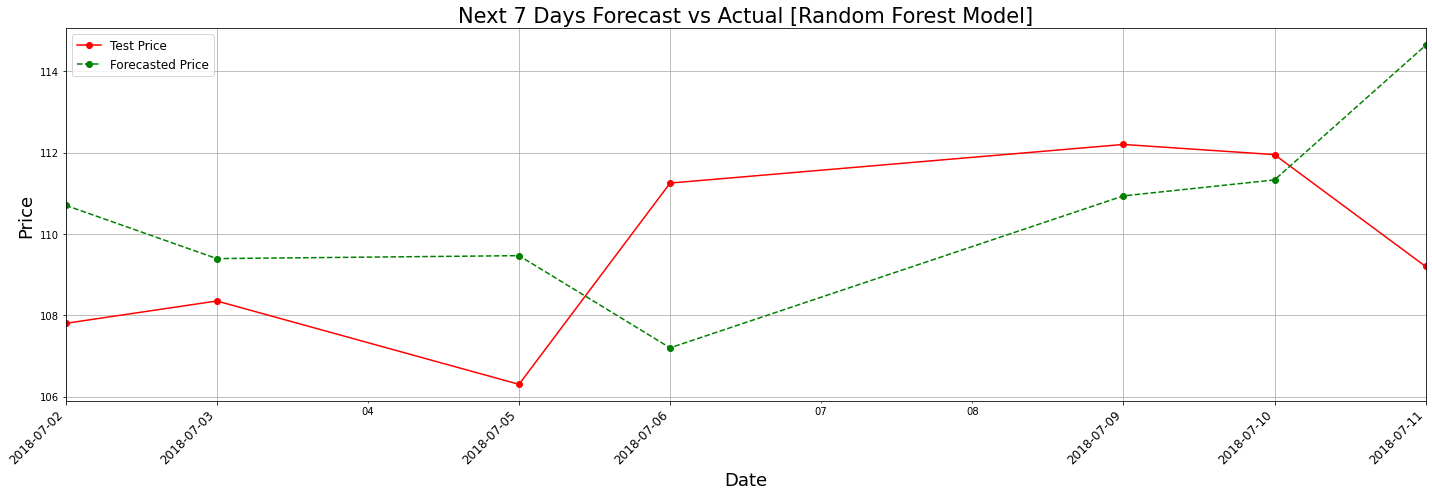

Mean Absolute Error (MAE) for first 7 days: 2.64107055664063
Mean Squared Error (MSE) for first 7 days: 9.643632024716407
Root Mean Squared Error (RMSE) for first 7 days: 3.1054197823670164
Mean Absolute Percentage Error (MAPE) for first 7 days: 2.419665372697719


In [184]:
######## This commented code below is not necessary for the project, just kept it for reference

# Converting y_pred to a DataFrame with the same index as y_test
# y_pred_df_daily = pd.DataFrame(y_pred_daily, index=y_test_daily.index, columns=["Adj Close"])
# #### Plotting train, test and predicted data in one
# plt.figure(figsize=(20, 7))
# ax = y_test_daily.plot(figsize=(16, 6), label="Test Data", color="red")
# y_pred_df_daily.plot(ax=ax, label="Forecast", linestyle="dashed", color="green")
# y_train_daily.plot(ax=ax, label="Training Data", color="blue")  # Plotting training data
# plt.xlabel("Date")
# plt.ylabel("Price")
# plt.title("Forecast vs Actual")
# plt.legend()
# plt.grid(True)
# plt.show()

#######

# Converting y_pred to a DataFrame with the same index as y_test
y_pred_df_daily = pd.DataFrame(y_pred_daily, index=y_test_daily.index, columns=["Forecasted Price"])

# # Plotting the entire test data and forecast
# plt.figure(figsize=(20, 7))
# ax = y_test_daily.plot(figsize=(18, 6), label="Test Price", color="red")
# y_pred_df_daily.plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green")
# plt.xticks(rotation=45,fontsize=12) # Rotating x-tick labels for better readability
# plt.xlabel("Date", fontsize=18)
# plt.ylabel("Price", fontsize=18)
# plt.title("Forecast vs Actual [Daily Data - Random Forest Model]", fontsize=21)
# plt.legend(fontsize=12)
# plt.grid(True)
# plt.show()


# Slicing y_test, y_pred_df, and y_train for the next 7 days
next_7_days_daily = 7
y_test_next_7_daily = y_test_daily.iloc[:next_7_days_daily]
y_pred_next_7_daily = y_pred_df_daily.iloc[:next_7_days_daily]

# Plotting predicted and test data for next 7 days
plt.figure(figsize=(20, 7))
ax = y_test_next_7_daily.plot(label="Test Price", color="red", linestyle="-", marker="o")
y_pred_next_7_daily.plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")
plt.xticks(rotation=45, fontsize=12)  # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 7 Days Forecast vs Actual [Random Forest Model]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)

# Adjusting the x-ticks to show all dates
ax.set_xticks(y_test_next_7_daily.index)
ax.set_xticklabels(y_test_next_7_daily.index.strftime("%Y-%m-%d"), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("rf7D.png")
plt.show()

print(f"Mean Absolute Error (MAE) for first 7 days: {mae_rf_first_7_days}")
print(f"Mean Squared Error (MSE) for first 7 days: {mse_rf_first_7_days}")
print(f"Root Mean Squared Error (RMSE) for first 7 days: {rmse_rf_first_7_days}")
print(f"Mean Absolute Percentage Error (MAPE) for first 7 days: {mape_rf_first_7_days:}")

#### Random Forest - 31 days prediction

In [185]:
## Errors for the first 31 days

# Selecting the first 31 days
y_test_first_31_days = y_test_daily.iloc[:31]
y_pred_first_31_days = y_pred_daily[:31]

# Calculating Mean Absolute Error (MAE)
mae_rf_first_31_days = mean_absolute_error(y_test_first_31_days, y_pred_first_31_days)

# Calculating Mean Squared Error (MSE)
mse_rf_first_31_days = mean_squared_error(y_test_first_31_days, y_pred_first_31_days)

# Calculating Root Mean Squared Error (RMSE)
rmse_rf_first_31_days = np.sqrt(mse_rf_first_31_days)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_31_days = y_test_first_31_days != 0
mape_rf_first_31_days = np.mean(np.abs((y_test_first_31_days[non_zero_actuals_first_31_days] - 
                                       y_pred_first_31_days[non_zero_actuals_first_31_days]) /
                                      y_test_first_31_days[non_zero_actuals_first_31_days])) * 100

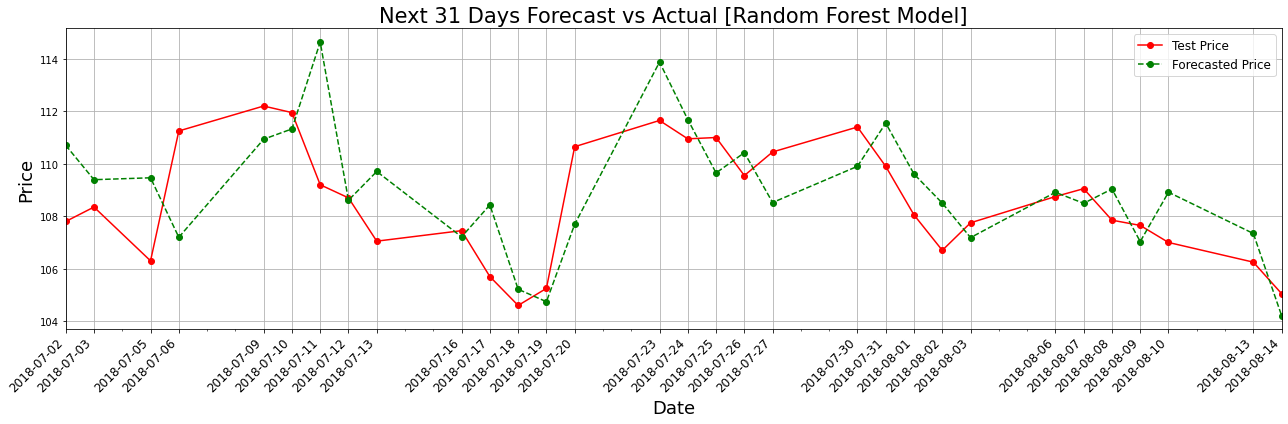

Mean Absolute Error (MAE) for first 31 days: 1.575000098443802
Mean Squared Error (MSE) for first 31 days: 3.931477154596431
Root Mean Squared Error (RMSE) for first 31 days: 1.9827952881214013
Mean Absolute Percentage Error (MAPE) for first 31 days: 1.44854562169214


In [186]:
# Slicing y_test, y_pred_df, and y_train for the next 31 days
next_31_days_daily = 31
y_test_next_31_daily = y_test_daily.iloc[:next_31_days_daily]
y_pred_next_31_daily = y_pred_df_daily.iloc[:next_31_days_daily]
y_train_next_31_daily = y_train_daily.iloc[:next_31_days_daily]

#### Plotting predicted and test data for next 31 days
# Plotting actual test data for the next 31 days
ax = y_test_next_31_daily.plot(figsize=(18, 6), label="Test Price", color="red", linestyle="-", marker="o")

# Plotting forecasted data for the next 7 days
y_pred_next_31_daily.plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")

plt.xticks(rotation=45, fontsize=12) # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 31 Days Forecast vs Actual [Random Forest Model]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)

# Adjusting the x-ticks to show all dates
ax.set_xticks(y_test_next_31_daily.index)
ax.set_xticklabels(y_test_next_31_daily.index.strftime("%Y-%m-%d"), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("rf31D.png")
plt.show()

print(f"Mean Absolute Error (MAE) for first 31 days: {mae_rf_first_31_days}")
print(f"Mean Squared Error (MSE) for first 31 days: {mse_rf_first_31_days}")
print(f"Root Mean Squared Error (RMSE) for first 31 days: {rmse_rf_first_31_days}")
print(f"Mean Absolute Percentage Error (MAPE) for first 31 days: {mape_rf_first_31_days:}")

In [187]:
## Some functions to help with future coding

# data adjsuting function
def data_adjust(data, dates_data, period,column="Date"):
    data_no_dates = data.drop(column, axis=1)
    dates_df = pd.DataFrame(dates_data)
    dates_df[column] = pd.to_datetime(dates_df[column])
    
    dates_df[column] = pd.to_datetime(dates_df[column])
    data_no_dates.index = dates_df[column]
    data_no_dates.index = pd.DatetimeIndex(data_no_dates.index).to_period(period)
    
    final_df = data_no_dates
    return final_df


# Lag function
def lag_func(data_df):
    new_data_df = data_df.copy()  # Make a copy to avoid modifying the original DataFrame
    # Creating lagged features
    new_data_df["price_lag1"] = new_data_df["Adj Close"].shift(1)
    new_data_df["price_lag2"] = new_data_df["Adj Close"].shift(2)
    new_data_df["price_lag3"] = new_data_df["Adj Close"].shift(3)

    # Dropping rows with NaN values created by the lagged features
    final_df = new_data_df.dropna()
    
    # Re-ordering columns
    final_df = final_df[["Adj Close", "price_lag1", "price_lag2", "price_lag3"]]
    return final_df

### Weekly Data:

In [188]:
# New data frame to be used
adj_weekly_prices_df = adj_weekly_prices_date_index
adj_weekly_prices_df 

Adj Close
Date                  
2000-01-09  114.150002
2000-01-16  112.550003
2000-01-23  111.199997
2000-01-30  114.699997
2000-02-06  112.900002
...                ...
2023-01-08  158.300003
2023-01-15  151.699997
2023-01-22  154.800003
2023-01-29  169.899994
2023-02-05  177.899994

[1205 rows x 1 columns]

In [189]:
# Weekly lagged features prices
adj_weekly_prices_df = lag_func(adj_weekly_prices_df)
adj_weekly_prices_df

Adj Close  price_lag1  price_lag2  price_lag3
Date                                                      
2000-01-30  114.699997  111.199997  112.550003  114.150002
2000-02-06  112.900002  114.699997  111.199997  112.550003
2000-02-13  108.800003  112.900002  114.699997  111.199997
2000-02-20  104.300003  108.800003  112.900002  114.699997
2000-02-27   98.800003  104.300003  108.800003  112.900002
...                ...         ...         ...         ...
2023-01-08  158.300003  167.300003  172.000000  164.149994
2023-01-15  151.699997  158.300003  167.300003  172.000000
2023-01-22  154.800003  151.699997  158.300003  167.300003
2023-01-29  169.899994  154.800003  151.699997  158.300003
2023-02-05  177.899994  169.899994  154.800003  151.699997

[1202 rows x 4 columns]

In [190]:
# Creating training and teting data sequentially - splitting data into train and test (WEEKLY DATA)
train_rf2 = adj_weekly_prices_df.iloc[:-int(len(adj_weekly_prices_df) * 0.2)]
test_rf2 = adj_weekly_prices_df.iloc[-int(len(adj_weekly_prices_df) * 0.2):] # Ensuring testing data is always after the train data

# Defining the features (X) and the target (y) for training and testing data
X_train_weekly = train_rf2.drop("Adj Close", axis=1)
y_train_weekly = train_rf2["Adj Close"]
X_test_weekly = test_rf2.drop("Adj Close", axis=1)
y_test_weekly = test_rf2["Adj Close"]

#### Random Forest - 7 weeks prediction

In [191]:
## Implementing the model
# Initializing the Random Forest Regressor
rf_model_weekly = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the training data
rf_model_weekly.fit(X_train_weekly, y_train_weekly)

# Making predictions on the test data
y_pred_weekly = rf_model_weekly.predict(X_test_weekly)


## Errors for the first 7 weeks
# Selecting the first 7 weeks
y_test_first_7_weeks = y_test_weekly.iloc[:7]
y_pred_first_7_weeks = y_pred_weekly[:7]

# Calculating Mean Absolute Error (MAE)
mae_rf_first_7_weeks = mean_absolute_error(y_test_first_7_weeks, y_pred_first_7_weeks)

# Calculating Mean Squared Error (MSE)
mse_rf_first_7_weeks = mean_squared_error(y_test_first_7_weeks, y_pred_first_7_weeks)

# Calculating Root Mean Squared Error (RMSE)
rmse_rf_first_7_weeks = np.sqrt(mse_rf_first_7_weeks)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_7_weeks = y_test_first_7_weeks != 0
mape_rf_first_7_weeks = np.mean(np.abs((y_test_first_7_weeks[non_zero_actuals_first_7_weeks] - 
                                       y_pred_first_7_weeks[non_zero_actuals_first_7_weeks]) /
                                      y_test_first_7_weeks[non_zero_actuals_first_7_weeks])) * 100

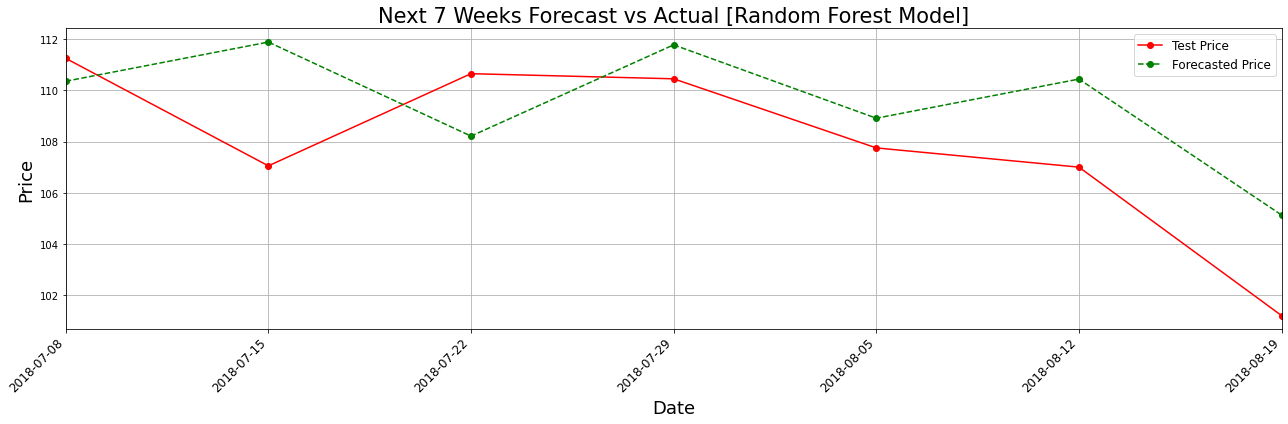

Mean Absolute Error (MAE) for first 7 weeks: 2.5745723288399835
Mean Squared Error (MSE) for first 7 weeks: 8.640866248733408
Root Mean Squared Error (RMSE) for first 7 weeks: 2.939535039548501
Mean Absolute Percentage Error (MAPE) for first 7 weeks: 2.413994463827238


In [192]:
## Plotting the values
# Converting y_pred to a DataFrame with the same index as y_test
y_pred_df_weekly = pd.DataFrame(y_pred_weekly, index=y_test_weekly.index, columns=["Forecasted Price"])

# # Plotting the entire test data and forecast
# plt.figure(figsize=(20, 7))
# ax = y_test_weekly.plot(figsize=(18, 6), label="Test Price", color="red", linestyle="-", marker="o")
# y_pred_df_weekly.plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")
# plt.xticks(rotation=45,fontsize=12) # Rotating x-tick labels for better readability
# plt.xlabel("Date", fontsize=18)
# plt.ylabel("Price", fontsize=18)
# plt.title("Forecast vs Actual [Weekly Data - Random Forest Model]", fontsize=21)
# plt.legend(fontsize=12)
# plt.grid(True)
# plt.show()

# Slicing y_test, y_pred_df, and y_train for the next 7 weeks
next_7_weeks_weekly = 7
y_test_next_7_weekly = y_test_weekly.iloc[:next_7_weeks_weekly]
y_pred_next_7_weekly = y_pred_df_weekly.iloc[:next_7_weeks_weekly]

# Plotting predicted and test data for next 7 weeks
plt.figure(figsize=(20, 7))
ax = y_test_next_7_weekly.plot(figsize=(18, 6), label="Test Price", color="red", linestyle="-", marker="o")
y_pred_next_7_weekly.plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")
plt.xticks(rotation=45, fontsize=12) # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 7 Weeks Forecast vs Actual [Random Forest Model]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)

# Adjusting the x-ticks to show all dates
ax.set_xticks(y_test_next_7_weekly.index)
ax.set_xticklabels(y_test_next_7_weekly.index.strftime("%Y-%m-%d"), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("rf7W.png")
plt.show()

print(f"Mean Absolute Error (MAE) for first 7 weeks: {mae_rf_first_7_weeks}")
print(f"Mean Squared Error (MSE) for first 7 weeks: {mse_rf_first_7_weeks}")
print(f"Root Mean Squared Error (RMSE) for first 7 weeks: {rmse_rf_first_7_weeks}")
print(f"Mean Absolute Percentage Error (MAPE) for first 7 weeks: {mape_rf_first_7_weeks:}")

#### Random Forest - 31 weeks prediction

In [193]:
## Errors for the first 31 weeks

# Selecting the first 31 weeks
y_test_first_31_weeks = y_test_weekly.iloc[:31]
y_pred_first_31_weeks = y_pred_weekly[:31]

# Calculating Mean Absolute Error (MAE)
mae_rf_first_31_weeks = mean_absolute_error(y_test_first_31_weeks, y_pred_first_31_weeks)

# Calculating Mean Squared Error (MSE)
mse_rf_first_31_weeks = mean_squared_error(y_test_first_31_weeks, y_pred_first_31_weeks)

# Calculating Root Mean Squared Error (RMSE)
rmse_rf_first_31_weeks = np.sqrt(mse_rf_first_31_weeks)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_31_weeks = y_test_first_31_weeks != 0
mape_rf_first_31_weeks = np.mean(np.abs((y_test_first_31_weeks[non_zero_actuals_first_31_weeks] - 
                                       y_pred_first_31_weeks[non_zero_actuals_first_31_weeks]) /
                                      y_test_first_31_weeks[non_zero_actuals_first_31_weeks])) * 100

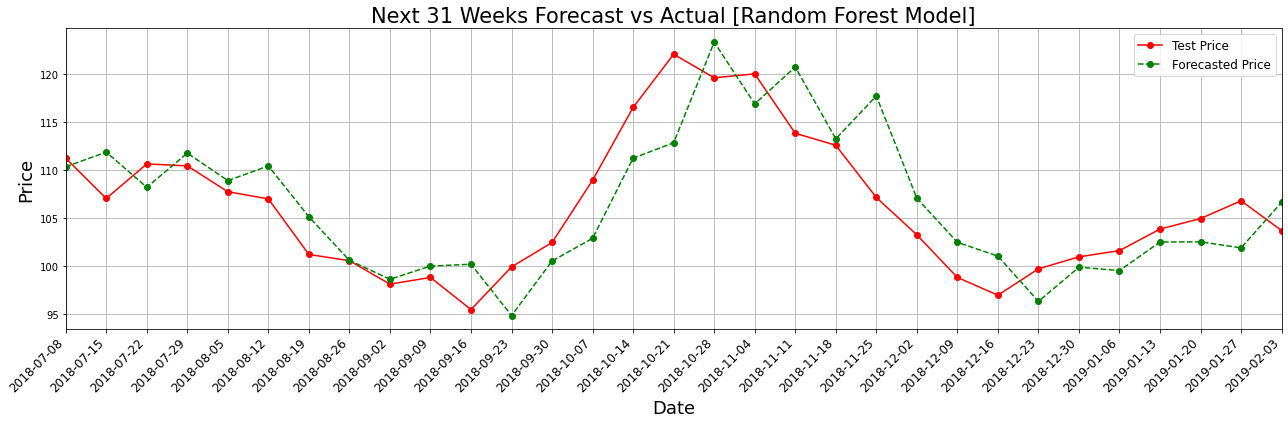

Mean Absolute Error (MAE) for first 31 weeks: 3.448774170414094
Mean Squared Error (MSE) for first 31 weeks: 17.769951173168707
Root Mean Squared Error (RMSE) for first 31 weeks: 4.2154419902506906
Mean Absolute Percentage Error (MAPE) for first 31 weeks: 3.2178333077119383


In [194]:
# Slicing y_test, y_pred_df, and y_train for the next 31 weeks
next_31_weeks_weekly = 31
y_test_next_31_weekly= y_test_weekly.iloc[:next_31_weeks_weekly]
y_pred_next_31_weekly = y_pred_df_weekly.iloc[:next_31_weeks_weekly]
y_train_next_31_weekly = y_train_weekly.iloc[:next_31_weeks_weekly]

#### Plotting predicted and test data for next 31 weeks
# Plotting actual test data for the next 31 weeks
ax = y_test_next_31_weekly.plot(figsize=(18, 6), label="Test Price", color="red", linestyle="-", marker="o")

# Plotting forecasted data for the next 31 weeks
y_pred_next_31_weekly.plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")

plt.xticks(rotation=45, fontsize=12) # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 31 Weeks Forecast vs Actual [Random Forest Model]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)

# Adjusting the x-ticks to show all dates
ax.set_xticks(y_test_next_31_weekly.index)
ax.set_xticklabels(y_test_next_31_weekly.index.strftime("%Y-%m-%d"), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("rf31W.png")
plt.show()

print(f"Mean Absolute Error (MAE) for first 31 weeks: {mae_rf_first_31_weeks}")
print(f"Mean Squared Error (MSE) for first 31 weeks: {mse_rf_first_31_weeks}")
print(f"Root Mean Squared Error (RMSE) for first 31 weeks: {rmse_rf_first_31_weeks}")
print(f"Mean Absolute Percentage Error (MAPE) for first 31 weeks: {mape_rf_first_31_weeks:}")

### Monthly Data:

In [195]:
# Getting the monthly data necessary for the model inplementation later
adj_monthly_prices_df = data_adjust(adj_monthly_prices, monthly_dates, "M")
adj_monthly_prices_df 

Adj Close
Date               
2000-01  111.099998
2000-02   99.900002
2000-03  103.699997
2000-04   95.300003
2000-05   93.000000
...             ...
2022-10  177.699997
2022-11  167.699997
2022-12  167.300003
2023-01  181.750000
2023-02  177.899994

[278 rows x 1 columns]

In [196]:
# Monthly lagged features prices
adj_monthly_prices_df = lag_func(adj_monthly_prices_df)
adj_monthly_prices_df

Adj Close  price_lag1  price_lag2  price_lag3
Date                                                   
2000-04   95.300003  103.699997   99.900002  111.099998
2000-05   93.000000   95.300003  103.699997   99.900002
2000-06   84.849998   93.000000   95.300003  103.699997
2000-07   86.449997   84.849998   93.000000   95.300003
2000-08   74.500000   86.449997   84.849998   93.000000
...             ...         ...         ...         ...
2022-10  177.699997  221.550003  239.100006  217.199997
2022-11  167.699997  177.699997  221.550003  239.100006
2022-12  167.300003  167.699997  177.699997  221.550003
2023-01  181.750000  167.300003  167.699997  177.699997
2023-02  177.899994  181.750000  167.300003  167.699997

[275 rows x 4 columns]

In [197]:
# Creating training and teting data sequentially - splitting data into train and test (MONTHLY DATA)
train_rf3 = adj_monthly_prices_df.iloc[:-int(len(adj_monthly_prices_df) * 0.2)]
test_rf3 = adj_monthly_prices_df.iloc[-int(len(adj_monthly_prices_df) * 0.2):] # Ensuring testing data is always after the train data

# Defining the features (X) and the target (y) for training and testing data
X_train_monthly = train_rf3.drop("Adj Close", axis=1)
y_train_monthly = train_rf3["Adj Close"]
X_test_monthly = test_rf3.drop("Adj Close", axis=1)
y_test_monthly = test_rf3["Adj Close"]

#### Random Forest - 7 months prediction

In [198]:
## Implementing the model
# Initializing the Random Forest Regressor
rf_model_monthly = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the training data
rf_model_monthly.fit(X_train_monthly, y_train_monthly)

# Making predictions on the test data
y_pred_monthly = rf_model_monthly.predict(X_test_monthly)


## Errors for the first 7 months
# Selecting the first 7 months
y_test_first_7_months = y_test_monthly.iloc[:7]
y_pred_first_7_months = y_pred_monthly[:7]

# Calculating Mean Absolute Error (MAE)
mae_rf_first_7_months = mean_absolute_error(y_test_first_7_months, y_pred_first_7_months)

# Calculating Mean Squared Error (MSE)
mse_rf_first_7_months = mean_squared_error(y_test_first_7_months, y_pred_first_7_months)

# Calculating Root Mean Squared Error (RMSE)
rmse_rf_first_7_months = np.sqrt(mse_rf_first_7_months)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_7_months = y_test_first_7_months != 0
mape_rf_first_7_months = np.mean(np.abs((y_test_first_7_months[non_zero_actuals_first_7_months] - 
                                       y_pred_first_7_months[non_zero_actuals_first_7_months]) /
                                      y_test_first_7_months[non_zero_actuals_first_7_months])) * 100

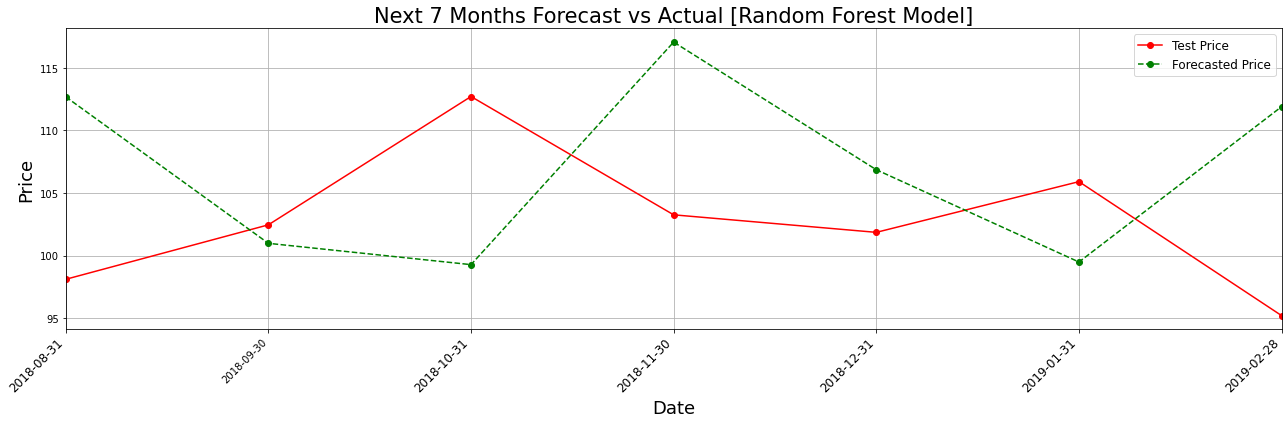

Mean Absolute Error (MAE) for first 7 months: 10.198357140677315
Mean Squared Error (MSE) for first 7 months: 132.86926638690923
Root Mean Squared Error (RMSE) for first 7 months: 11.526893180163908
Mean Absolute Percentage Error (MAPE) for first 7 months: 10.011546671097545


In [199]:
## Plotting the values 
# Converting y_pred to a DataFrame with the same index as y_test
y_pred_df_monthly = pd.DataFrame(y_pred_monthly, index=y_test_monthly.index, columns=["Forecasted Price"])

# # Plotting the entire test data and forecast
# plt.figure(figsize=(20, 7))
# ax = y_test_monthly.plot(figsize=(18, 6), label="Test Price", color="red", linestyle="-", marker="o")
# y_pred_df_monthly.plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")
# plt.xticks(rotation=45,fontsize=12) # Rotating x-tick labels for better readability
# plt.xlabel("Date", fontsize=18)
# plt.ylabel("Price", fontsize=18)
# plt.title("Forecast vs Actual [Monthly Data - Random Forest Model]", fontsize=21)
# plt.legend(fontsize=12)
# plt.grid(True)
# plt.show()

# Slicing y_test, y_pred_df, and y_train for the next 7 months
next_7_months_monthly = 7
y_test_next_7_monthly = y_test_monthly.iloc[:next_7_months_monthly]
y_pred_next_7_monthly = y_pred_df_monthly.iloc[:next_7_months_monthly]

# Plotting predicted and test data for next 7 months
plt.figure(figsize=(20, 7))
ax = y_test_next_7_monthly.plot(figsize=(18, 6), label="Test Price", color="red", linestyle="-", marker="o")
y_pred_next_7_monthly.plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")
plt.xticks(rotation=45, fontsize=12) # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 7 Months Forecast vs Actual [Random Forest Model]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)

# Adjusting the x-ticks to show all dates
ax.set_xticks(y_test_next_7_monthly.index)
ax.set_xticklabels(y_test_next_7_monthly.index.strftime("%Y-%m-%d"), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("rf7M.png")
plt.show()

print(f"Mean Absolute Error (MAE) for first 7 months: {mae_rf_first_7_months}")
print(f"Mean Squared Error (MSE) for first 7 months: {mse_rf_first_7_months}")
print(f"Root Mean Squared Error (RMSE) for first 7 months: {rmse_rf_first_7_months}")
print(f"Mean Absolute Percentage Error (MAPE) for first 7 months: {mape_rf_first_7_months:}")

#### Random Forest - 31 months prediction

In [200]:
## Errors for the first 31 months

# Selecting the first 31 months
y_test_first_31_months = y_test_monthly.iloc[:31]
y_pred_first_31_months = y_pred_monthly[:31]

# Calculating Mean Absolute Error (MAE)
mae_rf_first_31_months = mean_absolute_error(y_test_first_31_months, y_pred_first_31_months)

# Calculating Mean Squared Error (MSE)
mse_rf_first_31_months = mean_squared_error(y_test_first_31_months, y_pred_first_31_months)

# Calculating Root Mean Squared Error (RMSE)
rmse_rf_first_31_months = np.sqrt(mse_rf_first_31_months)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_31_months = y_test_first_31_months != 0
mape_rf_first_31_months = np.mean(np.abs((y_test_first_31_months[non_zero_actuals_first_31_months] - 
                                       y_pred_first_31_months[non_zero_actuals_first_31_months]) /
                                      y_test_first_31_months[non_zero_actuals_first_31_months])) * 100

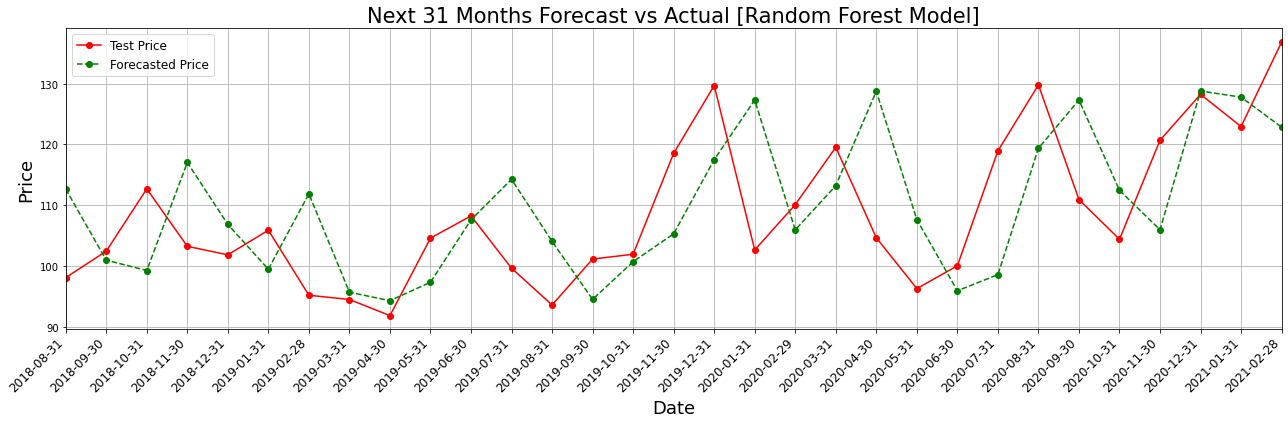

Mean Absolute Error (MAE) for first 31 months: 9.85048406293315
Mean Squared Error (MSE) for first 31 months: 140.93914790305013
Root Mean Squared Error (RMSE) for first 31 months: 11.871779475000794
Mean Absolute Percentage Error (MAPE) for first 31 months: 9.10236447677099


In [201]:
# Slicing y_test, y_pred_df, and y_train for the next 31 weeks
next_31_months_monthly = 31
y_test_next_31_monthly = y_test_monthly.iloc[:next_31_months_monthly]
y_pred_next_31_monthly = y_pred_df_monthly.iloc[:next_31_months_monthly]
y_train_next_31_monthly = y_train_monthly.iloc[:next_31_months_monthly]

#### Plotting predicted and test data for next 31 months
# Plotting actual test data for the next 31 months
ax = y_test_next_31_monthly.plot(figsize=(18, 6), label="Test Price", color="red", linestyle="-", marker="o")

# Plotting forecasted data for the next 31 months
y_pred_next_31_monthly.plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")

plt.xticks(rotation=45, fontsize=12) # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 31 Months Forecast vs Actual [Random Forest Model]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)

# Adjusting the x-ticks to show all dates
ax.set_xticks(y_test_next_31_monthly.index)
ax.set_xticklabels(y_test_next_31_monthly.index.strftime("%Y-%m-%d"), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("rf31M.png")
plt.show()

print(f"Mean Absolute Error (MAE) for first 31 months: {mae_rf_first_31_months}")
print(f"Mean Squared Error (MSE) for first 31 months: {mse_rf_first_31_months}")
print(f"Root Mean Squared Error (RMSE) for first 31 months: {rmse_rf_first_31_months}")
print(f"Mean Absolute Percentage Error (MAPE) for first 31 months: {mape_rf_first_31_months:}")

#### Metrics Table

In [202]:
# Creating a table for the frequency 7
table_frequency_7_rf = {
    "Model": ["Random Forest 7 Days", "Random Forest 7 Weeks", "Random Forest 7 Months"],
    "MAE": [mae_rf_first_7_days, mae_rf_first_7_weeks, mae_rf_first_7_months],
    "MSE": [mse_rf_first_7_days, mse_rf_first_7_weeks, mse_rf_first_7_months],
    "RMSE": [rmse_rf_first_7_days, rmse_rf_first_7_weeks, rmse_rf_first_7_months],
    "MAPE": [mape_rf_first_7_days, mape_rf_first_7_weeks, mape_rf_first_7_months]
}

# Creating the DataFrame
table_frequency_7_rf_df = pd.DataFrame(table_frequency_7_rf)

# Displaying the DataFrame
table_frequency_7_rf_df

Model        MAE         MSE       RMSE       MAPE
0    Random Forest 7 Days   2.641071    9.643632   3.105420   2.419665
1   Random Forest 7 Weeks   2.574572    8.640866   2.939535   2.413994
2  Random Forest 7 Months  10.198357  132.869266  11.526893  10.011547

In [203]:
# Creating a table for the frequency 31
table_frequency_31_rf = {
    "Model": ["Random Forest 31 Days", "Random Forest 31 Weeks", "Random Forest 31 Months"],
    "MAE": [mae_rf_first_31_days, mae_rf_first_31_weeks, mae_rf_first_31_months],
    "MSE": [mse_rf_first_31_days, mse_rf_first_31_weeks, mse_rf_first_31_months],
    "RMSE": [rmse_rf_first_31_days, rmse_rf_first_31_weeks, rmse_rf_first_31_months],
    "MAPE": [mape_rf_first_31_days, mape_rf_first_31_weeks, mape_rf_first_31_months]
}

# Creating the DataFrame
table_frequency_31_rf_df = pd.DataFrame(table_frequency_31_rf)

# Displaying the DataFrame
table_frequency_31_rf_df

Model       MAE         MSE       RMSE      MAPE
0    Random Forest 31 Days  1.575000    3.931477   1.982795  1.448546
1   Random Forest 31 Weeks  3.448774   17.769951   4.215442  3.217833
2  Random Forest 31 Months  9.850484  140.939148  11.871779  9.102364

In [204]:
# Time end Random Forest Model
time.sleep(1)  # Placeholder
model3_end = time.time()
model3_execution_time = model3_end - model3_start
print("Random Forest Model execution time: {} seconds".format(model3_execution_time))

Random Forest Model execution time: 9.461334466934204 seconds


----

## Method 4: Support Vector Regression (SVR)

## Daily Data:

In [205]:
# Data frame to be used
adj_daily_prices_only_close_df = pd.DataFrame(adj_daily_prices_df["Adj Close"])
adj_daily_prices_only_close_df

Adj Close
Date                  
2000-01-06  116.849998
2000-01-07  114.150002
2000-01-10  117.550003
2000-01-11  117.800003
2000-01-12  118.949997
...                ...
2023-01-27  169.899994
2023-01-30  170.399994
2023-01-31  181.750000
2023-02-01  175.899994
2023-02-02  177.899994

[5782 rows x 1 columns]

In [206]:
# Creating lagged features for the daily data
adj_daily_prices_with_lags_df = lag_func(adj_daily_prices_only_close_df)
adj_daily_prices_with_lags_df

Adj Close  price_lag1  price_lag2  price_lag3
Date                                                      
2000-01-11  117.800003  117.550003  114.150002  116.849998
2000-01-12  118.949997  117.800003  117.550003  114.150002
2000-01-13  118.550003  118.949997  117.800003  117.550003
2000-01-14  112.550003  118.550003  118.949997  117.800003
2000-01-18  115.750000  112.550003  118.550003  118.949997
...                ...         ...         ...         ...
2023-01-27  169.899994  167.149994  162.449997  159.850006
2023-01-30  170.399994  169.899994  167.149994  162.449997
2023-01-31  181.750000  170.399994  169.899994  167.149994
2023-02-01  175.899994  181.750000  170.399994  169.899994
2023-02-02  177.899994  175.899994  181.750000  170.399994

[5779 rows x 4 columns]

In [207]:
# Creating training and teting data sequentially - splitting data into train and test
train_svr1 = adj_daily_prices_with_lags_df.iloc[:-int(len(adj_daily_prices_with_lags_df) * 0.2)]
test_svr1 = adj_daily_prices_with_lags_df.iloc[-int(len(adj_daily_prices_with_lags_df) * 0.2):] # Ensuring testing data is always after the train data

# Defining X (the "features") and y (the "target") for training and testing data
X_train_daily_svr = train_svr1.drop("Adj Close", axis=1)
y_train_daily_svr = train_svr1["Adj Close"]
X_test_daily_svr = test_svr1.drop("Adj Close", axis=1)
y_test_daily_svr = test_svr1["Adj Close"]

#### The implementation of SVR comes from learning things here there from the following sources:
- https://www.youtube.com/watch?v=iAwnhrrLrVk
- https://www.youtube.com/watch?v=X38yCdQ_cWw
- https://www.youtube.com/watch?v=ZMEy9kqG1Ec

Here, I try to understand how to implement SVR effectively thanks to them, so I am giving credit to their tutorials.

#### SVR - 7 days prediction

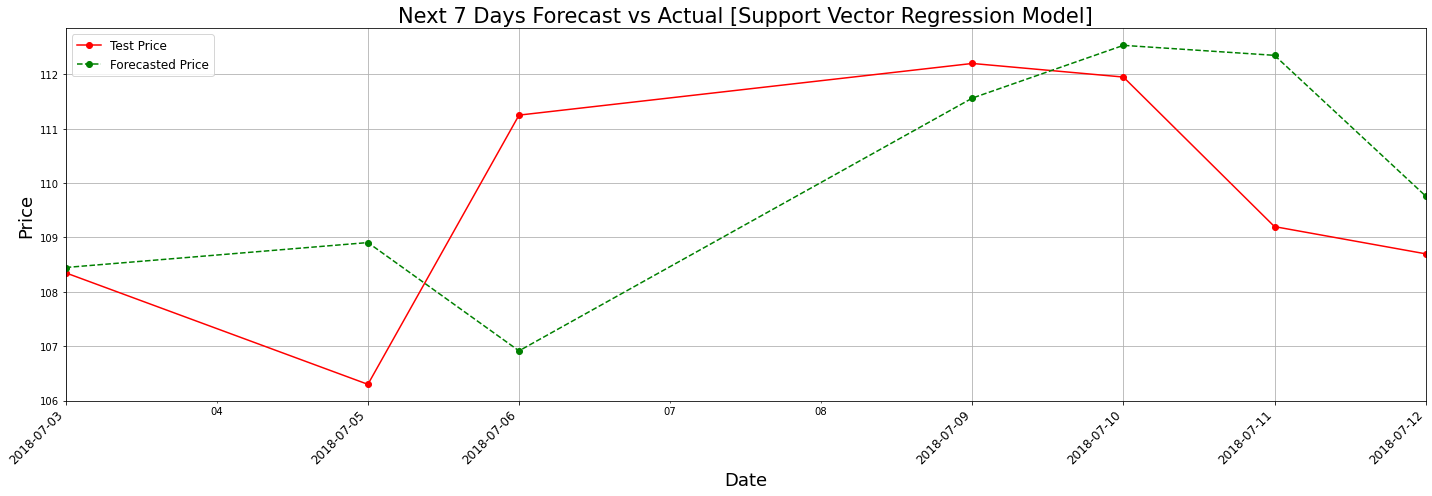

Mean Absolute Error (MAE) for the first 7 days: 1.781719518316107
Mean Squared Error (MSE) for the first 7 days: 5.340842294096928
Root Mean Squared Error (RMSE) for the first 7 days: 2.3110262426240267
Mean Absolute Percentage Error (MAPE) for the first 7 days: 1.6271054887942555


In [208]:
# Timing model 4
model4_start = time.time()

## Standardisation of data
# Standardizing the data to improve the performance of SVR
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()


## Transforming the data
# Fitting the scaler on training data and transforming both training and testing data
X_train_daily_svr_scaled = scaler_X.fit_transform(X_train_daily_svr)
X_test_daily_svr_scaled = scaler_X.transform(X_test_daily_svr)

y_train_daily_svr_scaled = scaler_y.fit_transform(y_train_daily_svr.values.reshape(-1, 1)).flatten()
y_test_daily_svr_scaled = scaler_y.transform(y_test_daily_svr.values.reshape(-1, 1)).flatten()


## Fitting the model
# Initializing the SVR model
from sklearn.svm import SVR
svr_model_daily = SVR(kernel="rbf", C=10, gamma=0.1)

# Training the model on the scaled training data
svr_model_daily.fit(X_train_daily_svr_scaled, y_train_daily_svr_scaled)

## Making predictions
# Making predictions on the scaled test data
y_pred_daily_scaled = svr_model_daily.predict(X_test_daily_svr_scaled)

# Inverse transforming the scaled predictions to get actual values
y_pred_daily = scaler_y.inverse_transform(y_pred_daily_scaled.reshape(-1, 1)).flatten()

# Slicing y_test and y_pred for the next 7 days
next_7_days_daily_svr = 7
y_test_next_7_daily_svr = y_test_daily_svr.iloc[:next_7_days_daily_svr]
y_pred_next_7_daily_svr = y_pred_daily[:next_7_days_daily_svr]


# Selecting the first 7 days
y_test_first_7_days_svr = y_test_daily_svr.iloc[:7]
y_pred_first_7_days_svr = y_pred_daily[:7]


## Calculating the error terms
# Calculating Mean Absolute Error (MAE)
mae_svr_first_7_days = mean_absolute_error(y_test_first_7_days_svr, y_pred_first_7_days_svr)

# Calculating Mean Squared Error (MSE)
mse_svr_first_7_days = mean_squared_error(y_test_first_7_days_svr, y_pred_first_7_days_svr)

# Calculating Root Mean Squared Error (RMSE)
rmse_svr_first_7_days = np.sqrt(mse_svr_first_7_days)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_7_days_svr = y_test_first_7_days_svr != 0
mape_svr_first_7_days = np.mean(np.abs((y_test_first_7_days_svr[non_zero_actuals_first_7_days_svr] - 
                                        y_pred_first_7_days_svr[non_zero_actuals_first_7_days_svr]) /
                                       y_test_first_7_days_svr[non_zero_actuals_first_7_days_svr])) * 100


## Creating the plots
# Creating a DataFrame for predicted values to align with the dates
y_pred_next_7_daily_svr_df = pd.Series(y_pred_next_7_daily_svr, index=y_test_next_7_daily_svr.index)

# Plotting predicted and test data for the next 7 days
plt.figure(figsize=(20, 7))
ax = y_test_next_7_daily_svr.plot(label="Test Price", color="red", linestyle="-", marker="o")
y_pred_next_7_daily_svr_df.plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")
plt.xticks(rotation=45, fontsize=12)  # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 7 Days Forecast vs Actual [Support Vector Regression Model]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)

# Adjusting the x-ticks to show all dates
ax.set_xticks(y_test_next_7_daily_svr.index)
ax.set_xticklabels(y_test_next_7_daily_svr.index.strftime("%Y-%m-%d"), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("svr7D.png")
plt.show()


## Looking at the error terms
# Printing the errors
print(f"Mean Absolute Error (MAE) for the first 7 days: {mae_svr_first_7_days}")
print(f"Mean Squared Error (MSE) for the first 7 days: {mse_svr_first_7_days}")
print(f"Root Mean Squared Error (RMSE) for the first 7 days: {rmse_svr_first_7_days}")
print(f"Mean Absolute Percentage Error (MAPE) for the first 7 days: {mape_svr_first_7_days}")

#### SVR - 31 days prediction

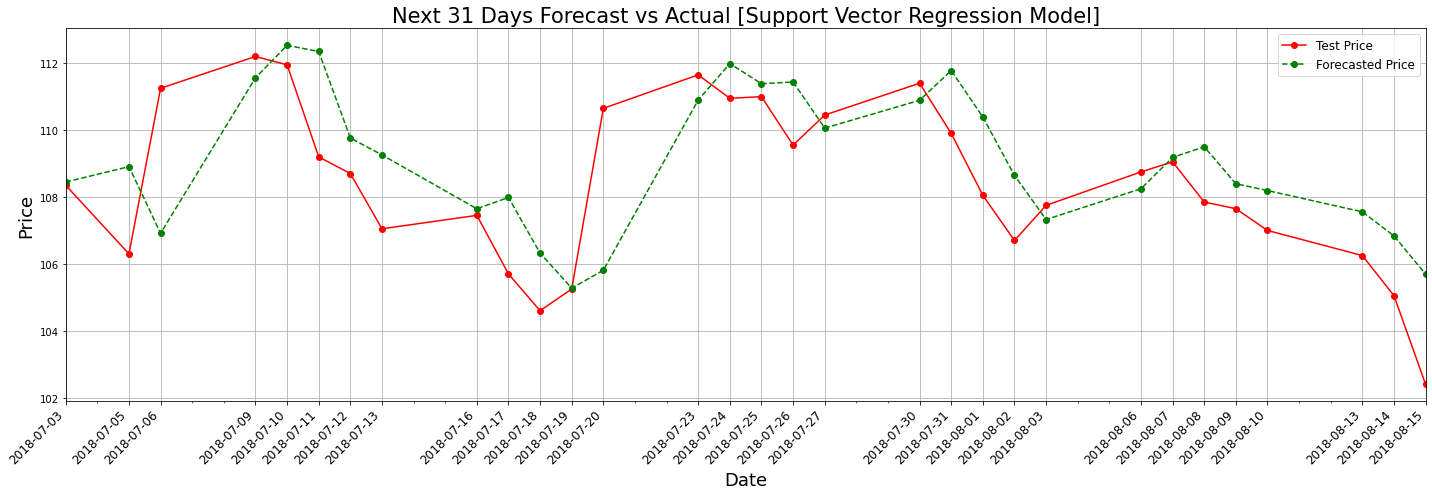

Mean Absolute Error (MAE) for the first 31 days: 1.481035334757948
Mean Squared Error (MSE) for the first 31 days: 3.65686536075343
Root Mean Squared Error (RMSE) for the first 31 days: 1.9122932203910126
Mean Absolute Percentage Error (MAPE) for the first 31 days: 1.3707439037827132


In [209]:
# Slicing y_test and y_pred for the next 31 days
next_31_days_daily_svr = 31
y_test_next_31_daily_svr = y_test_daily_svr.iloc[:next_31_days_daily_svr]
y_pred_next_31_daily_svr = y_pred_daily[:next_31_days_daily_svr]


# Selecting the first 31 days
y_test_first_31_days_svr = y_test_daily_svr.iloc[:31]
y_pred_first_31_days_svr = y_pred_daily[:31]


## Calculating the error terms
# Calculating Mean Absolute Error (MAE)
mae_svr_first_31_days = mean_absolute_error(y_test_first_31_days_svr, y_pred_first_31_days_svr)

# Calculating Mean Squared Error (MSE)
mse_svr_first_31_days = mean_squared_error(y_test_first_31_days_svr, y_pred_first_31_days_svr)

# Calculating Root Mean Squared Error (RMSE)
rmse_svr_first_31_days = np.sqrt(mse_svr_first_31_days)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_31_days_svr = y_test_first_31_days_svr != 0
mape_svr_first_31_days = np.mean(np.abs((y_test_first_31_days_svr[non_zero_actuals_first_31_days_svr] - 
                                        y_pred_first_31_days_svr[non_zero_actuals_first_31_days_svr]) /
                                       y_test_first_31_days_svr[non_zero_actuals_first_31_days_svr])) * 100


## Creating the plots
# Creating a DataFrame for predicted values to align with the dates
y_pred_next_31_daily_svr_df = pd.Series(y_pred_next_31_daily_svr, index=y_test_next_31_daily_svr.index)

# Plotting predicted and test data for the next 31 days
plt.figure(figsize=(20, 7))
ax = y_test_next_31_daily_svr.plot(label="Test Price", color="red", linestyle="-", marker="o")
y_pred_next_31_daily_svr_df.plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")
plt.xticks(rotation=45, fontsize=12)  # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 31 Days Forecast vs Actual [Support Vector Regression Model]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)

# Adjusting the x-ticks to show all dates
ax.set_xticks(y_test_next_31_daily_svr.index)
ax.set_xticklabels(y_test_next_31_daily_svr.index.strftime("%Y-%m-%d"), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("svr31D.png")
plt.show()


## Looking at the error terms
# Printing the errors
print(f"Mean Absolute Error (MAE) for the first 31 days: {mae_svr_first_31_days}")
print(f"Mean Squared Error (MSE) for the first 31 days: {mse_svr_first_31_days}")
print(f"Root Mean Squared Error (RMSE) for the first 31 days: {rmse_svr_first_31_days}")
print(f"Mean Absolute Percentage Error (MAPE) for the first 31 days: {mape_svr_first_31_days}")

## Weekly Data:

In [210]:
# Data frame to be used
adj_weekly_prices_only_close_df = pd.DataFrame(adj_weekly_prices_df["Adj Close"])
adj_weekly_prices_only_close_df

Adj Close
Date                  
2000-01-30  114.699997
2000-02-06  112.900002
2000-02-13  108.800003
2000-02-20  104.300003
2000-02-27   98.800003
...                ...
2023-01-08  158.300003
2023-01-15  151.699997
2023-01-22  154.800003
2023-01-29  169.899994
2023-02-05  177.899994

[1202 rows x 1 columns]

In [211]:
# Creating lagged features for the weekly data
adj_weekly_prices_with_lags_df = lag_func(adj_weekly_prices_only_close_df)
adj_weekly_prices_with_lags_df

Adj Close  price_lag1  price_lag2  price_lag3
Date                                                      
2000-02-20  104.300003  108.800003  112.900002  114.699997
2000-02-27   98.800003  104.300003  108.800003  112.900002
2000-03-05  104.349998   98.800003  104.300003  108.800003
2000-03-12  106.099998  104.349998   98.800003  104.300003
2000-03-19  106.099998  106.099998  104.349998   98.800003
...                ...         ...         ...         ...
2023-01-08  158.300003  167.300003  172.000000  164.149994
2023-01-15  151.699997  158.300003  167.300003  172.000000
2023-01-22  154.800003  151.699997  158.300003  167.300003
2023-01-29  169.899994  154.800003  151.699997  158.300003
2023-02-05  177.899994  169.899994  154.800003  151.699997

[1199 rows x 4 columns]

In [212]:
# Creating training and teting data sequentially - splitting data into train and test
train_svr2 = adj_weekly_prices_with_lags_df.iloc[:-int(len(adj_weekly_prices_with_lags_df) * 0.2)]
test_svr2 = adj_weekly_prices_with_lags_df.iloc[-int(len(adj_weekly_prices_with_lags_df) * 0.2):] # Ensuring testing data is always after the train data

# Defining X (the "features") and y (the "target") for training and testing data
X_train_weekly_svr = train_svr2.drop("Adj Close", axis=1)
y_train_weekly_svr = train_svr2["Adj Close"]
X_test_weekly_svr = test_svr2.drop("Adj Close", axis=1)
y_test_weekly_svr = test_svr2["Adj Close"]

#### SVR - 7 weeks prediction

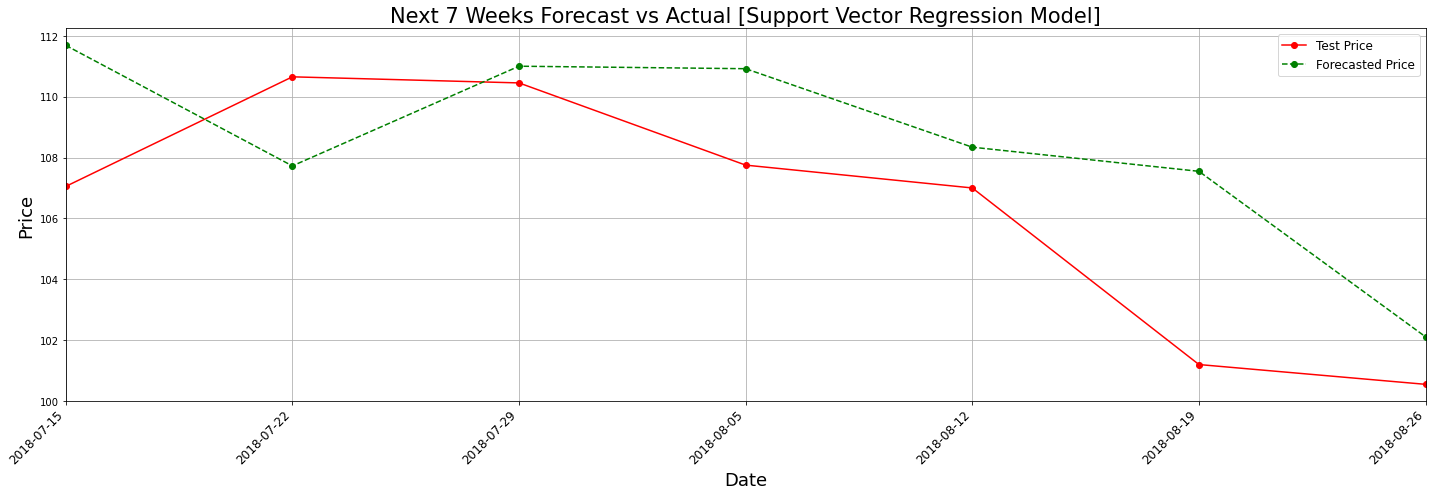

Mean Absolute Error (MAE) for the first 7 weeks: 2.9314458528959437
Mean Squared Error (MSE) for the first 7 weeks: 12.123138447083393
Root Mean Squared Error (RMSE) for the first 7 weeks: 3.481829755614624
Mean Absolute Percentage Error (MAPE) for the first 7 weeks: 2.783182867260472


In [213]:
## Standardisation of data
# Standardizing the data to improve the performance of SVR
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()


## Transforming the data
# Fitting the scaler on training data and transforming both training and testing data
X_train_weekly_svr_scaled = scaler_X.fit_transform(X_train_weekly_svr)
X_test_weekly_svr_scaled = scaler_X.transform(X_test_weekly_svr)

y_train_weekly_svr_scaled = scaler_y.fit_transform(y_train_weekly_svr.values.reshape(-1, 1)).flatten()
y_test_weekly_svr_scaled = scaler_y.transform(y_test_weekly_svr.values.reshape(-1, 1)).flatten()


## Fitting the model
# Initializing the SVR model
svr_model_weekly = SVR(kernel="rbf", C=10, gamma=0.1)

# Training the model on the scaled training data
svr_model_weekly.fit(X_train_weekly_svr_scaled, y_train_weekly_svr_scaled)


## Making predictions
# Making predictions on the scaled test data
y_pred_weekly_scaled = svr_model_weekly.predict(X_test_weekly_svr_scaled)

# Inverse transforming the scaled predictions to get actual values
y_pred_weekly = scaler_y.inverse_transform(y_pred_weekly_scaled.reshape(-1, 1)).flatten()

# Slicing y_test and y_pred for the next 7 weeks
next_7_weeks_weekly_svr = 7
y_test_next_7_weekly_svr = y_test_weekly_svr.iloc[:next_7_weeks_weekly_svr]
y_pred_next_7_weekly_svr = y_pred_weekly[:next_7_weeks_weekly_svr]


# Selecting the first 7 weeks
y_test_first_7_weeks_svr = y_test_weekly_svr.iloc[:7]
y_pred_first_7_weeks_svr = y_pred_weekly[:7]


## Calculating the error terms
# Calculating Mean Absolute Error (MAE)
mae_svr_first_7_weeks = mean_absolute_error(y_test_first_7_weeks_svr, y_pred_first_7_weeks_svr)

# Calculating Mean Squared Error (MSE)
mse_svr_first_7_weeks = mean_squared_error(y_test_first_7_weeks_svr, y_pred_first_7_weeks_svr)

# Calculating Root Mean Squared Error (RMSE)
rmse_svr_first_7_weeks = np.sqrt(mse_svr_first_7_weeks)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_7_weeks_svr = y_test_first_7_weeks_svr != 0
mape_svr_first_7_weeks = np.mean(np.abs((y_test_first_7_weeks_svr[non_zero_actuals_first_7_weeks_svr] - 
                                        y_pred_first_7_weeks_svr[non_zero_actuals_first_7_weeks_svr]) /
                                       y_test_first_7_weeks_svr[non_zero_actuals_first_7_weeks_svr])) * 100


## Creating the plots
# Creating a DataFrame for predicted values to align with the dates
y_pred_next_7_weekly_svr_df = pd.Series(y_pred_next_7_weekly_svr, index=y_test_next_7_weekly_svr.index)

# Plotting predicted and test data for the next 7 weeks
plt.figure(figsize=(20, 7))
ax = y_test_next_7_weekly_svr.plot(label="Test Price", color="red", linestyle="-", marker="o")
y_pred_next_7_weekly_svr_df.plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")
plt.xticks(rotation=45, fontsize=12)  # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 7 Weeks Forecast vs Actual [Support Vector Regression Model]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)

# Adjusting the x-ticks to show all dates
ax.set_xticks(y_test_next_7_weekly_svr.index)
ax.set_xticklabels(y_test_next_7_weekly_svr.index.strftime("%Y-%m-%d"), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("svr7W.png")
plt.show()


## Looking at the error terms
# Printing the errors
print(f"Mean Absolute Error (MAE) for the first 7 weeks: {mae_svr_first_7_weeks}")
print(f"Mean Squared Error (MSE) for the first 7 weeks: {mse_svr_first_7_weeks}")
print(f"Root Mean Squared Error (RMSE) for the first 7 weeks: {rmse_svr_first_7_weeks}")
print(f"Mean Absolute Percentage Error (MAPE) for the first 7 weeks: {mape_svr_first_7_weeks}")

#### SVR - 31 weeks prediction

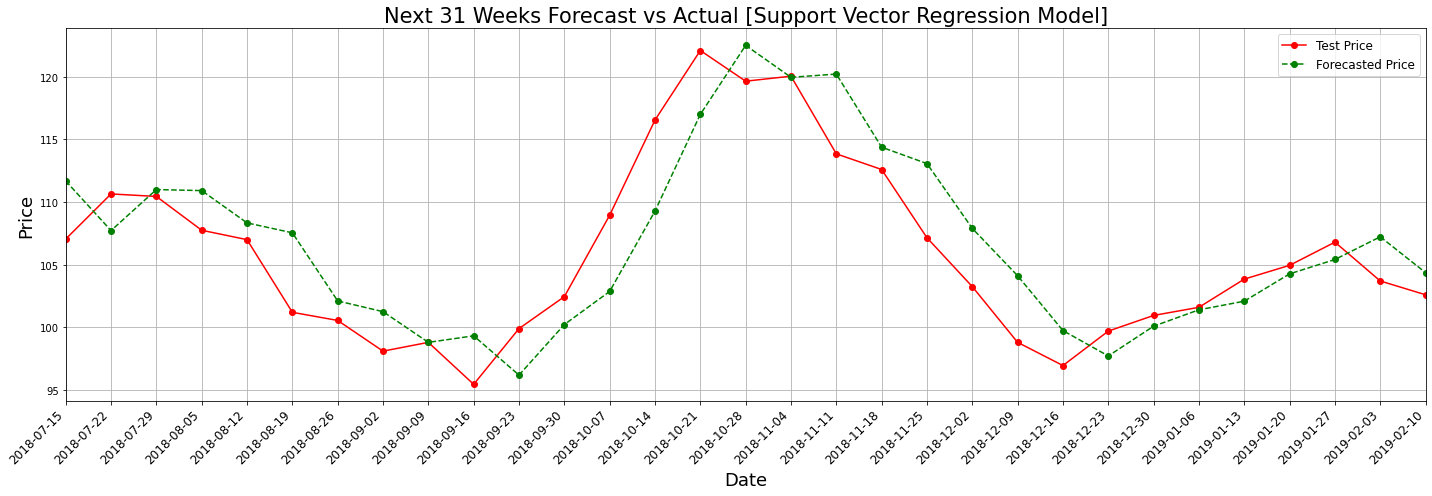

Mean Absolute Error (MAE) for the first 31 weeks: 3.0284434059309597
Mean Squared Error (MSE) for the first 31 weeks: 13.381984889281227
Root Mean Squared Error (RMSE) for the first 31 weeks: 3.6581395393398033
Mean Absolute Percentage Error (MAPE) for the first 31 weeks: 2.850824876616524


In [214]:
## Standardisation of data
# Standardizing the data to improve the performance of SVR
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()


## Transforming the data
# Fitting the scaler on training data and transforming both training and testing data
X_train_weekly_svr_scaled = scaler_X.fit_transform(X_train_weekly_svr)
X_test_weekly_svr_scaled = scaler_X.transform(X_test_weekly_svr)

y_train_weekly_svr_scaled = scaler_y.fit_transform(y_train_weekly_svr.values.reshape(-1, 1)).flatten()
y_test_weekly_svr_scaled = scaler_y.transform(y_test_weekly_svr.values.reshape(-1, 1)).flatten()


## Fitting the model
# Initializing the SVR model
svr_model_weekly = SVR(kernel="rbf", C=10, gamma=0.1)

# Training the model on the scaled training data
svr_model_weekly.fit(X_train_weekly_svr_scaled, y_train_weekly_svr_scaled)


## Making predictions
# Making predictions on the scaled test data
y_pred_weekly_scaled = svr_model_weekly.predict(X_test_weekly_svr_scaled)

# Inverse transforming the scaled predictions to get actual values
y_pred_weekly = scaler_y.inverse_transform(y_pred_weekly_scaled.reshape(-1, 1)).flatten()

# Slicing y_test and y_pred for the next 31 weeks
next_31_weeks_weekly_svr = 31
y_test_next_31_weekly_svr = y_test_weekly_svr.iloc[:next_31_weeks_weekly_svr]
y_pred_next_31_weekly_svr = y_pred_weekly[:next_31_weeks_weekly_svr]


# Selecting the first 31 weeks
y_test_first_31_weeks_svr = y_test_weekly_svr.iloc[:31]
y_pred_first_31_weeks_svr = y_pred_weekly[:31]


## Calculating the error terms
# Calculating Mean Absolute Error (MAE)
mae_svr_first_31_weeks = mean_absolute_error(y_test_first_31_weeks_svr, y_pred_first_31_weeks_svr)

# Calculating Mean Squared Error (MSE)
mse_svr_first_31_weeks = mean_squared_error(y_test_first_31_weeks_svr, y_pred_first_31_weeks_svr)

# Calculating Root Mean Squared Error (RMSE)
rmse_svr_first_31_weeks = np.sqrt(mse_svr_first_31_weeks)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_31_weeks_svr = y_test_first_31_weeks_svr != 0
mape_svr_first_31_weeks = np.mean(np.abs((y_test_first_31_weeks_svr[non_zero_actuals_first_31_weeks_svr] - 
                                        y_pred_first_31_weeks_svr[non_zero_actuals_first_31_weeks_svr]) /
                                       y_test_first_31_weeks_svr[non_zero_actuals_first_31_weeks_svr])) * 100


## Creating the plots
# Creating a DataFrame for predicted values to align with the dates
y_pred_next_31_weekly_svr_df = pd.Series(y_pred_next_31_weekly_svr, index=y_test_next_31_weekly_svr.index)

# Plotting predicted and test data for the next 31 weeks
plt.figure(figsize=(20, 7))
ax = y_test_next_31_weekly_svr.plot(label="Test Price", color="red", linestyle="-", marker="o")
y_pred_next_31_weekly_svr_df.plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")
plt.xticks(rotation=45, fontsize=12)  # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 31 Weeks Forecast vs Actual [Support Vector Regression Model]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)

# Adjusting the x-ticks to show all dates
ax.set_xticks(y_test_next_31_weekly_svr.index)
ax.set_xticklabels(y_test_next_31_weekly_svr.index.strftime("%Y-%m-%d"), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("svr31W.png")
plt.show()


## Looking at the error terms
# Printing the errors
print(f"Mean Absolute Error (MAE) for the first 31 weeks: {mae_svr_first_31_weeks}")
print(f"Mean Squared Error (MSE) for the first 31 weeks: {mse_svr_first_31_weeks}")
print(f"Root Mean Squared Error (RMSE) for the first 31 weeks: {rmse_svr_first_31_weeks}")
print(f"Mean Absolute Percentage Error (MAPE) for the first 31 weeks: {mape_svr_first_31_weeks}")

## Monthly Data:

In [215]:
# Data frame to be used
adj_monthly_prices_only_close_df = pd.DataFrame(adj_monthly_prices_df["Adj Close"])
adj_monthly_prices_only_close_df

Adj Close
Date               
2000-04   95.300003
2000-05   93.000000
2000-06   84.849998
2000-07   86.449997
2000-08   74.500000
...             ...
2022-10  177.699997
2022-11  167.699997
2022-12  167.300003
2023-01  181.750000
2023-02  177.899994

[275 rows x 1 columns]

In [216]:
# Creating lagged features for the monthly data
adj_monthly_prices_with_lags_df = lag_func(adj_monthly_prices_only_close_df)
adj_monthly_prices_with_lags_df

Adj Close  price_lag1  price_lag2  price_lag3
Date                                                   
2000-07   86.449997   84.849998   93.000000   95.300003
2000-08   74.500000   86.449997   84.849998   93.000000
2000-09   83.000000   74.500000   86.449997   84.849998
2000-10   74.400002   83.000000   74.500000   86.449997
2000-11   67.199997   74.400002   83.000000   74.500000
...             ...         ...         ...         ...
2022-10  177.699997  221.550003  239.100006  217.199997
2022-11  167.699997  177.699997  221.550003  239.100006
2022-12  167.300003  167.699997  177.699997  221.550003
2023-01  181.750000  167.300003  167.699997  177.699997
2023-02  177.899994  181.750000  167.300003  167.699997

[272 rows x 4 columns]

In [217]:
# Creating training and teting data sequentially - splitting data into train and test
train_svr3 = adj_monthly_prices_with_lags_df.iloc[:-int(len(adj_monthly_prices_with_lags_df) * 0.2)]
test_svr3 = adj_monthly_prices_with_lags_df.iloc[-int(len(adj_monthly_prices_with_lags_df) * 0.2):] # Ensuring testing data is always after the train data

# Defining X (the "features") and y (the "target") for training and testing data
X_train_monthly_svr = train_svr3.drop("Adj Close", axis=1)
y_train_monthly_svr = train_svr3["Adj Close"]
X_test_monthly_svr = test_svr3.drop("Adj Close", axis=1)
y_test_monthly_svr = test_svr3["Adj Close"]

#### SVR - 7 months prediction

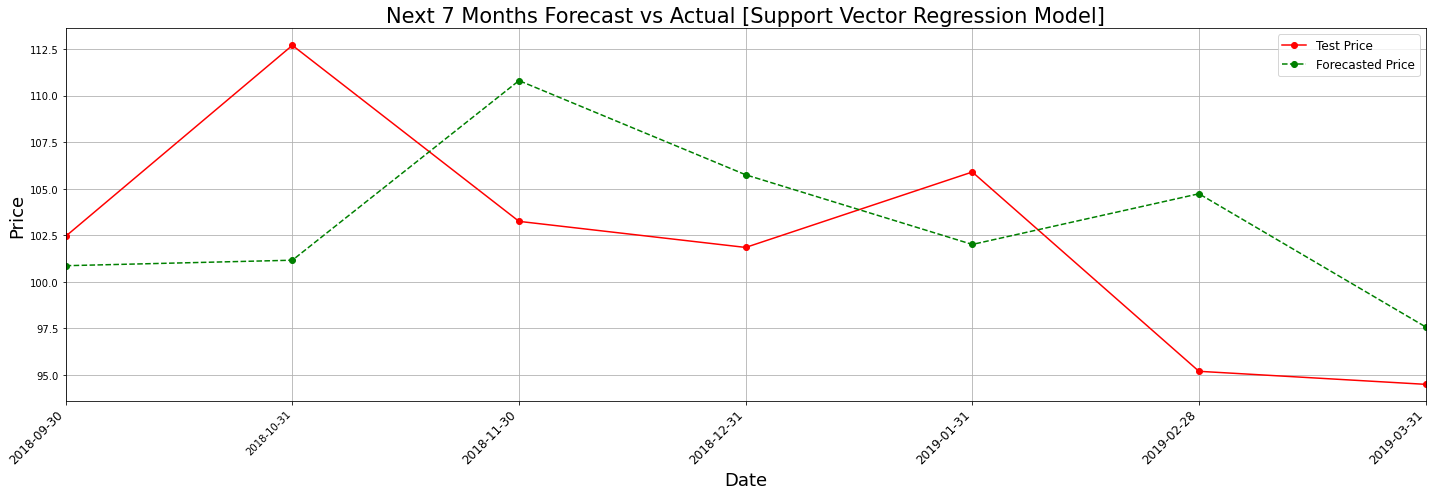

Mean Absolute Error (MAE) for the first 7 months: 5.868679725178213
Mean Squared Error (MSE) for the first 7 months: 46.19960471311736
Root Mean Squared Error (RMSE) for the first 7 months: 6.797029109332795
Mean Absolute Percentage Error (MAPE) for the first 7 months: 5.696825720071278


In [218]:
## Standardisation of data
# Standardizing the data to improve the performance of SVR
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()


## Transforming the data
# Fitting the scaler on training data and transforming both training and testing data
X_train_monthly_svr_scaled = scaler_X.fit_transform(X_train_monthly_svr)
X_test_monthly_svr_scaled = scaler_X.transform(X_test_monthly_svr)

y_train_monthly_svr_scaled = scaler_y.fit_transform(y_train_monthly_svr.values.reshape(-1, 1)).flatten()
y_test_monthly_svr_scaled = scaler_y.transform(y_test_monthly_svr.values.reshape(-1, 1)).flatten()


## Fitting the model
# Initializing the SVR model
svr_model_weekly = SVR(kernel="rbf", C=10, gamma=0.1)

# Training the model on the scaled training data
svr_model_weekly.fit(X_train_monthly_svr_scaled, y_train_monthly_svr_scaled)


## Making predictions
# Making predictions on the scaled test data
y_pred_monthly_scaled = svr_model_weekly.predict(X_test_monthly_svr_scaled)

# Inverse transforming the scaled predictions to get actual values
y_pred_weekly = scaler_y.inverse_transform(y_pred_monthly_scaled.reshape(-1, 1)).flatten()

# Slicing y_test and y_pred for the next 7 months
next_7_months_monthly_svr = 7
y_test_next_7_monthly_svr = y_test_monthly_svr.iloc[:next_7_months_monthly_svr]
y_pred_next_7_monthly_svr = y_pred_weekly[:next_7_months_monthly_svr]


# Selecting the first 7 months
y_test_first_7_months_svr = y_test_monthly_svr.iloc[:7]
y_pred_first_7_months_svr = y_pred_weekly[:7]


## Calculating the error terms
# Calculating Mean Absolute Error (MAE)
mae_svr_first_7_months = mean_absolute_error(y_test_first_7_months_svr, y_pred_first_7_months_svr)

# Calculating Mean Squared Error (MSE)
mse_svr_first_7_months = mean_squared_error(y_test_first_7_months_svr, y_pred_first_7_months_svr)

# Calculating Root Mean Squared Error (RMSE)
rmse_svr_first_7_months = np.sqrt(mse_svr_first_7_months)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_7_months_svr = y_test_first_7_months_svr != 0
mape_svr_first_7_months = np.mean(np.abs((y_test_first_7_months_svr[non_zero_actuals_first_7_months_svr] - 
                                        y_pred_first_7_months_svr[non_zero_actuals_first_7_months_svr]) /
                                       y_test_first_7_months_svr[non_zero_actuals_first_7_months_svr])) * 100


## Creating the plots
# Creating a DataFrame for predicted values to align with the dates
y_pred_next_7_monthly_svr_df = pd.Series(y_pred_next_7_monthly_svr, index=y_test_next_7_monthly_svr.index)

# Plotting predicted and test data for the next 7 months
plt.figure(figsize=(20, 7))
ax = y_test_next_7_monthly_svr.plot(label="Test Price", color="red", linestyle="-", marker="o")
y_pred_next_7_monthly_svr_df.plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")
plt.xticks(rotation=45, fontsize=12)  # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 7 Months Forecast vs Actual [Support Vector Regression Model]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)

# Adjusting the x-ticks to show all dates
ax.set_xticks(y_test_next_7_monthly_svr.index)
ax.set_xticklabels(y_test_next_7_monthly_svr.index.strftime("%Y-%m-%d"), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("svr7M.png")
plt.show()


## Looking at the error terms
# Printing the errors
print(f"Mean Absolute Error (MAE) for the first 7 months: {mae_svr_first_7_months}")
print(f"Mean Squared Error (MSE) for the first 7 months: {mse_svr_first_7_months}")
print(f"Root Mean Squared Error (RMSE) for the first 7 months: {rmse_svr_first_7_months}")
print(f"Mean Absolute Percentage Error (MAPE) for the first 7 months: {mape_svr_first_7_months}")

#### SVR - 31 months prediction

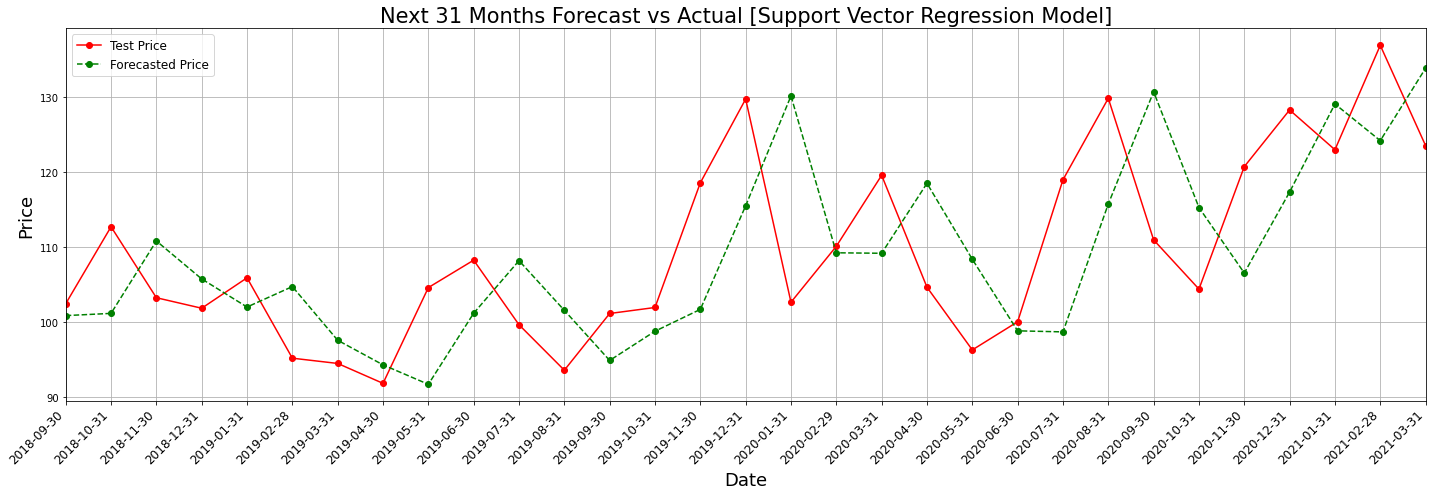

Mean Absolute Error (MAE) for the first 31 months: 9.85101074054218
Mean Squared Error (MSE) for the first 31 months: 134.111509873812
Root Mean Squared Error (RMSE) for the first 31 months: 11.580652394136179
Mean Absolute Percentage Error (MAPE) for the first 31 months: 8.870767991481035


In [219]:
## Standardisation of data
# Standardizing the data to improve the performance of SVR
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()


## Transforming the data
# Fitting the scaler on training data and transforming both training and testing data
X_train_monthly_svr_scaled = scaler_X.fit_transform(X_train_monthly_svr)
X_test_monthly_svr_scaled = scaler_X.transform(X_test_monthly_svr)

y_train_monthly_svr_scaled = scaler_y.fit_transform(y_train_monthly_svr.values.reshape(-1, 1)).flatten()
y_test_monthly_svr_scaled = scaler_y.transform(y_test_monthly_svr.values.reshape(-1, 1)).flatten()


## Fitting the model
# Initializing the SVR model
svr_model_weekly = SVR(kernel="rbf", C=10, gamma=0.1)

# Training the model on the scaled training data
svr_model_weekly.fit(X_train_monthly_svr_scaled, y_train_monthly_svr_scaled)


## Making predictions
# Making predictions on the scaled test data
y_pred_monthly_scaled = svr_model_weekly.predict(X_test_monthly_svr_scaled)

# Inverse transforming the scaled predictions to get actual values
y_pred_weekly = scaler_y.inverse_transform(y_pred_monthly_scaled.reshape(-1, 1)).flatten()

# Slicing y_test and y_pred for the next 31 months
next_31_months_monthly_svr = 31
y_test_next_31_monthly_svr = y_test_monthly_svr.iloc[:next_31_months_monthly_svr]
y_pred_next_31_monthly_svr = y_pred_weekly[:next_31_months_monthly_svr]


# Selecting the first 31 months
y_test_first_31_months_svr = y_test_monthly_svr.iloc[:31]
y_pred_first_31_months_svr = y_pred_weekly[:31]


## Calculating the error terms
# Calculating Mean Absolute Error (MAE)
mae_svr_first_31_months = mean_absolute_error(y_test_first_31_months_svr, y_pred_first_31_months_svr)

# Calculating Mean Squared Error (MSE)
mse_svr_first_31_months = mean_squared_error(y_test_first_31_months_svr, y_pred_first_31_months_svr)

# Calculating Root Mean Squared Error (RMSE)
rmse_svr_first_31_months = np.sqrt(mse_svr_first_31_months)

# Calculating Mean Absolute Percentage Error (MAPE)
non_zero_actuals_first_31_months_svr = y_test_first_31_months_svr != 0
mape_svr_first_31_months = np.mean(np.abs((y_test_first_31_months_svr[non_zero_actuals_first_31_months_svr] - 
                                        y_pred_first_31_months_svr[non_zero_actuals_first_31_months_svr]) /
                                       y_test_first_31_months_svr[non_zero_actuals_first_31_months_svr])) * 100


## Creating the plots
# Creating a DataFrame for predicted values to align with the dates
y_pred_next_31_monthly_svr_df = pd.Series(y_pred_next_31_monthly_svr, index=y_test_next_31_monthly_svr.index)

# Plotting predicted and test data for the next 31 months
plt.figure(figsize=(20, 7))
ax = y_test_next_31_monthly_svr.plot(label="Test Price", color="red", linestyle="-", marker="o")
y_pred_next_31_monthly_svr_df.plot(ax=ax, label="Forecasted Price", linestyle="dashed", color="green", marker="o")
plt.xticks(rotation=45, fontsize=12)  # Rotating x-tick labels for better readability
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Next 31 Months Forecast vs Actual [Support Vector Regression Model]", fontsize=21)
plt.legend(fontsize=12)
plt.grid(True)

# Adjusting the x-ticks to show all dates
ax.set_xticks(y_test_next_31_monthly_svr.index)
ax.set_xticklabels(y_test_next_31_monthly_svr.index.strftime("%Y-%m-%d"), rotation=45, ha="right")

plt.tight_layout()
plt.savefig("svr31M.png")
plt.show()


## Looking at the error terms
# Printing the errors
print(f"Mean Absolute Error (MAE) for the first 31 months: {mae_svr_first_31_months}")
print(f"Mean Squared Error (MSE) for the first 31 months: {mse_svr_first_31_months}")
print(f"Root Mean Squared Error (RMSE) for the first 31 months: {rmse_svr_first_31_months}")
print(f"Mean Absolute Percentage Error (MAPE) for the first 31 months: {mape_svr_first_31_months}")

#### Metrics Table

In [220]:
# Creating a table for the frequency 7
table_frequency_7_svr = {
    "Model": ["SVR 7 Days", "SVR 7 Weeks", "SVR 7 Months"],
    "MAE": [mae_svr_first_7_days, mae_svr_first_7_weeks, mae_svr_first_7_months],
    "MSE": [mse_svr_first_7_days, mse_svr_first_7_weeks, mse_svr_first_7_months],
    "RMSE": [rmse_svr_first_7_days, rmse_svr_first_7_weeks, rmse_svr_first_7_months],
    "MAPE": [mape_svr_first_7_days, mape_svr_first_7_weeks, mape_svr_first_7_months]
}

# Creating the DataFrame
table_frequency_7_svr_df = pd.DataFrame(table_frequency_7_svr)

# Displaying the DataFrame
table_frequency_7_svr_df

Model       MAE        MSE      RMSE      MAPE
0    SVR 7 Days  1.781720   5.340842  2.311026  1.627105
1   SVR 7 Weeks  2.931446  12.123138  3.481830  2.783183
2  SVR 7 Months  5.868680  46.199605  6.797029  5.696826

In [221]:
# Creating a table for the frequency 31
table_frequency_31_svr = {
    "Model": ["SVR 31 Days", "SVR 31 Weeks", "SVR 31 Months"],
    "MAE": [mae_svr_first_31_days, mae_svr_first_31_weeks, mae_svr_first_31_months],
    "MSE": [mse_svr_first_31_days, mse_svr_first_31_weeks, mse_svr_first_31_months],
    "RMSE": [rmse_svr_first_31_days, rmse_svr_first_31_weeks, rmse_svr_first_31_months],
    "MAPE": [mape_svr_first_31_days, mape_svr_first_31_weeks, mape_svr_first_31_months]
}

# Creating the DataFrame
table_frequency_31_svr_df = pd.DataFrame(table_frequency_31_svr)

# Displaying the DataFrame
table_frequency_31_svr_df

Model       MAE         MSE       RMSE      MAPE
0    SVR 31 Days  1.481035    3.656865   1.912293  1.370744
1   SVR 31 Weeks  3.028443   13.381985   3.658140  2.850825
2  SVR 31 Months  9.851011  134.111510  11.580652  8.870768

In [222]:
# Time end SVR Model
time.sleep(4)  # Placeholder
model4_end = time.time()
model4_execution_time = model4_end - model4_start
print("SVR Model execution time: {} seconds".format(model4_execution_time))

SVR Model execution time: 9.497016429901123 seconds


-----

#### Extra Analysis: Combined Metrics Table 

In [223]:
combined_metrics_table_by_model = pd.concat([table_frequency_7_df, table_frequency_31_df,
                                            table_frequency_7_arima_df, table_frequency_31_arima_df,
                                            table_frequency_7_rf_df, table_frequency_31_rf_df,
                                            table_frequency_7_svr_df, table_frequency_31_svr_df], ignore_index=True)
combined_metrics_table_by_model

Model        MAE          MSE       RMSE       MAPE
0       Holt-Winters 7 Days   0.748964     0.803398   0.896325   0.662522
1               Holt 7 Days   0.849977     1.200584   1.095712   0.753265
2      Holt-Winters 7 Weeks   1.807503     4.934468   2.221366   1.646145
3              Holt 7 Weeks   3.627874    15.808922   3.976044   3.342863
4     Holt-Winters 7 Months   6.297992    52.743940   7.262502   6.174305
5             Holt 7 Months   5.068820    39.719596   6.302348   4.860605
6      Holt-Winters 31 Days   4.418157    27.650859   5.258408   4.076878
7              Holt 31 Days   3.402305    17.644189   4.200499   3.149942
8     Holt-Winters 31 Weeks   6.111634    57.745877   7.599071   5.663172
9             Holt 31 Weeks   6.939246    65.274664   8.079274   6.656320
10   Holt-Winters 31 Months  10.736094   204.926211  14.315244   9.325240
11           Holt 31 Months  34.379114  1937.823356  44.020715  29.785229
12            SARIMA 7 days   2.242680     9.155155   3.025749   2.077475
13           SARIMA 7 Weeks   5.588514    37.750049   6.144107   5.147427
14          SARIMA 7 Months   9.565974   103.596852  10.178254   9.465443
15           SARIMA 31 Days   3.518952    17.014896   4.124912   3.271901
16          SARIMA 31 Weeks  10.952580   160.187508  12.656520  10.680908
17         SARIMA 31 Months  34.744929  1615.814808  40.197199  30.786587
18     Random Forest 7 Days   2.641071     9.643632   3.105420   2.419665
19    Random Forest 7 Weeks   2.574572     8.640866   2.939535   2.413994
20   Random Forest 7 Months  10.198357   132.869266  11.526893  10.011547
21    Random Forest 31 Days   1.575000     3.931477   1.982795   1.448546
22   Random Forest 31 Weeks   3.448774    17.769951   4.215442   3.217833
23  Random Forest 31 Months   9.850484   140.939148  11.871779   9.102364
24               SVR 7 Days   1.781720     5.340842   2.311026   1.627105
25              SVR 7 Weeks   2.931446    12.123138   3.481830   2.783183
26             SVR 7 Months   5.868680    46.199605   6.797029   5.696826
27              SVR 31 Days   1.481035     3.656865   1.912293   1.370744
28             SVR 31 Weeks   3.028443    13.381985   3.658140   2.850825
29            SVR 31 Months   9.851011   134.111510  11.580652   8.870768

In [224]:
combined_metrics_table_by_model2 = pd.concat([table_frequency_7_df, table_frequency_7_arima_df,
                                            table_frequency_7_rf_df, table_frequency_7_svr_df,
                                            table_frequency_31_df, table_frequency_31_arima_df,
                                            table_frequency_31_rf_df, table_frequency_31_svr_df], ignore_index=True)
combined_metrics_table_by_model2

Model        MAE          MSE       RMSE       MAPE
0       Holt-Winters 7 Days   0.748964     0.803398   0.896325   0.662522
1               Holt 7 Days   0.849977     1.200584   1.095712   0.753265
2      Holt-Winters 7 Weeks   1.807503     4.934468   2.221366   1.646145
3              Holt 7 Weeks   3.627874    15.808922   3.976044   3.342863
4     Holt-Winters 7 Months   6.297992    52.743940   7.262502   6.174305
5             Holt 7 Months   5.068820    39.719596   6.302348   4.860605
6             SARIMA 7 days   2.242680     9.155155   3.025749   2.077475
7            SARIMA 7 Weeks   5.588514    37.750049   6.144107   5.147427
8           SARIMA 7 Months   9.565974   103.596852  10.178254   9.465443
9      Random Forest 7 Days   2.641071     9.643632   3.105420   2.419665
10    Random Forest 7 Weeks   2.574572     8.640866   2.939535   2.413994
11   Random Forest 7 Months  10.198357   132.869266  11.526893  10.011547
12               SVR 7 Days   1.781720     5.340842   2.311026   1.627105
13              SVR 7 Weeks   2.931446    12.123138   3.481830   2.783183
14             SVR 7 Months   5.868680    46.199605   6.797029   5.696826
15     Holt-Winters 31 Days   4.418157    27.650859   5.258408   4.076878
16             Holt 31 Days   3.402305    17.644189   4.200499   3.149942
17    Holt-Winters 31 Weeks   6.111634    57.745877   7.599071   5.663172
18            Holt 31 Weeks   6.939246    65.274664   8.079274   6.656320
19   Holt-Winters 31 Months  10.736094   204.926211  14.315244   9.325240
20           Holt 31 Months  34.379114  1937.823356  44.020715  29.785229
21           SARIMA 31 Days   3.518952    17.014896   4.124912   3.271901
22          SARIMA 31 Weeks  10.952580   160.187508  12.656520  10.680908
23         SARIMA 31 Months  34.744929  1615.814808  40.197199  30.786587
24    Random Forest 31 Days   1.575000     3.931477   1.982795   1.448546
25   Random Forest 31 Weeks   3.448774    17.769951   4.215442   3.217833
26  Random Forest 31 Months   9.850484   140.939148  11.871779   9.102364
27              SVR 31 Days   1.481035     3.656865   1.912293   1.370744
28             SVR 31 Weeks   3.028443    13.381985   3.658140   2.850825
29            SVR 31 Months   9.851011   134.111510  11.580652   8.870768

In [225]:
# minimum MAE
min_mae = combined_metrics_table_by_model["MAE"].min()
min_mae_model = combined_metrics_table_by_model.loc[combined_metrics_table_by_model["MAE"]==min_mae, "Model"].values[0]
print(f"{min_mae_model}: {min_mae}")

Holt-Winters 7 Days: 0.7489638743136291


In [226]:
# minimum MSE
min_mse = combined_metrics_table_by_model["MSE"].min()
min_mse_model = combined_metrics_table_by_model.loc[combined_metrics_table_by_model["MSE"]==min_mse, "Model"].values[0]
print(f"{min_mse_model}: {min_mse}")

Holt-Winters 7 Days: 0.8033976563174055


In [227]:
# minimum RMSE
min_rmse = combined_metrics_table_by_model["RMSE"].min()
min_rmse_model = combined_metrics_table_by_model.loc[combined_metrics_table_by_model["RMSE"]==min_rmse, "Model"].values[0]
print(f"{min_rmse_model}: {min_rmse}")

Holt-Winters 7 Days: 0.8963245262277527


In [228]:
# minimum MAPE
min_mape = combined_metrics_table_by_model["MAPE"].min()
min_mape_model = combined_metrics_table_by_model.loc[combined_metrics_table_by_model["MAPE"]==min_mape, "Model"].values[0]
print(f"{min_mape_model}: {min_mape}")

Holt-Winters 7 Days: 0.6625216588939384


In [229]:
# Maximum MAE
max_mae = combined_metrics_table_by_model["MAE"].max()
max_mae_model = combined_metrics_table_by_model.loc[combined_metrics_table_by_model["MAE"]==max_mae, "Model"].values[0]
print(f"{max_mae_model}: {max_mae}")

SARIMA 31 Months: 34.744928688344764


In [230]:
# Maximum MSE
max_mse = combined_metrics_table_by_model["MSE"].max()
max_mse_model = combined_metrics_table_by_model.loc[combined_metrics_table_by_model["MSE"]==max_mse, "Model"].values[0]
print(f"{max_mse_model}: {max_mse}")

Holt 31 Months: 1937.8233559109428


In [231]:
# Maximum RMSE
max_rmse = combined_metrics_table_by_model["RMSE"].max()
max_rmse_model = combined_metrics_table_by_model.loc[combined_metrics_table_by_model["RMSE"]==max_rmse, "Model"].values[0]
print(f"{max_rmse_model}: {max_rmse}")

Holt 31 Months: 44.02071507723316


In [232]:
# Maximum MAPE
max_mape = combined_metrics_table_by_model["MAPE"].max()
max_mape_model = combined_metrics_table_by_model.loc[combined_metrics_table_by_model["MAPE"]==max_mape, "Model"].values[0]
print(f"{max_mape_model}: {max_mape}")

SARIMA 31 Months: 30.78658689834463


In [233]:
# Grouping only "7" frequency
combined_metrics_table_by_model3 = pd.concat([table_frequency_7_df, table_frequency_7_arima_df,
                                            table_frequency_7_rf_df, table_frequency_7_svr_df], ignore_index=True)
combined_metrics_table_by_model3

Model        MAE         MSE       RMSE       MAPE
0      Holt-Winters 7 Days   0.748964    0.803398   0.896325   0.662522
1              Holt 7 Days   0.849977    1.200584   1.095712   0.753265
2     Holt-Winters 7 Weeks   1.807503    4.934468   2.221366   1.646145
3             Holt 7 Weeks   3.627874   15.808922   3.976044   3.342863
4    Holt-Winters 7 Months   6.297992   52.743940   7.262502   6.174305
5            Holt 7 Months   5.068820   39.719596   6.302348   4.860605
6            SARIMA 7 days   2.242680    9.155155   3.025749   2.077475
7           SARIMA 7 Weeks   5.588514   37.750049   6.144107   5.147427
8          SARIMA 7 Months   9.565974  103.596852  10.178254   9.465443
9     Random Forest 7 Days   2.641071    9.643632   3.105420   2.419665
10   Random Forest 7 Weeks   2.574572    8.640866   2.939535   2.413994
11  Random Forest 7 Months  10.198357  132.869266  11.526893  10.011547
12              SVR 7 Days   1.781720    5.340842   2.311026   1.627105
13             SVR 7 Weeks   2.931446   12.123138   3.481830   2.783183
14            SVR 7 Months   5.868680   46.199605   6.797029   5.696826

In [234]:
# Grouping only "31" frequency
combined_metrics_table_by_model4 = pd.concat([table_frequency_31_df, table_frequency_31_arima_df,
                                              table_frequency_31_rf_df, table_frequency_31_svr_df], ignore_index=True)
combined_metrics_table_by_model4

Model        MAE          MSE       RMSE       MAPE
0      Holt-Winters 31 Days   4.418157    27.650859   5.258408   4.076878
1              Holt 31 Days   3.402305    17.644189   4.200499   3.149942
2     Holt-Winters 31 Weeks   6.111634    57.745877   7.599071   5.663172
3             Holt 31 Weeks   6.939246    65.274664   8.079274   6.656320
4    Holt-Winters 31 Months  10.736094   204.926211  14.315244   9.325240
5            Holt 31 Months  34.379114  1937.823356  44.020715  29.785229
6            SARIMA 31 Days   3.518952    17.014896   4.124912   3.271901
7           SARIMA 31 Weeks  10.952580   160.187508  12.656520  10.680908
8          SARIMA 31 Months  34.744929  1615.814808  40.197199  30.786587
9     Random Forest 31 Days   1.575000     3.931477   1.982795   1.448546
10   Random Forest 31 Weeks   3.448774    17.769951   4.215442   3.217833
11  Random Forest 31 Months   9.850484   140.939148  11.871779   9.102364
12              SVR 31 Days   1.481035     3.656865   1.912293   1.370744
13             SVR 31 Weeks   3.028443    13.381985   3.658140   2.850825
14            SVR 31 Months   9.851011   134.111510  11.580652   8.870768

#### The rest of the analysis is done "manually" and by creating tables on LaTeX.

#### Execution Time:

In [235]:
project_end = time.time()
project_execution_time = project_end - project_start
print("Total project execution time: {} seconds".format(project_execution_time))

Total project execution time: 1309.062575340271 seconds


------